# **Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Group 55** <br>
Sadi Gülbey <br>
Eren Girişken <br>

# **Introduction and Destination**
We have been assigned with the Spotify Data from Kaggle. Our aim is to explore, hypothesize and creating machine learning model. However, we will start with data exploration. <br>
In Data Exploration part, we will try to achieve these parts: <br>
1. Univariate Analysis
2. Bivariate Analysis
3. Overall Anaylsis
4. Detecting outliers and missing values
5. Variable Transformations (Feature Engineering)
6. Analysing Transformed Values
However, detecting outliers and missing values will be zipped into sentences, we will not create new part for that, since Spotify data is clear.


In [ ]:
from google.colab import drive
from os.path import join 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive"
datafile = "/data.csv"
genresFile = "data_by_genres.csv"

data_file = pd.read_csv(join(path_prefix+datafile))
data_by_genres = pd.read_csv(join(path_prefix, genresFile))
yearFrame = pd.read_csv(join(path_prefix,"data_by_year.csv"))
artistFrame = pd.read_csv(join(path_prefix, "data_w_genres.csv"))
data_with_genres = artistFrame.copy()
genreYear = (data_file.copy()).reset_index().drop(columns = "id")

Mounted at ./drive


In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("seaborn-paper")

# **Overlook to Data**


### **Data's Columns** <br>
Main data file has 19 columns and 174398 rows. They have been shown under this text. However, through our data analysis, we will try to not use key, id, mode, release_date of the songs. <br>
Acousticness, danceability, duration, energy, instrumentalness, liveness, popularity, loudness, speechiness, tempo, valence are numerical values. However, we will try to contextualize them through their "differences" and "ratios", since they do not mean anything to us when they are just numbers. <br>
Explicitness is categorical value, 1 means the song is explicit and 0 means it is not. <br>
In addition to these columns, we will use genres from other files to categorize songs with genres.

In [ ]:
data_file.head(5)

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

In [ ]:
data_file.shape

(174389, 19)

It can be seen that there is no missing values.

In [ ]:
data_file.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

# **Univariate Analysis** <br>
### **Year Counts**

The data we will use contains the most songs for 2020. 
The number of songs is decreasing towards the old years. After the 1950s, many more songs started to be made.


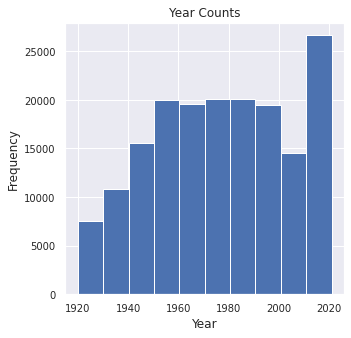

In [ ]:
plt.figure(figsize=(5,5))
data_file["year"].plot.hist(fontsize = 10)
plt.title("Year Counts",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.xlabel("Year",fontsize = 12)
plt.show()

### **Duration of the Songs** <br>
The durations of the songs in the data are not very different from each other. However, when we look at the cut version of it (graph 2), most of the songs are tend to be close to 100000 ms. <br>
Explicitness has many outliers above the box.

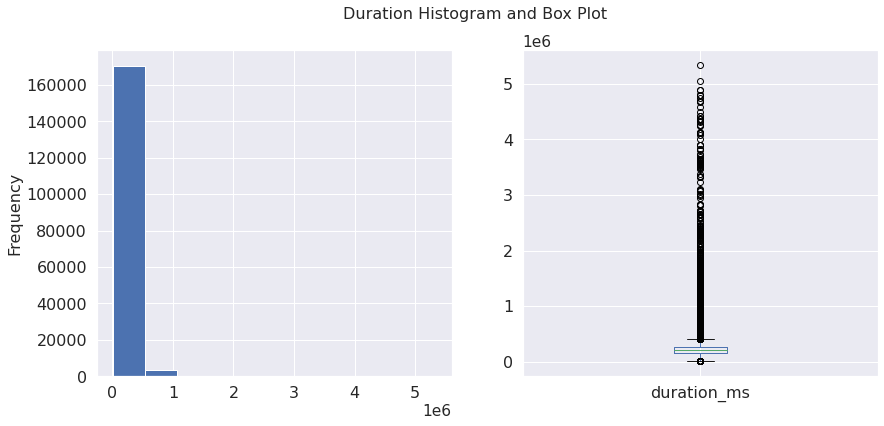

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.suptitle("Duration Histogram and Box Plot",fontsize = 16)
ax[0].set_ylabel(ylabel = "Frequency",fontsize = 16)
data_file["duration_ms"].plot.hist(fontsize = 16, ax = ax[0]) # plot histogram

data_file["duration_ms"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

### **Explicitness**
Most of the songs in the data we use are not explicit.
Explicit song rate almost 5%

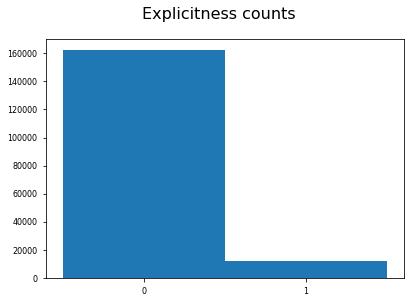

In [ ]:
bins = range(0,3,1)
fig, ax = plt.subplots(1,1)
plt.suptitle("Explicitness counts", fontsize = 16)
ax.hist(data_file["explicit"], bins=bins, align='left')
ax.set_xticks(bins[:-1])
plt.show()

### **Energy and Loudness Distributions**
When we look at the energy and loudness properties of the Songs in the data, we can observe that the distribution of loudness is usually between -20 and -5.
On the other hand, energy has a normal distribution. Songs with almost all energy values ​​were made, and there were not too many or too few songs made at any energy level compared to the others. <br>
Energy has no outliers but loudness have outliers that is below the box.

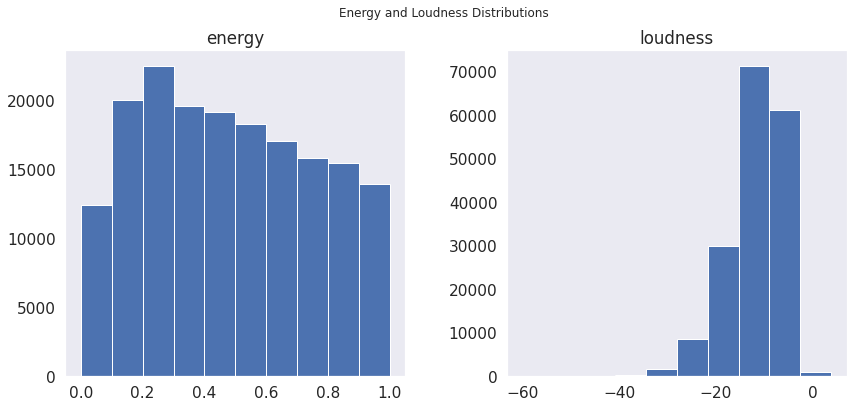

In [ ]:
histograms = data_file.get(["energy","loudness"]).hist(figsize= (14,6),grid = False)
plt.suptitle("Energy and Loudness Distributions",fontsize = 12)
plt.show()

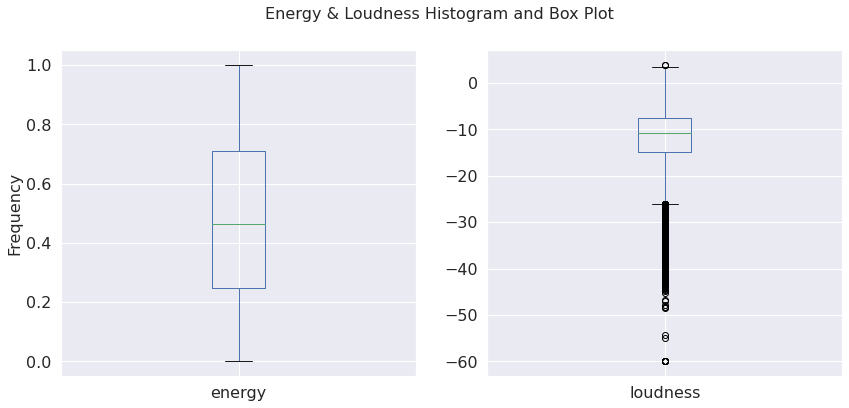

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.suptitle("Energy & Loudness Histogram and Box Plot",fontsize = 16)
ax[0].set_ylabel(ylabel = "Frequency",fontsize = 16)
data_file["energy"].plot(kind = "box", fontsize = 16, ax = ax[0]) # plot histogram


data_file["loudness"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

### **Liveness and Valence Distributions**
When we examine the valence and liveness properties of the songs in the data, we see that the songs with a liveness value between 0.1 and 0.2 are too much.
On the other hand, the valence values may ​​have a normal distribution. Although there are more songs with a value of 0.5 valence, there is not an extreme difference compared to other values. <br>
Liveness data has many outliers but valence does not have.

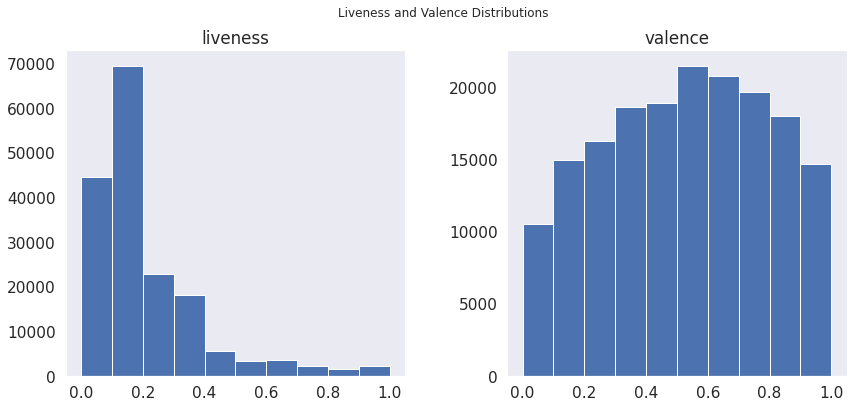

In [ ]:
histograms = data_file.get(["liveness","valence"]).hist(figsize= (14,6), grid = False)
plt.suptitle("Liveness and Valence Distributions",fontsize = 12)
plt.show()

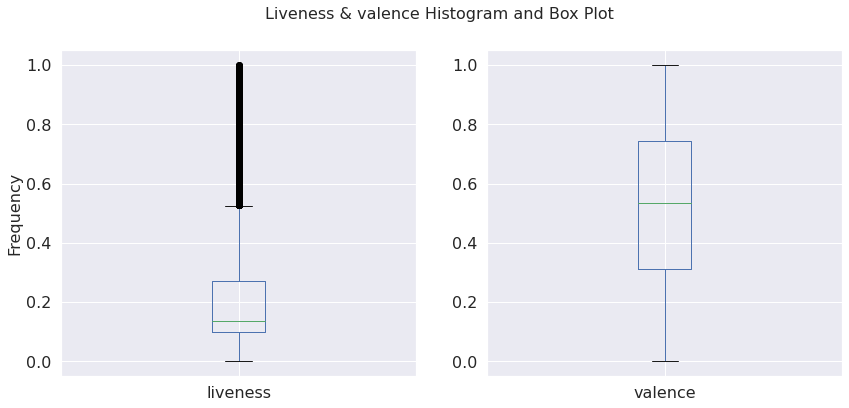

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].set_ylabel(ylabel = "Frequency",fontsize = 16)
plt.suptitle("Liveness & valence Histogram and Box Plot",fontsize = 16)
data_file["liveness"].plot(kind = "box",fontsize = 16, ax = ax[0]) # plot histogram


data_file["valence"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

### **Tempo and Danceability Distributions**
When we look at the graphs below, we can see that the tempo and danceability graphs are similar.
And there are scarcely any songs with very high and very low values ​​in both. Most songs have moderate danceability and tempo value. <br>
Tempo variable has many outliers but danceability does not have.

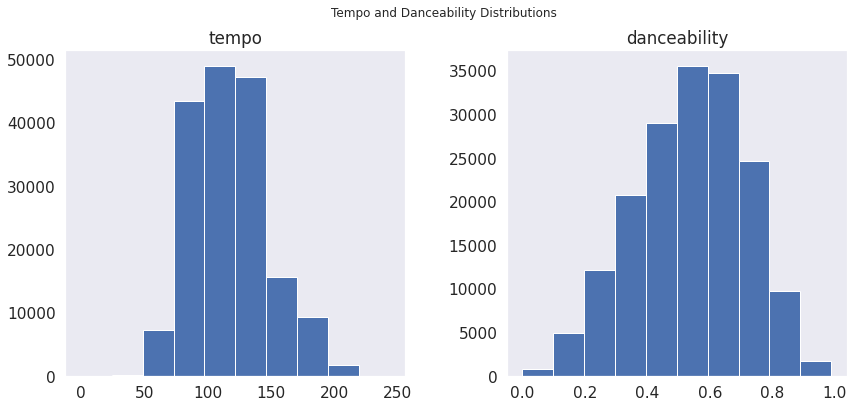

In [ ]:
histograms = data_file.get(["tempo","danceability"]).hist(figsize= (14,6),grid = False)
plt.suptitle("Tempo and Danceability Distributions",fontsize = 12)
plt.show()

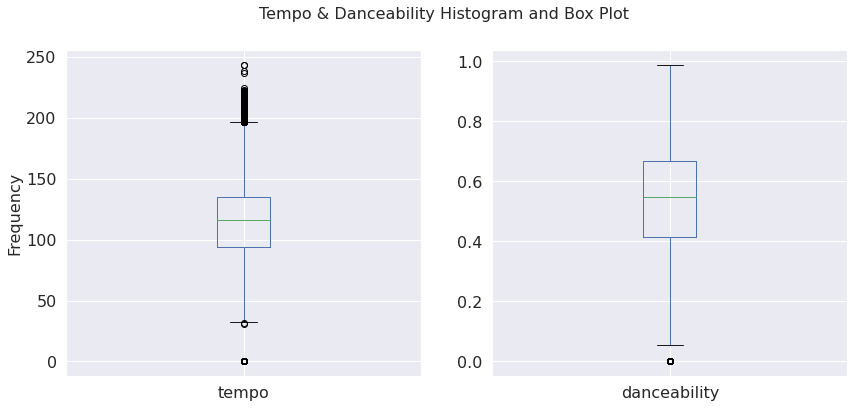

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.suptitle("Tempo & Danceability Histogram and Box Plot",fontsize = 16)
ax[0].set_ylabel(ylabel = "Frequency",fontsize = 16)
data_file["tempo"].plot(kind = "box",fontsize = 16, ax = ax[0]) # plot histogram


data_file["danceability"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

### **Speechiness Counts** <br>
Most of the songs have a spechiness value between 0 and 0.1. However, there is many outliers of speechiness.

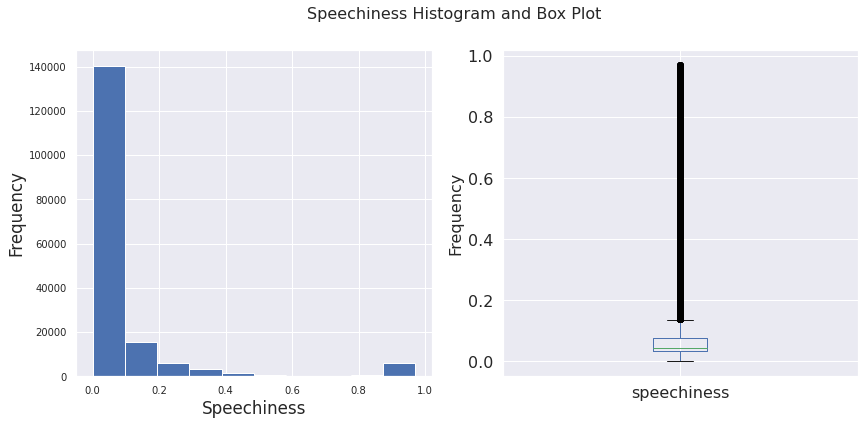

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.suptitle("Speechiness Histogram and Box Plot",fontsize = 16)
ax[0].set_xlabel(xlabel = "Speechiness")
data_file["speechiness"].plot.hist(fontsize = 10, ax = ax[0]) # plot histogram
plt.ylabel("Frequency",fontsize = 16)

data_file["speechiness"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

### **Acousticness Counts** <br>
Acousticness values ​​are usually concentrated in two extreme corners. <br>
 The acousticness of most of the songs is either too low or too high. There are fewer songs with moderate acousticness.

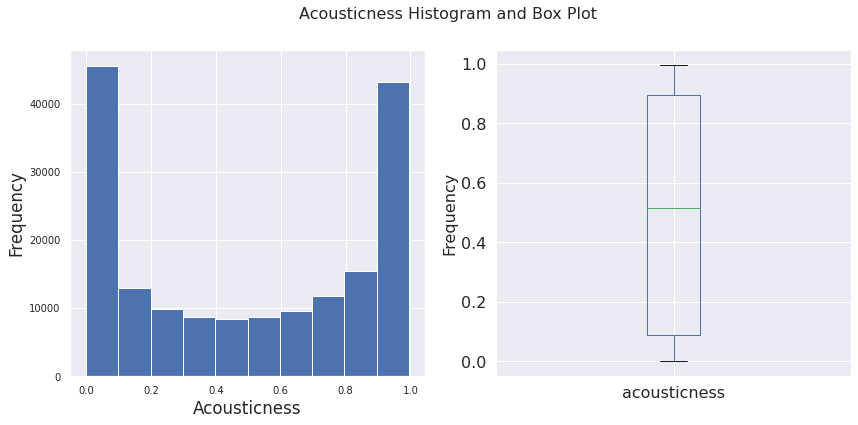

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.suptitle("Acousticness Histogram and Box Plot",fontsize = 16)
ax[0].set_xlabel(xlabel = "Acousticness")
data_file["acousticness"].plot.hist(fontsize = 10, ax = ax[0]) # plot histogram
plt.ylabel("Frequency",fontsize = 16)

data_file["acousticness"].plot(kind = "box",fontsize = 16, ax = ax[1]) # plot box
plt.show()

# **Bivariate Analysis**

### **Heatmap**

The heatmap below shows us the correlation between the properties of the songs. We can say that the closer the numbers in the boxes to the value 1 or -1, the closer there is a correlation between those two properties. For example, as you can see below, the value closest to 1 is 0.78 and we can say that there is a positive correlation between energy and loudness. We also see a value of -0.75 in the box formed by energy and acousticness, which shows us that there is a negative correlation between these two properties. Creating this heatmap helped us a lot in choosing which properties to use in the scatter plots we will create below.

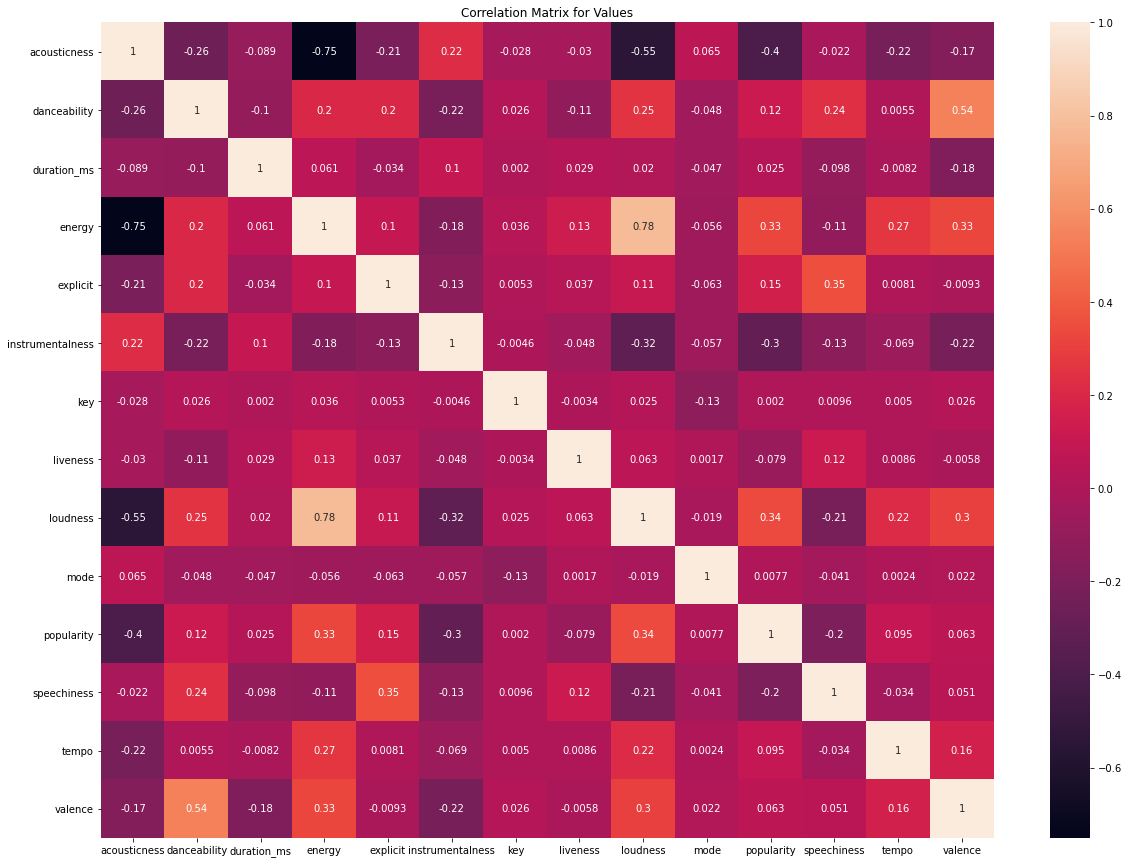

In [ ]:
import seaborn as sn

correlationDatas = data_file.drop(columns = ["year"])

plt.figure(figsize=(20,15))
plt.title("Correlation Matrix for Values")
corrMat = correlationDatas.corr()
sn.heatmap(corrMat, annot = True)
sn.set(font_scale = 1.4)
plt.show()

### **Scatter Plots**

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("seaborn")

### **Energy and Acousticness Scatter Plot** <br>
After seeing the value of -0.75 in the box created by the energy and Acousticness in the heatmap, we used these two properties to create a scatter plot. As we can see below, the value created in the heatmap did not mislead us and a highly negative correlation appeared in the scatter plot. Even if there are some outliers, we can say that there is a strong correlation between these two properties.


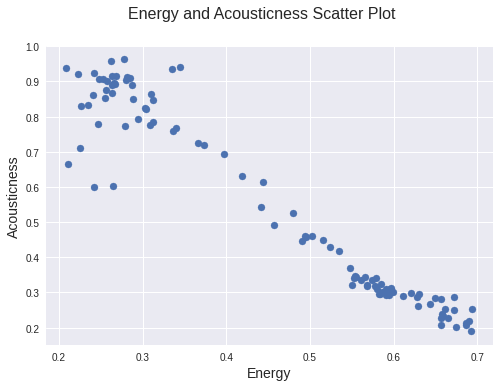

In [ ]:
plt.suptitle("Energy and Acousticness Scatter Plot", fontsize = 16)
plt.scatter(x = yearFrame["energy"],y = yearFrame["acousticness"])
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Acousticness", fontsize = 14)
plt.show()

### **Loudness and Energy Scatter Plot** <br>
When we think about these two features, we could guess that loud songs energize people. <br>
 The value of 0.78 in Heatmap also confirmed our prediction. So we created a scatter plot using these two values, and as you can see below, a very strong positive correlation emerged. There are some outliers in this scatter plot as well, but it is obvious that there is a strong positive correlation.

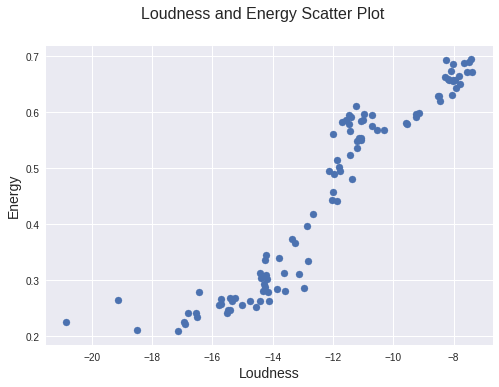

In [ ]:
plt.suptitle("Loudness and Energy Scatter Plot", fontsize = 16)
plt.scatter(x = yearFrame["loudness"],y = yearFrame["energy"])
plt.xlabel("Loudness", fontsize = 14)
plt.ylabel("Energy", fontsize = 14)
plt.show()

### **Loudness and Acousticness Scatter Plot** <br>
The box created by the loudness and acousticness properties in Heatmap shows the value of -0.55. Since this value is negative, a negative correlation appeared in the scatter plot as well. Since this value is a little further away from -1, the correlation in the scatter plot looks a little more messy. In addition, since -0.55 is a little further from -1, there is an increase in the number of outliers.

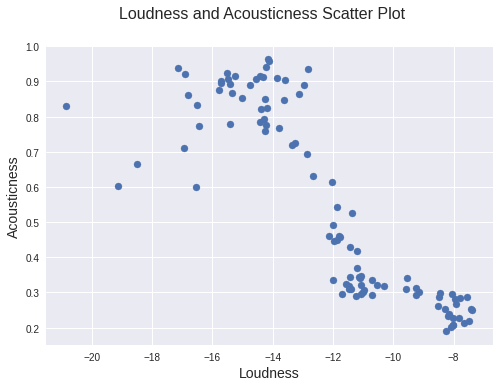

In [ ]:
plt.suptitle("Loudness and Acousticness Scatter Plot", fontsize = 16)
plt.scatter(x = yearFrame["loudness"],y = yearFrame["acousticness"])
plt.xlabel("Loudness", fontsize = 14)
plt.ylabel("Acousticness", fontsize = 14)
plt.show()

### **Valence and Danceability Scatter Plot** <br>
The box created by these two properties was showing the value 0.54. Although this value is not very close to 1, since it is a much higher value than the value in most other boxes, we used both of these properties to create a scatter plot. Since the value of 0.54 is not very close to 1, a scatter plot came out with a large number of outliers. It is certain that there is a correlation between these two properties, but we cannot say that they are highly correlated.

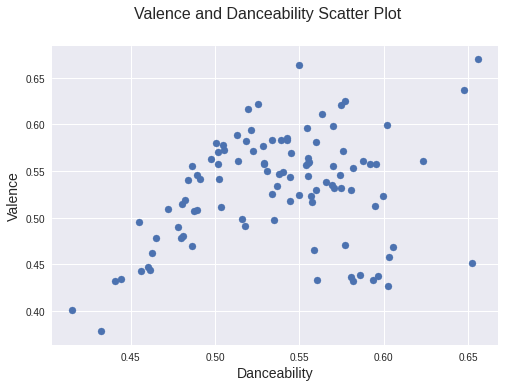

In [ ]:
plt.suptitle("Valence and Danceability Scatter Plot", fontsize = 16)
plt.scatter(x = yearFrame["danceability"],y = yearFrame["valence"])
plt.xlabel("Danceability", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.show()

# **Feature Engineering**
These categorizations are try-outs of future categorizations. Therefore, they are mostly for gaining experience of data with categorizations.

### **Categorizing Danceability** <br>

When we categorized the songs according to their danceability values, we saw that the least danceable and most danceable categories remained low, as you can see in the graph below. Most songs have a medium danceability value.

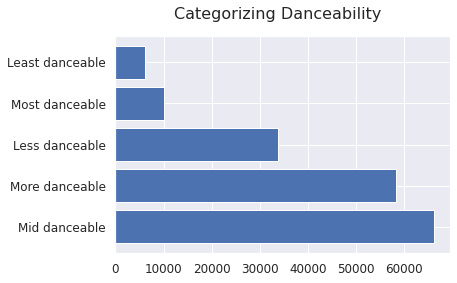

In [ ]:
def danceability(data):
  if 0 <= data < 0.2:
    return "Least danceable" 
  elif 0.2 <= data < 0.4:
    return "Less danceable"
  elif 0.4 <= data < 0.6:
    return "Mid danceable"
  elif 0.6 <= data < 0.8:
    return "More danceable"
  else:
    return "Most danceable"
danceability = pd.DataFrame(data_file["danceability"].apply(danceability).value_counts())
categories = danceability.index
values = danceability["danceability"]

plt.suptitle("Categorizing Danceability", fontsize = 16)
plt.barh(categories, values)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

### **Categorization of Speechiness**
For the sake of Feature Engineering, we listened some songs and decided a make up a value for no-word and includes word classification. The value is not empirical but it may be maintained and used through the project.

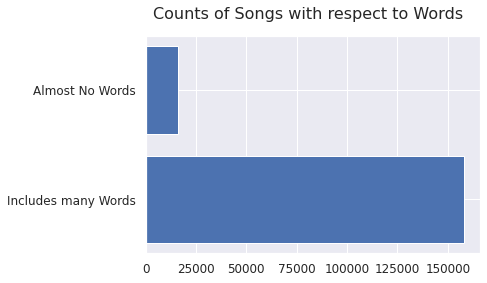

In [ ]:
def speachness(data):
  if 0.03 > data :
    return "Almost No Words" 
  else:
    return "Includes many Words"

speachness = pd.DataFrame(data_file["speechiness"].apply(speachness).value_counts())


categories = speachness.index
values = speachness["speechiness"]
plt.suptitle("Counts of Songs with respect to Words", fontsize = 16)
plt.barh(categories, values)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()


### **Categorizing Loudness** <br>

When analyzing the loudness values ​​of the songs, we did not expect that there would be too many silent songs, and as we guessed, the number of songs with low loudness was very few. When we categorized the songs according to their loudness values, we found that most of them were in the high loudness and very high loudness categories. As you can see in the chart below, the proportion of songs in these two categories is over 90%.

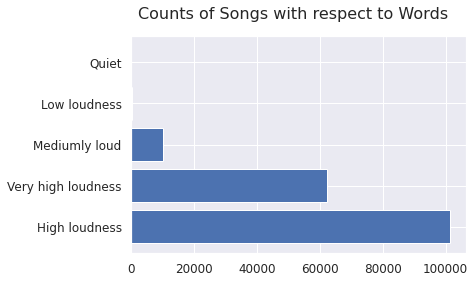

In [ ]:
def loudness(data):
  if 3.85 >= data > -8.92:
    return "Very high loudness" 
  elif -8.92 >= data > -21.69:
    return "High loudness"
  elif -21.69 >= data > -34.46:
    return "Mediumly loud"
  elif -34.46 >= data > -47.23:
    return "Low loudness"
  else:
    return "Quiet"

loudness = pd.DataFrame(data_file["loudness"].apply(loudness).value_counts())
categories = loudness.index
values = loudness["loudness"]

plt.suptitle("Counts of Songs with respect to Words", fontsize = 16)
plt.barh(categories, values)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

## **Feature Engineering Based On Genres**
Example visualizations of aggregated forms based on features: <br>
We have decided to divide sub-genres into 8 different main genres: rock, hip hop, blues, jazz, metal, classical and funk. There is other popular main genres too but for the sake of the simplicity, we decided to take "most known" genres.

In [ ]:
def mainGenres(genresData):
  listOfMainGenres = ["rock","pop","hip hop","blues","jazz","metal","classical","funk"]
  newDataFrame = pd.DataFrame()
  for mainGenre in listOfMainGenres:
    gnr = genresData[genresData["genres"].str.contains(mainGenre)].copy()
    gnr["genres"] = mainGenre
    newDataFrame = pd.concat([newDataFrame,gnr])
  return newDataFrame
newData = mainGenres(data_by_genres)
newDataGroup = newData.groupby("genres").mean().reset_index()
newDataSum = newData.groupby("genres").sum()
newDataGroup.head(8)

genres  acousticness  danceability  ...  popularity       key      mode
0      blues      0.490284      0.553257  ...   28.121382  6.243902  0.878049
1  classical      0.877528      0.349424  ...   23.149000  5.565217  0.878261
2       funk      0.230285      0.639778  ...   26.709954  6.200000  0.766667
3    hip hop      0.212866      0.700327  ...   36.151649  5.972222  0.731481
4       jazz      0.593118      0.534834  ...   27.282699  5.730000  0.840000
5      metal      0.055292      0.386876  ...   29.156984  6.040698  0.773256
6        pop      0.328187      0.588313  ...   35.454131  5.768025  0.840125
7       rock      0.235712      0.535643  ...   34.759409  6.522321  0.888393

[8 rows x 14 columns]

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("seaborn")

### **Popularity of Genres Sum**
Summing up all subgenres' popularity may seem like they are deceptive since it mostly depends on counts and open to repetitions. Here, we aimed to get insight about genres which are probably more popular than other main genres. <br>
As graph shows, pop and rock seems like most popular main genres. The sequence may change but when we want to consider popularity, we should first focus on pop and rock, then others.

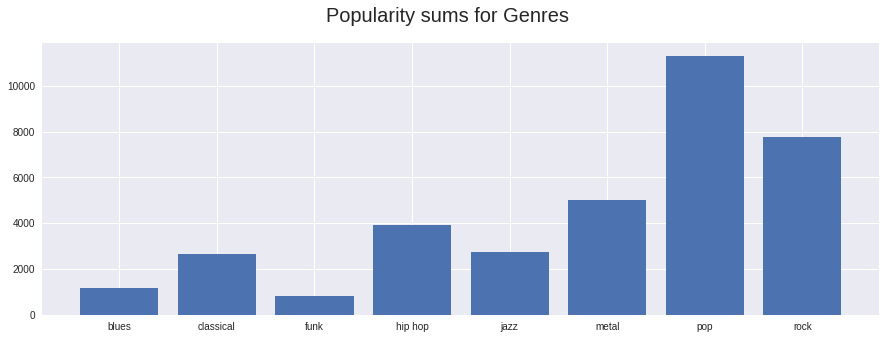

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (15,5))
plt.suptitle("Popularity sums for Genres",fontsize = 20)
plt.bar(wrt, newDataSum["popularity"])
plt.show()

### **Popularity of Genres Mean**
Here, we wanted to prevent "deception" of sums. The idea of popularity of pop and rock still continues, since they have higher means than others. However now we have another main genre that has high popularity mean: hip hop.

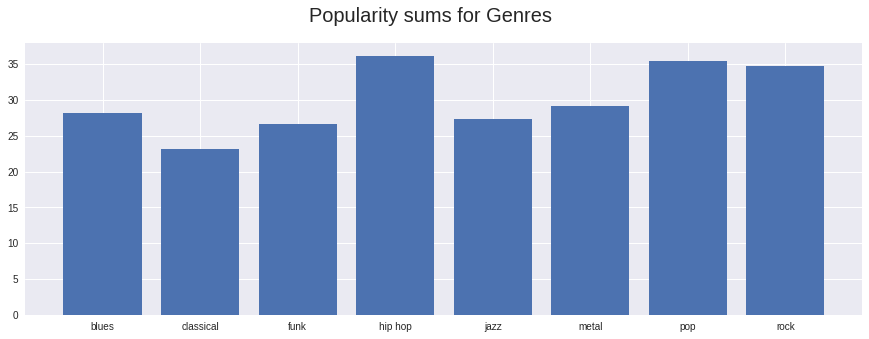

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (15,5))
plt.suptitle("Popularity sums for Genres",fontsize = 20)
plt.bar(wrt, newDataGroup["popularity"])
plt.show()

### **Analysis of Danceability and Energy with Genres**
In the beginning of the analysis, we expected that classical songs will have very low danceability and energy. In comparison to other genres, the classical songs have low danceability and energy but estimated proportion was lower. <br>
Actually, other genres have properties as expected:
1. Metal, funk, hip hop, rock, pop has high energy.
2. Most danceable genres are hip hop, pop and funk. <br>



Therefore, the genres fit the "stereotypes".

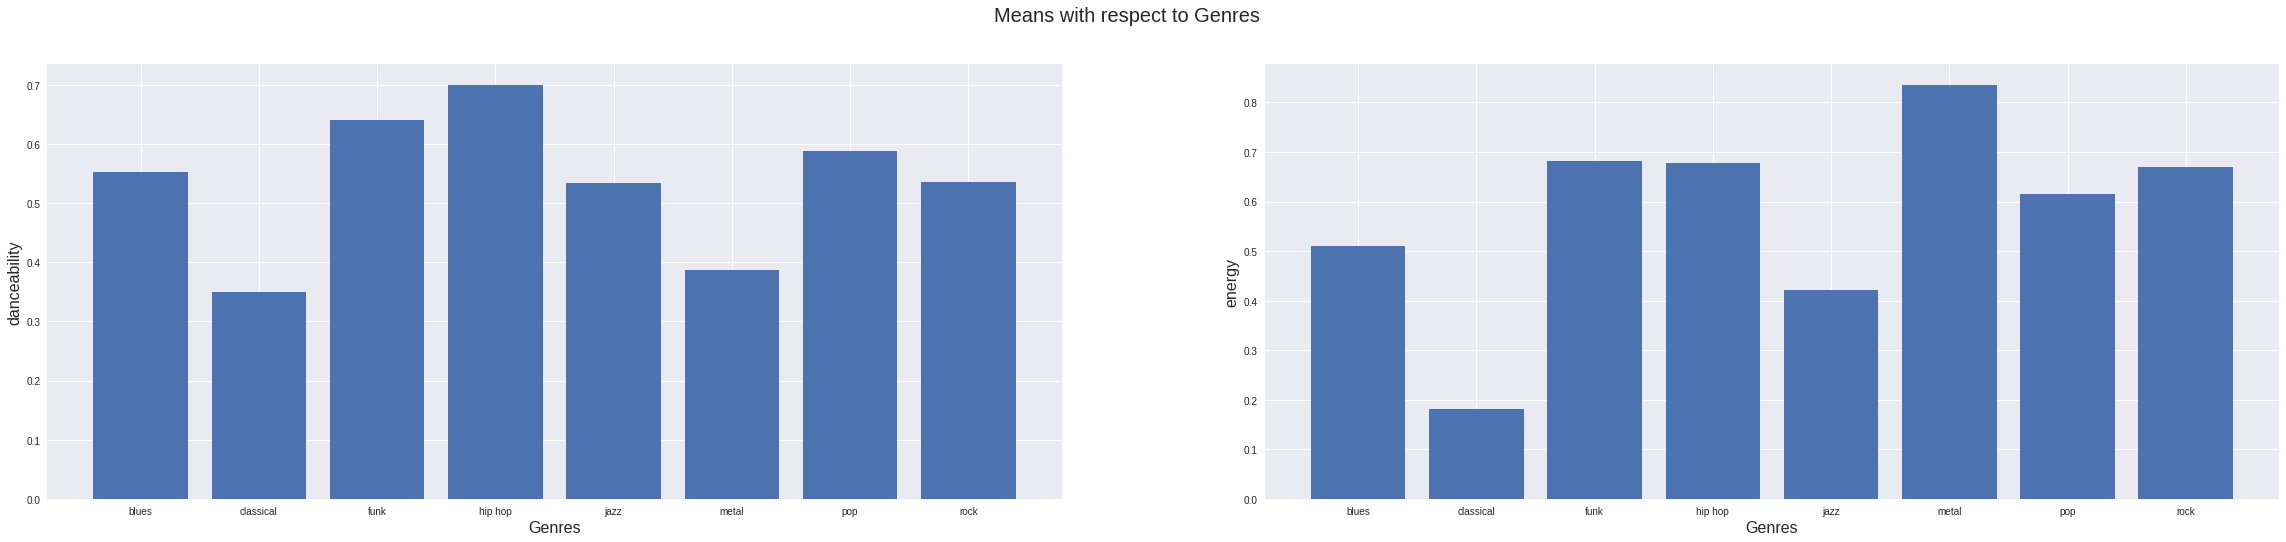

In [ ]:
y = newDataGroup["genres"]
fig = plt.figure(figsize = (40,8))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Genres",fontsize =20)
ax.bar(y,newDataGroup["danceability"])
ax.set_ylabel("danceability",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(y,newDataGroup["energy"])
ax.set_ylabel("energy",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)

plt.show()


### **Analysis of Liveness and Valence with Genres**
Our genres have similar means about liveness except classical music, even classical music is close to others. Therefore, if we want to use "liveness" in our further experimentations, we might need to use it with different genres than our main genres, or we should ignore the genres when liveness is the subject. <br>
However, valence has more useful means. Classical music and metal have low valences, which is expected since classical music is slow and sad and metal is "dark" in our ideas. On the other hand, it is not very-likely to distinguish other genres' valences.

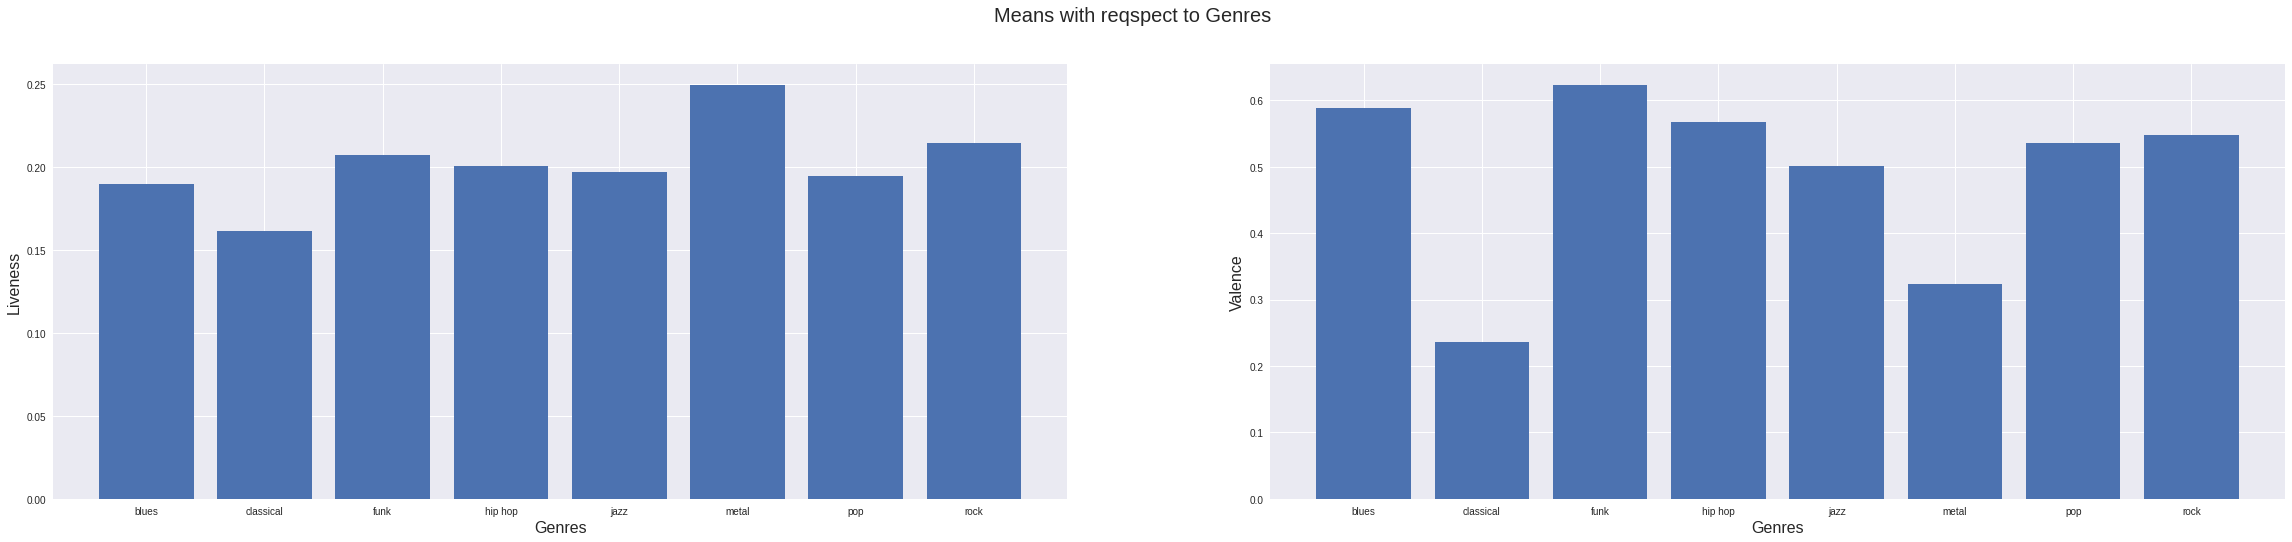

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (40,8))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Genres",fontsize =20)
ax.bar(wrt,newDataGroup["liveness"])
ax.set_ylabel("Liveness",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(wrt,newDataGroup["valence"])
ax.set_ylabel("Valence",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)

plt.show()

### **Analysis of Tempo and Danceability with Genres**
Again, unfortunately tempo seems not distinguishible among genres. The distributions is almost uniform, so if we want to distinguish them with genres, variable transformation with taking square & cube may be useful. Other than that, we could not see any useful way to use it, except classical music has lower tempo. <br>
Loudness is more lucky case here. We have transformed loudness little bit and add a dummy value 50 to see positive numbers and compare them. Since it may result in misunderstanding of the data, we will include the standard version of it after 1 cell. <br>
As it can be seen, classical music and jazz is not loud as much as other genres. This situation may have good distinctive effect.

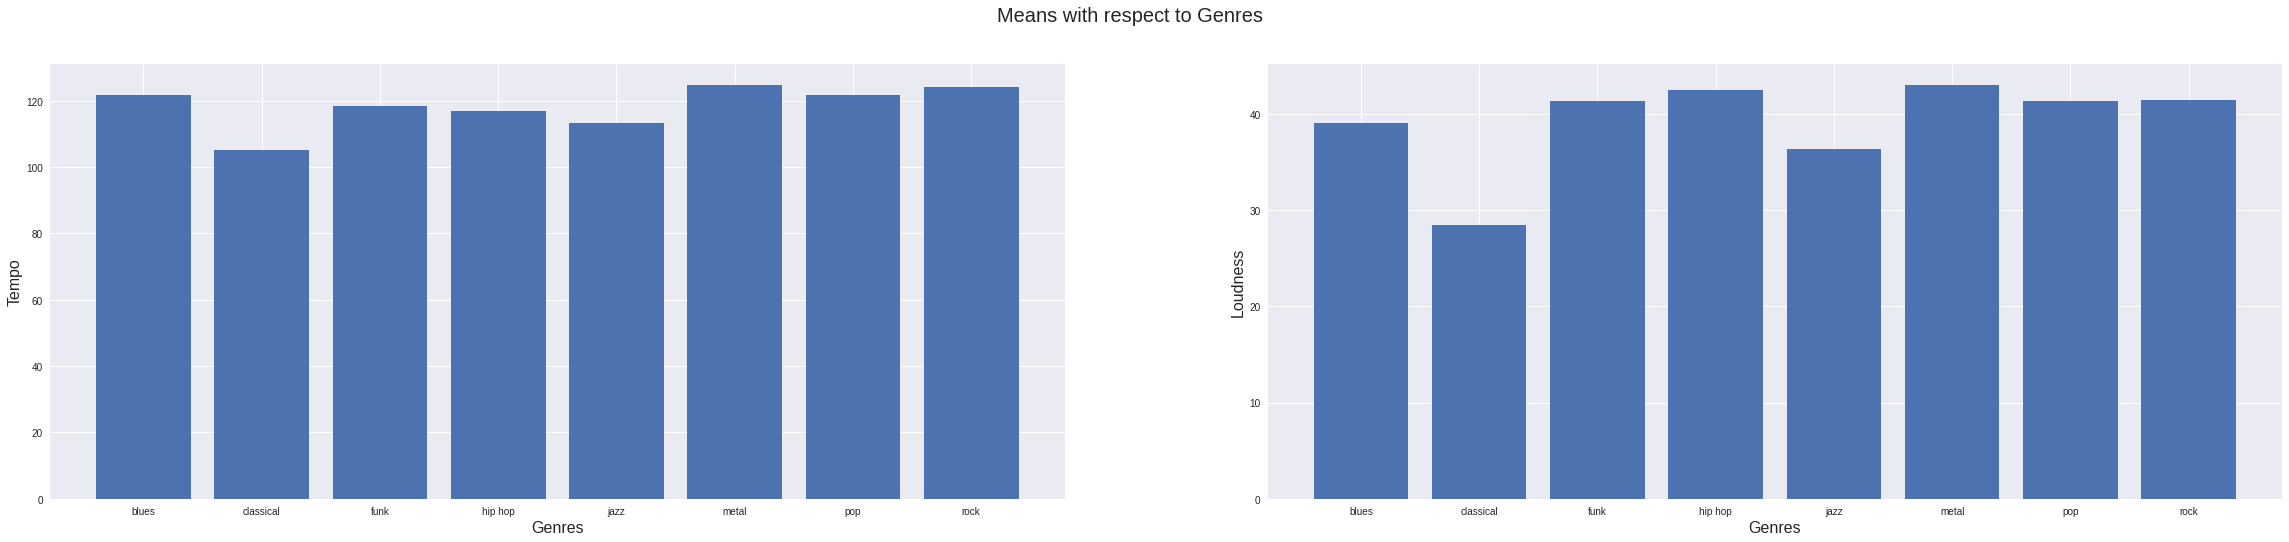

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (40,8))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Genres",fontsize =20)
ax.bar(wrt,newDataGroup["tempo"])
ax.set_ylabel("Tempo",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(wrt,newDataGroup["loudness"]+50)
ax.set_ylabel("Loudness",fontsize = 16)
ax.set_xlabel("Genres",fontsize = 16)

plt.show()

**As we promised, here is the standard version of loudness:**

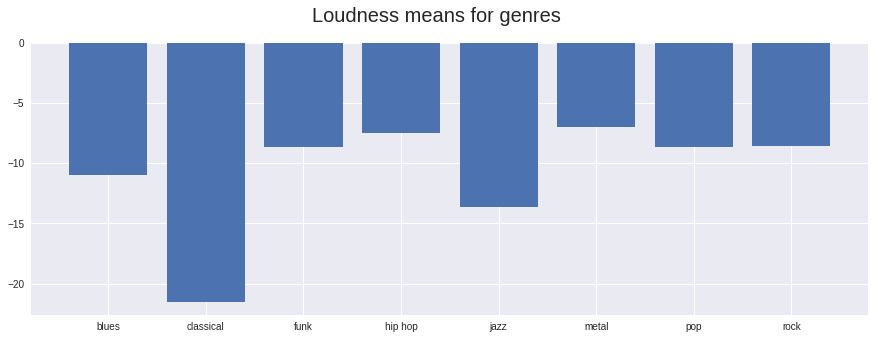

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (15,5))
plt.suptitle("Loudness means for genres", fontsize = 20)
plt.bar(wrt, newDataGroup["loudness"])
plt.show()

### **Analysis of Speechiness with Genres**
As it is expected, hip hop has highest speechiness value, which means there is more words in the hip hop genre with a distinction. <br>
Other genres look similar, even they have order inside them. Most interesting genre is again "classical" since it has close speechiness to other genres.

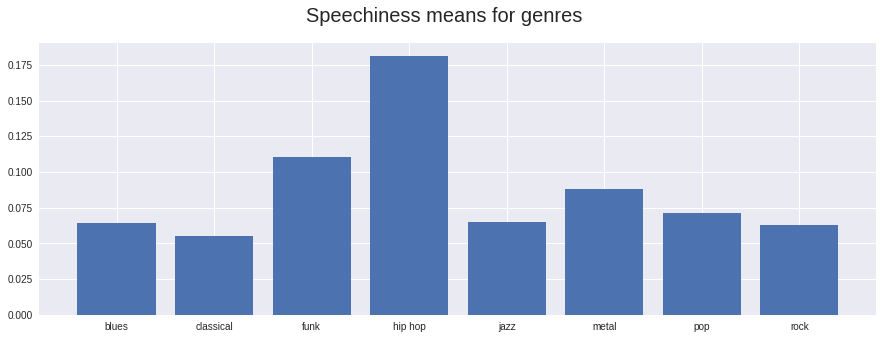

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (15,5))
plt.suptitle("Speechiness means for genres", fontsize = 20)
plt.bar(wrt, newDataGroup["speechiness"])
plt.show()

### **Analysis of Acousticness**
Acousticness is an important factor to distungish genres since the variability is high. <br>
1. Classical music has high and distinctive acousticness.
2. Metal music has low and distincitve acousticness.
3. Jazz and blues have higher acousticness than pop, rock, funk, hiphop.

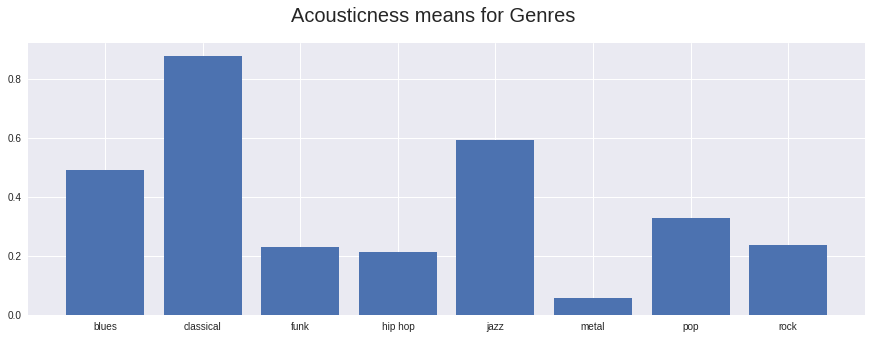

In [ ]:
wrt = newDataGroup["genres"]
fig = plt.figure(figsize = (15,5))
plt.suptitle("Acousticness means for Genres", fontsize = 20)
plt.bar(wrt, newDataGroup["acousticness"])


plt.show()

## **The Importance and Summary of Genre Analysis**
The genres we used have been analysed with different properties, and they will help us to distinguish genres and classify user-consumer preferences. However, every property was not effective as others. So we tried to decide better ones to distinguish with "raw" data, other ones should be transformed to use. The distinctive ones for us: <br>
1. Acousticness
2. Popularity
3. Speechiness
4. Valence
5. Energy
6. Danceability


## **Categorizing data by Decades**
We all know that we have natural category for music: Decades! <br>
In this section, we just summarized **means** of different decades, so the aim of analysis will determine general concepts of decades.

In [ ]:
yearFrame["year"] = yearFrame["year"].astype(str)
def decades(decadesData):
  newDataFrame = pd.DataFrame()
  for decade in range(1920,2021,10):
    dcd = decadesData[decadesData["year"].str.contains(str(decade))].copy()
    dcd["year"] = decade
    newDataFrame = pd.concat([newDataFrame,dcd])
  return newDataFrame

decadesData = decades(yearFrame)
decadesData.head(200)

year  acousticness  danceability  ...  popularity  key  mode
0    1920      0.631242      0.515750  ...    0.610315    2     1
10   1930      0.935625      0.519710  ...    0.851007    5     1
20   1940      0.846520      0.525451  ...    0.850312    7     1
30   1950      0.822814      0.529037  ...    3.860000    7     1
40   1960      0.768254      0.482052  ...   19.848500    5     1
50   1970      0.457020      0.505228  ...   33.903322    2     1
60   1980      0.293193      0.554361  ...   35.024020    0     1
70   1990      0.343075      0.533510  ...   40.168327    7     1
80   2000      0.297568      0.595451  ...   46.259005    7     1
90   2010      0.208717      0.599620  ...   29.828149    1     1
100  2020      0.202303      0.605285  ...   24.064741    0     1

[11 rows x 14 columns]

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("seaborn")

### **Analysis of Means of Danceability and Energy for Decades**
Danceability does not seem distinctive through decades. However it cann be said that it increased after all 100 year. <br>
Energy has changing values. Spesifically until 1950's, it has been decreased. The social factors may be affected it, however it is not our subject to work, and without deep analysis it is dangerous to claim that. Therefore, the reader of this analysis **should not** directly explain this decrease with events and indicate that after 1950's energy has been increased, which will help us to distinguish songs through decades.

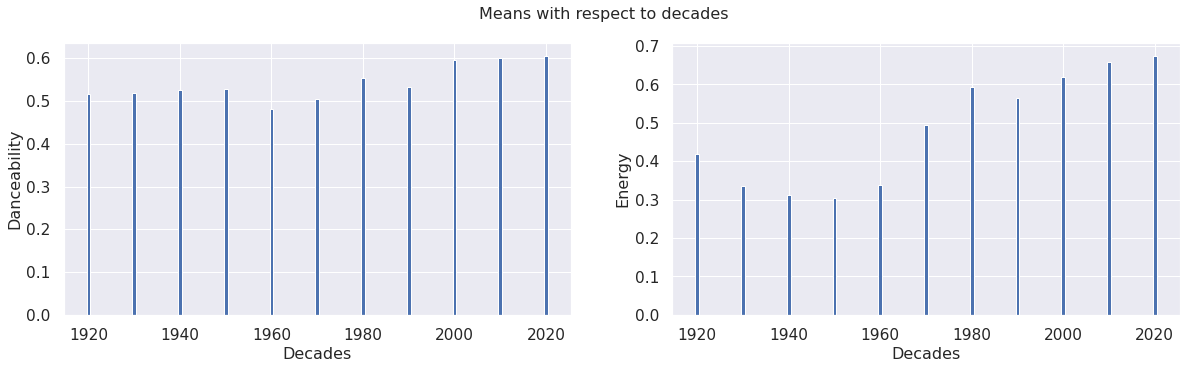

In [ ]:
y = decadesData["year"]
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to decades",fontsize =16)
ax.bar(y,decadesData["danceability"])
ax.set_ylabel("Danceability",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(y,decadesData["energy"])
ax.set_ylabel("Energy",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)

plt.show()

### **Analysis of Means of Liveness and Valence with Decades**

Both liveness and valence has wavy distributions for decades. They do not seem very distinctive.

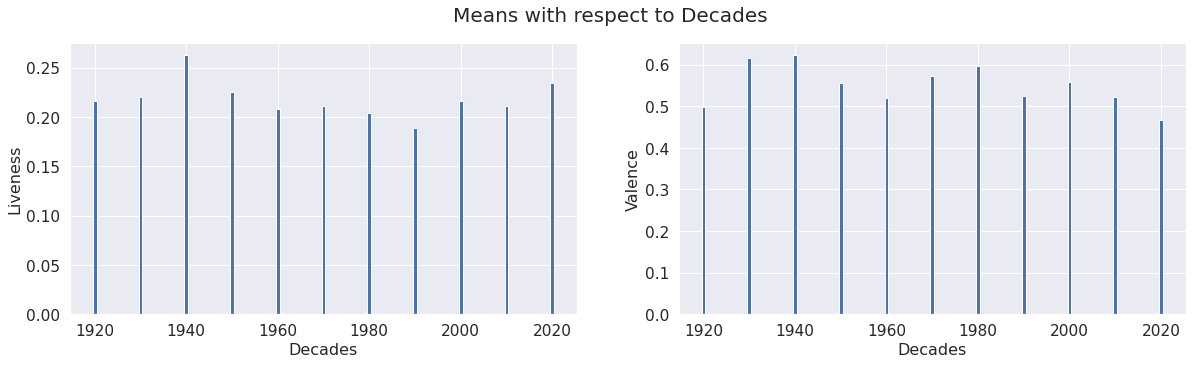

In [ ]:
wrt = decadesData["year"]
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Decades",fontsize =20)
ax.bar(wrt,decadesData["liveness"])
ax.set_ylabel("Liveness",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(wrt,decadesData["valence"])
ax.set_ylabel("Valence",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)

plt.show()

### **Analysis of Means of Tempo and Loudness with Decades**
Tempo has wavy and close distribution. Variable transformation is must to do if we want to use tempo with decades to be distinctive. <br>
We again transformed loudness with summing up. As It can be seen it graph, loudness has been increased until 2020's, even it decreased between 1920-1950. So using loudness & decades relationship may be useful. <br>


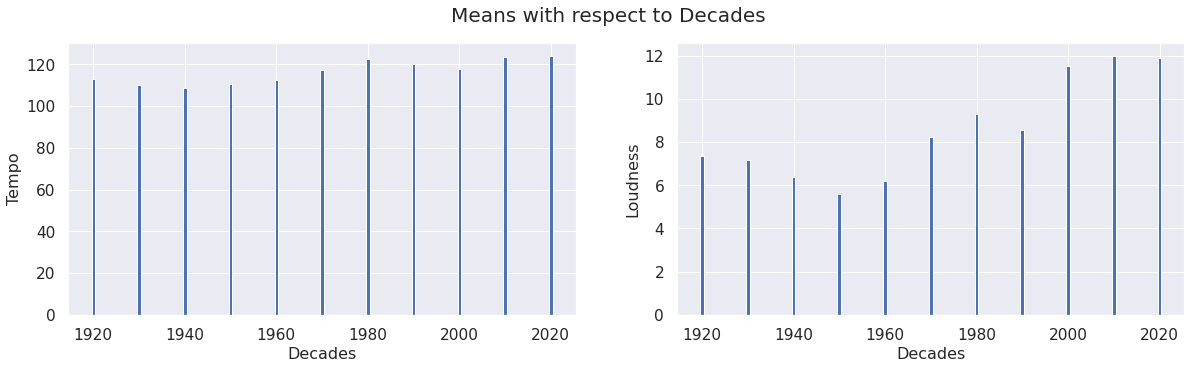

In [ ]:
wrt = decadesData["year"]
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Decades",fontsize =20)
ax.bar(wrt,decadesData["tempo"])
ax.set_ylabel("Tempo",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(wrt,decadesData["loudness"]+20)
ax.set_ylabel("Loudness",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)

plt.show()

**We showed raw loudness data to prevent deceptions**

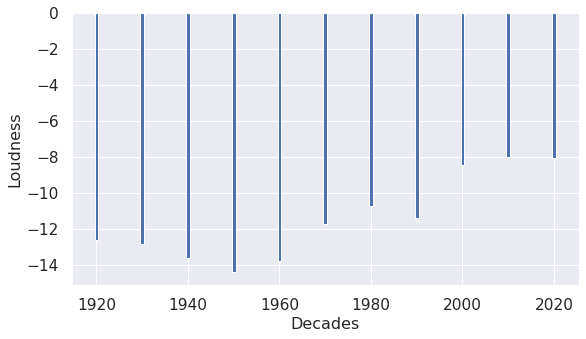

In [ ]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 2, 1)
ax.bar(wrt,decadesData["loudness"])
ax.set_ylabel("Loudness",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)
plt.show()

### **Analysis of Speechiness and Acousticness with Decades**
There is huge difference between 1940-1950 and other decades in speechiness, when we look at to chart. So 40's-50's songs have more words when we take their means. This may be distinctive property. <br>
Acousticness has been fallen through decades. It may be about the formation of new genres-popularity of them. This situation may be searched. <br>


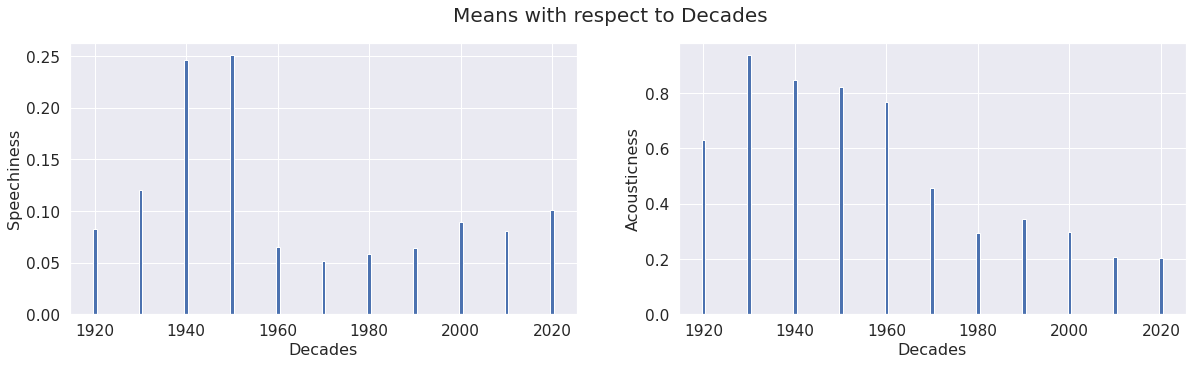

In [ ]:
wrt = decadesData["year"]
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Means with respect to Decades",fontsize =20)
ax.bar(wrt,decadesData["speechiness"])
ax.set_ylabel("Speechiness",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)
ax = fig.add_subplot(1, 2, 2)
ax.bar(wrt,decadesData["acousticness"])
ax.set_ylabel("Acousticness",fontsize = 16)
ax.set_xlabel("Decades",fontsize = 16)

plt.show()

### **Summary of Decades**
Even we looked just to means, we gained some insight about decades. They may be used with genres to decide the type of songs, but also decades may be overgeneralization. We did not decide our opinion about decades.

# **Analysis of Most Popular Artists and Songs**

## **Most Popular Songs**
We have decided to work on top 100 songs. However, we showed top 10.

In [ ]:
popularSongs = data_file.sort_values(by = "popularity",ascending = False).head(100)
pd.DataFrame(popularSongs.head(10).get(["name","artists"])).rename(columns = {"name":"Most Popular 10 Songs"}).reset_index().drop(columns = "index")

Most Popular 10 Songs                       artists
0         drivers license            ['Olivia Rodrigo']
1  Mood (feat. iann dior)     ['24kGoldn', 'iann dior']
2               positions             ['Ariana Grande']
3                  DÁKITI  ['Bad Bunny', 'Jhay Cortez']
4                 BICHOTA                   ['KAROL G']
5                   34+35             ['Ariana Grande']
6                 Whoopty                        ['CJ']
7             WITHOUT YOU             ['The Kid LAROI']
8          Therefore I Am             ['Billie Eilish']
9      LA NOCHE DE ANOCHE      ['Bad Bunny', 'ROSALÍA']

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("ggplot")

### **Year distribution and Explicitness of Most Popular Songs**
Most of the popular songs are brand-new ones. It can be said that new songs are more popular. <br>
Explicitness rate of popular songs are very high when we compare to all data. <br>


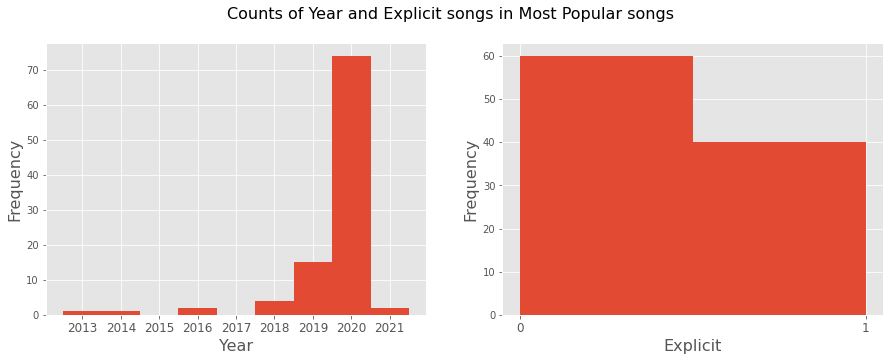

In [ ]:
bins = range(2013,2023,1)
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1)
plt.suptitle("Counts of Year and Explicit songs in Most Popular songs",fontsize =16)
ax.set_xticks(bins[:-1])
ax.set_xticklabels(labels = bins[:-1],fontsize = 12)
ax.hist(popularSongs["year"],bins = bins,align = "left")
ax.set_xlabel("Year",fontsize =16)
ax.set_ylabel("Frequency",fontsize = 16)

binsexp = range(0,3,1)
ax = fig.add_subplot(1, 2, 2)
ax.hist(popularSongs["explicit"], bins = 2)
ax.set_xticks(binsexp[:-1])
ax.set_xticklabels(labels = binsexp[:-1],fontsize = 12)
ax.set_ylabel("Frequency",fontsize = 16)
ax.set_xlabel("Explicit",fontsize = 16)

plt.show()

### **Distributions of Most Popular Songs**

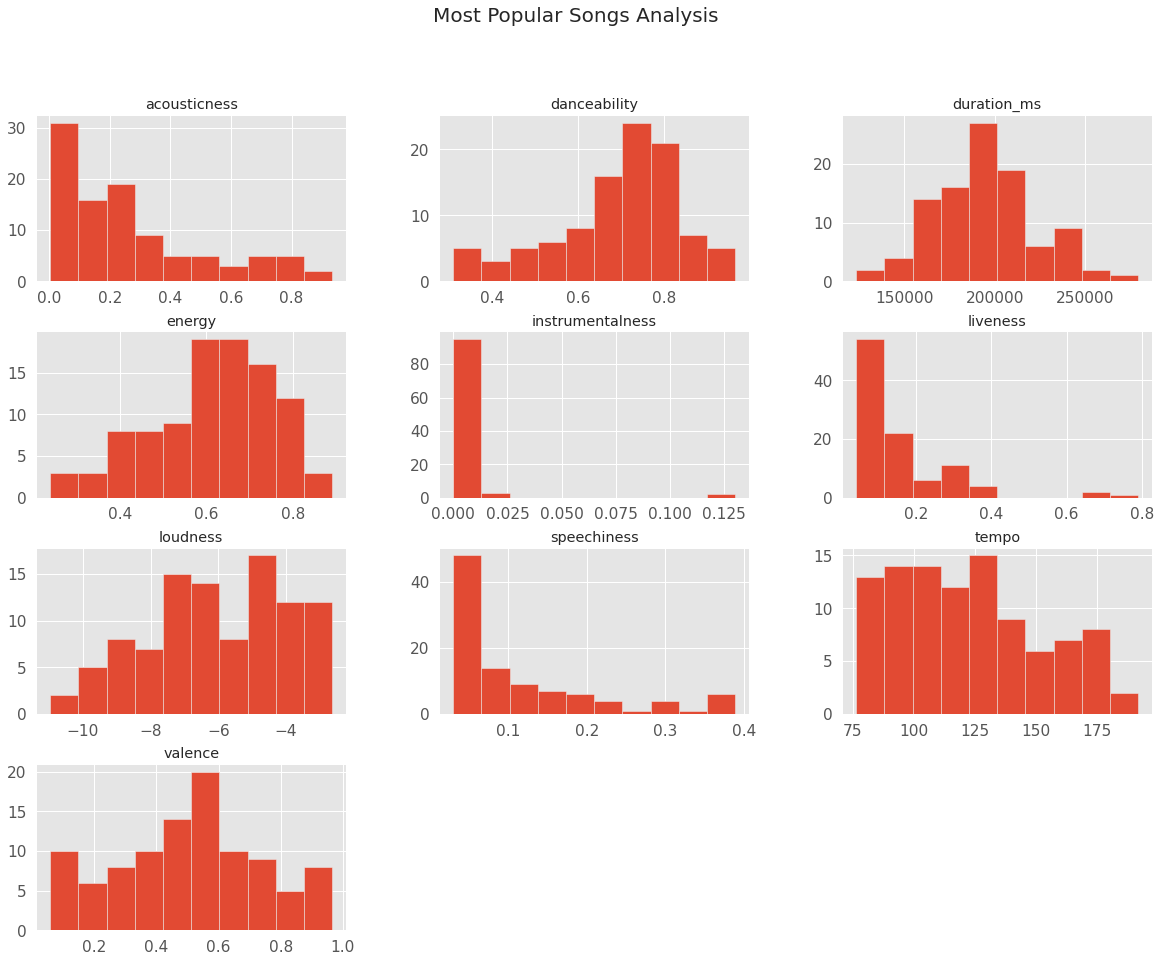

In [ ]:
popularSongs.drop(columns = ["explicit","key","year","mode","popularity"]).hist(figsize = (20,15))
plt.suptitle("Most Popular Songs Analysis",fontsize = 20)
plt.show()

### **Heatmap of Most Popular Songs**
Unfortunately, except loudness & energy, we could not observe high correlations within most popular 100 songs. So, in the future, we will not use linear correlation ideas in popular songs, at least for the value 100. Increasing the number of songs may be better.

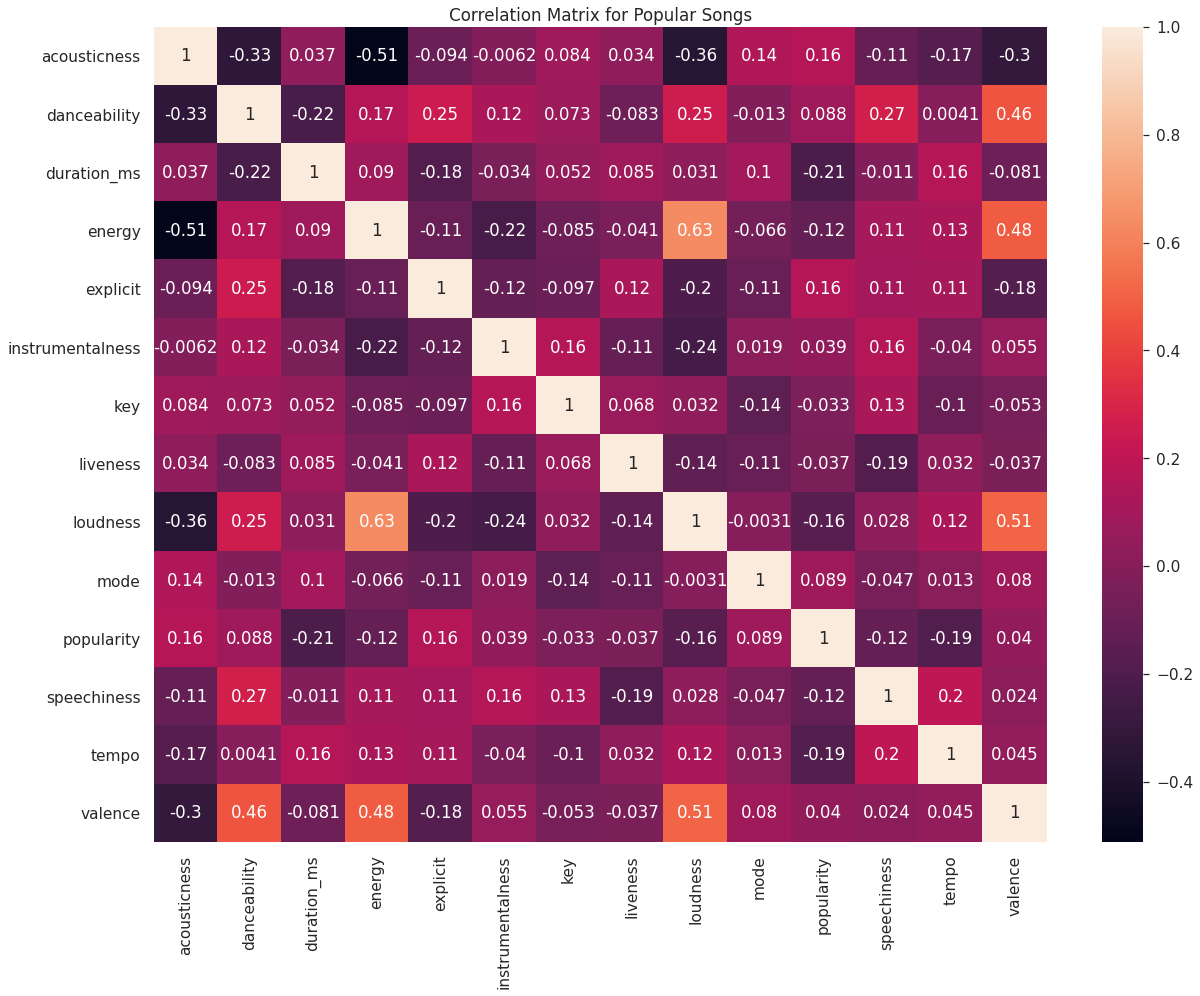

In [ ]:
correlationDatas = popularSongs.drop(columns = ["year"])

plt.figure(figsize=(20,15))
plt.title("Correlation Matrix for Popular Songs")
corrMat = correlationDatas.corr()
sn.heatmap(corrMat, annot = True)
sn.set(font_scale = 1.4)
plt.show()

**Scatter plot of Energy & Loudness** <br>
For the sake of completeness, we decided to give energy & loudness scatter plot. As it can be seen, even it has the highest correlation among top 100, it dispersed alot.

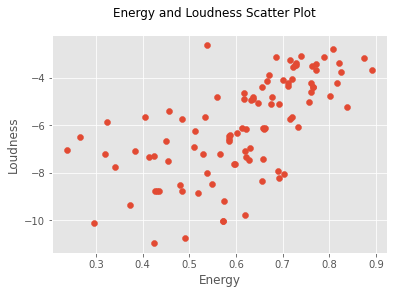

In [ ]:
plt.suptitle("Energy and Loudness Scatter Plot")
plt.scatter(popularSongs["energy"],popularSongs["loudness"])
plt.xlabel(xlabel = "Energy")
plt.ylabel(ylabel = "Loudness")
plt.show()

## **Most popular Artists' Analysis**
We have considered 3 levels of popularity: top 10, top 50 and top 100. The top 10 analysis is just the names of artists since analysing characteristics of top 10 artists may be dangerous.

In [ ]:
topArtists = artistFrame.sort_values(by = "popularity", ascending = False).head(100).drop(columns= ["popularity","key","mode","count","instrumentalness"])
pd.DataFrame(topArtists.head(10).get("artists")).rename(columns = {"artists":"Most Popular 10 Songs"}).reset_index().drop(columns = "index")

Most Popular 10 Songs
0                    CJ
1                  Boza
2            Joel Corry
3                  Juhn
4           Ritt Momney
5             Lele Pons
6       Los Legendarios
7                 KIDDO
8                  Nuka
9              Jerry Di

### **What genres top 50 artists work on?**
Even there is popularity among main genres hip-hop and pop, the subgenres are distributed differently for top 50 artists. "Reggeaton" , "Reggeaton flow", "Trap latino", "Latino" subgenres are highly-dominating other genres with respect to popularity for top 50 artists.

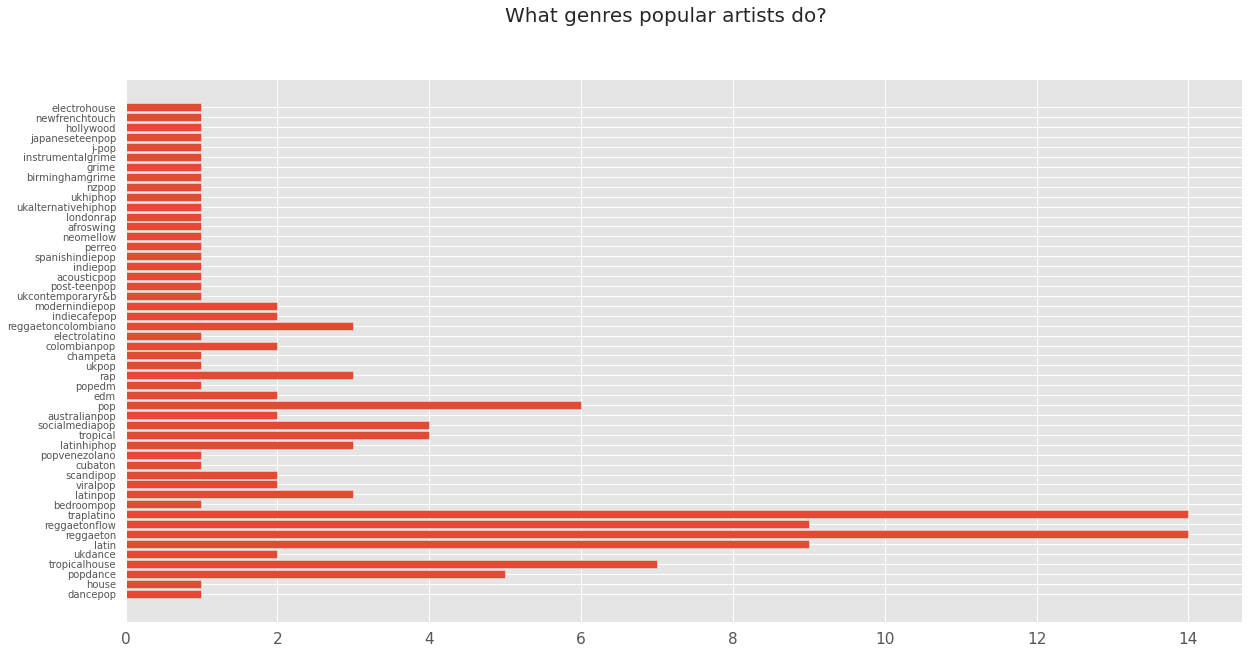

In [ ]:
def genreDistributor(dataFrame):
  dictGenres = {}
  for i in range(0,dataFrame.shape[0]):
    gnr= dataFrame.iloc[i]["genres"]

    gnr = gnr[gnr.find("["):].replace("]","").replace("[","").replace("'","").replace(" ","").split(",")
    for singleGnr in gnr:
      if singleGnr not in dictGenres and singleGnr != '':
        dictGenres[singleGnr] = 1
      elif singleGnr != '':
        dictGenres[singleGnr] +=1
  return dictGenres
fig = plt.figure(figsize = (20,10))
plt.suptitle("What genres popular artists do?",fontsize = 20)
D = genreDistributor(topArtists.head(50))
plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), D.keys(),fontsize = 10) 
plt.show()

### **Analysis of the Songs of the Top 100 Artists** <br>
 1. When we examine the songs of the most famous artists, we can say that they make high-energy songs. The energy distribution is left-skewed. <br>
 2. In addition, we can see that they do not prefer to make songs with low danceability and loudness. <br>
 3. Another interesting part about these artists is their choices of song lengths. The distribution of durations seems like T or Z shaped, in the hypothesis testing part, it may be questioned by normality tests like chi-square test. <br>
 4. However, speechiness of this artists have distribution which is very right-skewed. They mostly do songs with less words. It can be combined with feature engineering's speechiness part and may be useful to use in predictions.
 5. On the other hand, valence of these artist's songs are pretty much uniform. There is deviation on the valence data but the distribution is in 7.5-12.5 mostly. It can be said that they prefer to do "happy" songs.


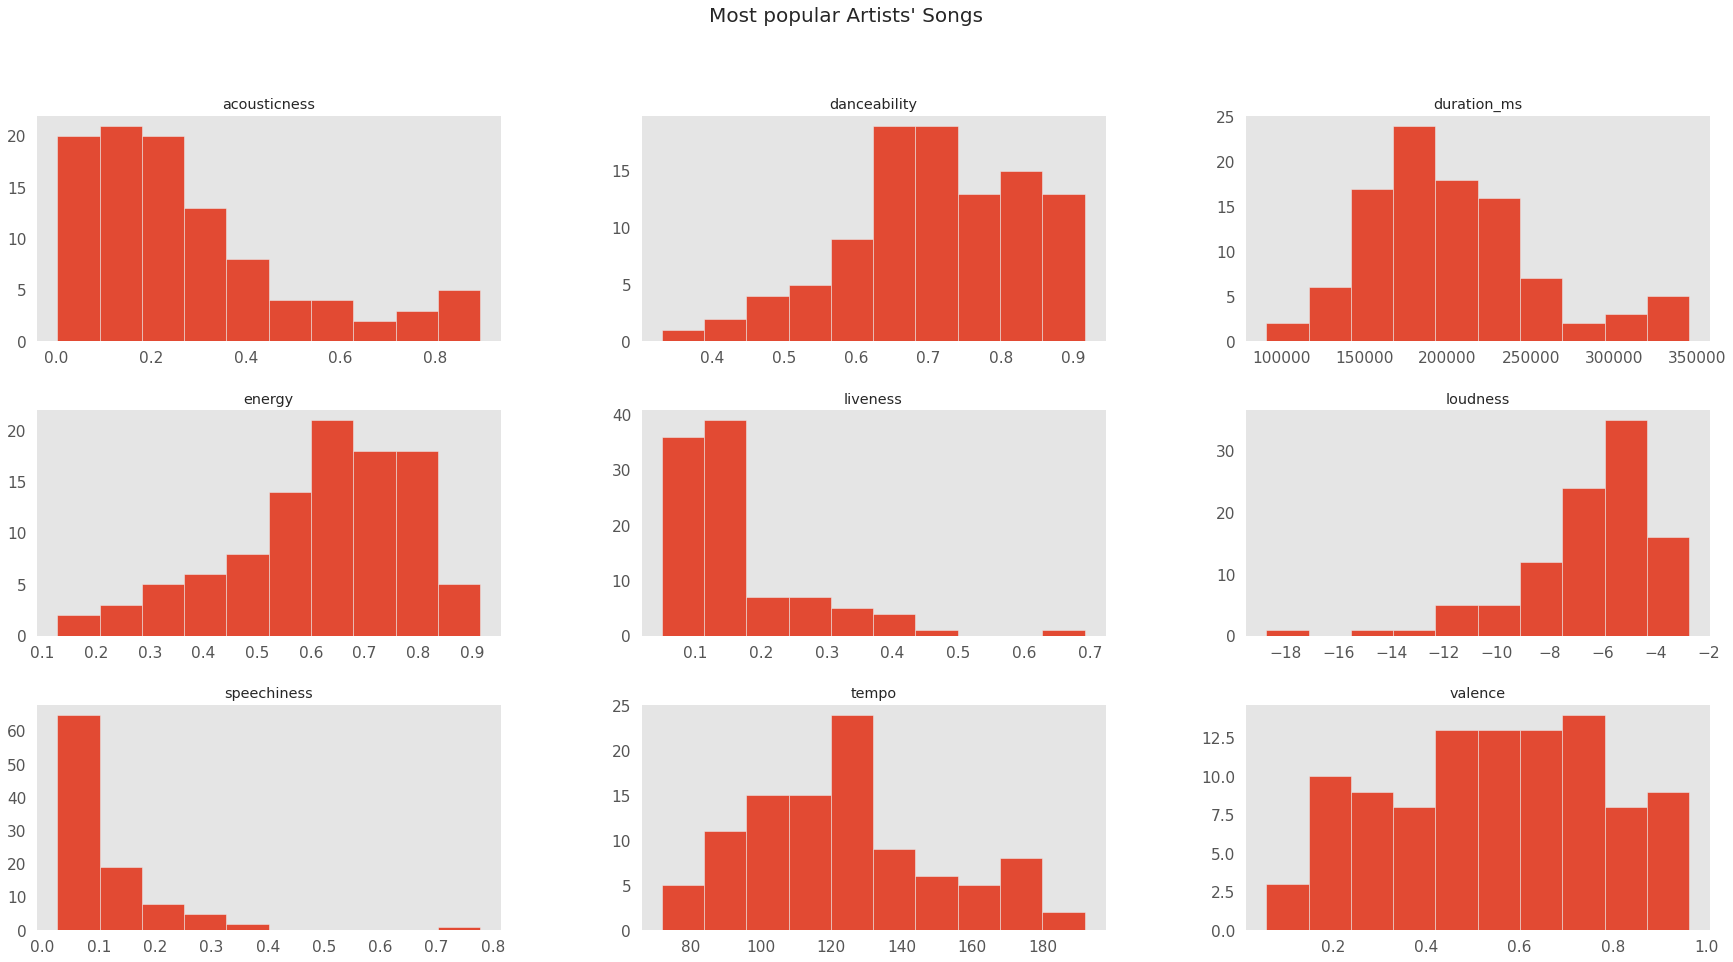

In [ ]:
topAx = topArtists.hist(figsize = (30,15), grid = False)
plt.suptitle("Most popular Artists' Songs", fontsize = 20)
plt.show()

### **Heatmap of Top Artists' Songs** <br>
The only interesting linear correlation is between acousticness and energy. They are highly-negatively correlated for Top 100 Artists.

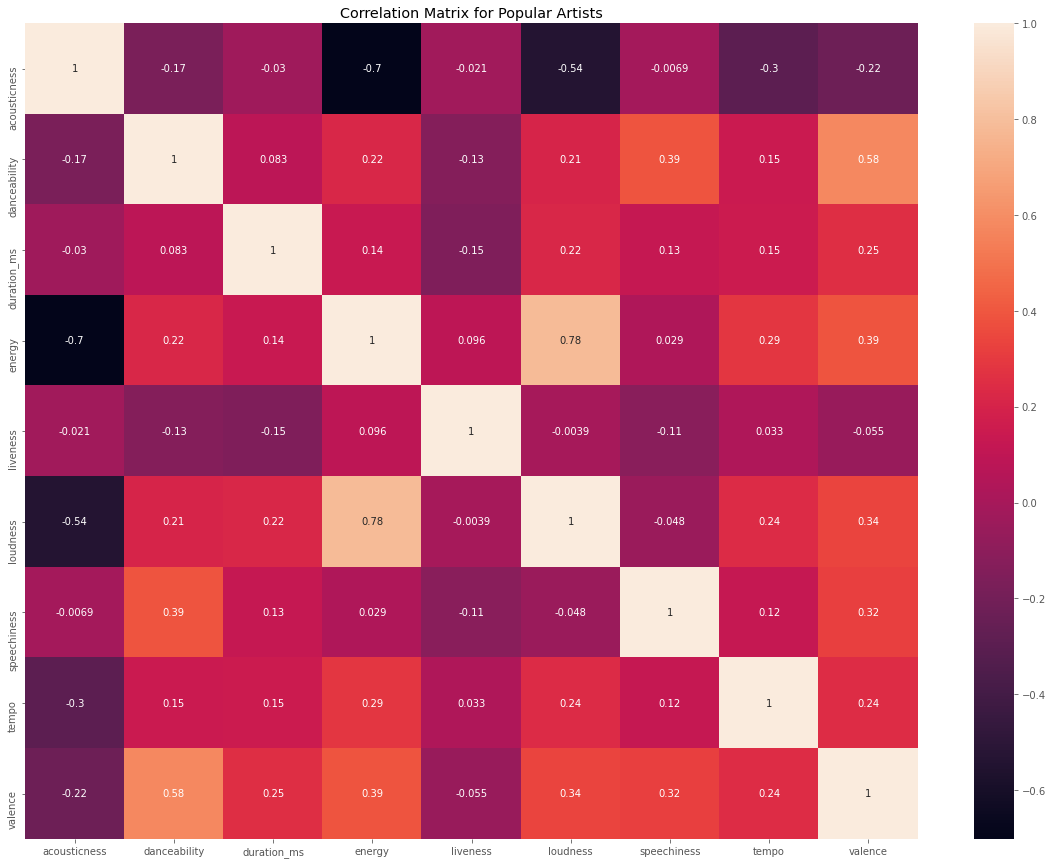

In [ ]:
correlationDatas = topArtists

plt.figure(figsize=(20,15))
plt.title("Correlation Matrix for Popular Artists")
corrMat = correlationDatas.corr()
sn.heatmap(corrMat, annot = True)
sn.set(font_scale = 1.4)
plt.show()

**Scatter plot of Energy & Acousticness for Top 100 artists** <br>
The negative correlation is high between Energy and Acouticness. If acousticness increase, energy will probably decrease in popular artists' songs. However, the scatter is dispersed.

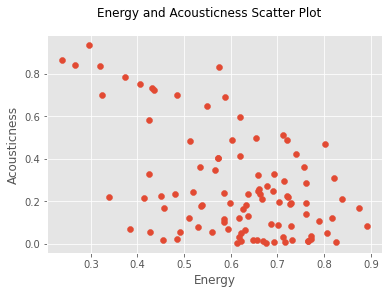

In [ ]:
plt.suptitle("Energy and Acousticness Scatter Plot")
plt.scatter(popularSongs["energy"],popularSongs["acousticness"])
plt.xlabel(xlabel = "Energy")
plt.ylabel(ylabel = "Acousticness")
plt.show()

# **Temporal Analysis of Different Genres**
We analyzed songs of 8 different genres over time: blues, rock, pop, metal, hip hop, jazz, classical, funk. All of them analyzed except mode, key and explicit variables. <br>
Remark: 2021 values may be misleading, so we will not take these datas into account.

In [ ]:
def mainGenres(genresData):
  listOfMainGenres = ["rock","pop","hip hop","blues","jazz","metal","classical","funk"]
  newDataFrame = pd.DataFrame()
  for mainGenre in listOfMainGenres:
    gnr = genresData[genresData["genres"].str.contains(mainGenre)].copy()
    gnr["genres"] = mainGenre
    newDataFrame = pd.concat([newDataFrame,gnr])
  return newDataFrame

dataJ = mainGenres(data_with_genres)

dataJ = dataJ.drop(columns = ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","popularity","key","mode","count"])

genreYear = data_file.copy().reset_index().drop(columns = "id")

newDf = pd.DataFrame(pd.DataFrame(genreYear['artists'].str.split(",").to_list(),index = genreYear["index"]).stack())

newDf = newDf.rename(columns = {newDf.columns[0]:"artists"})
newDf["artists"] = newDf["artists"].str.strip("[").str.strip("]").str.strip("'").str.strip("\"")

df_cont = pd.merge(newDf, genreYear, on = "index")
df_cont = df_cont.rename(columns = {"artists_x": "artists"})
df_cont = pd.merge(df_cont, dataJ, on = "artists")
df_cont.head()

index      artists  acousticness  ... valence  year  genres
0      0  Mamie Smith         0.991  ...   0.634  1920   blues
1      2  Mamie Smith         0.993  ...   0.689  1920   blues
2      6  Mamie Smith         0.992  ...   0.487  1920   blues
3     40  Mamie Smith         0.995  ...   0.461  1920   blues
4    142  Mamie Smith         0.992  ...   0.764  1920   blues

[5 rows x 21 columns]

### **Pop over time**
The interesting changes of pop over time are about: <br>


1.   Acousticness: According to data, acousticness of pop songs has been decreased after 1950~. <br>
2.   Popularity: Most popular pop songs was produced between 1960-2020. 
3.   Energy: Energy of pop songs are mostly increasing over time.
4.   Loudness: The loudness of pop songs has increased significantly after 1990.
5.   Danceability: The danceability of pop songs has increased significantly over time.
6.   Tempo: Tempo of pop songs are mostly increasing over time.

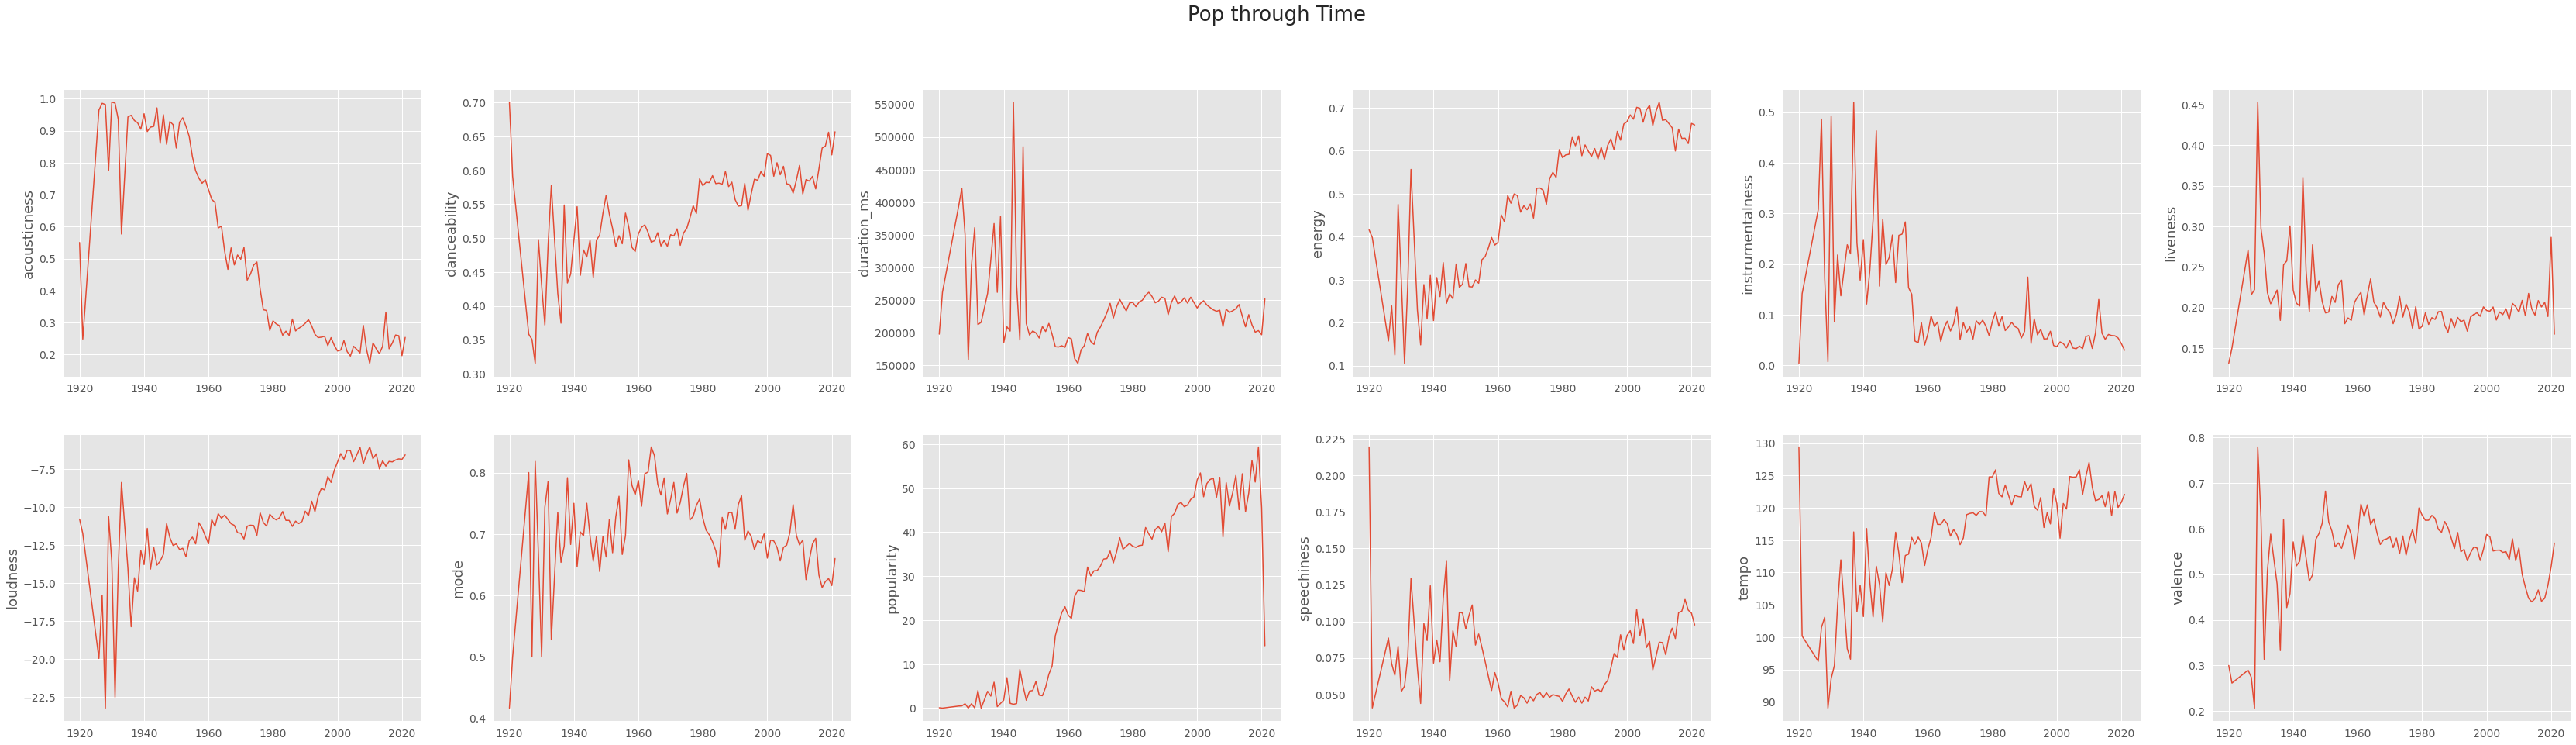

In [ ]:
pop = pd.DataFrame(df_cont[df_cont["genres"] == "pop"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Pop through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(pop["year"],pop[pop.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(pop.columns[i],fontsize = 18)
  
fig.show()

### **Metal over time**
The interesting changes of metal over time are about: <br>


1.   Acousticness: According to data, acousticness of metal songs has been decreased after 1970~. <br>
2.   Popularity: Most popular metal songs was produced between 1960-2010. 
3.   Energy: Energy of metal songs are mostly increasing over time.
4.   Loudness: The loudness of metal songs has increased significantly after 1960.

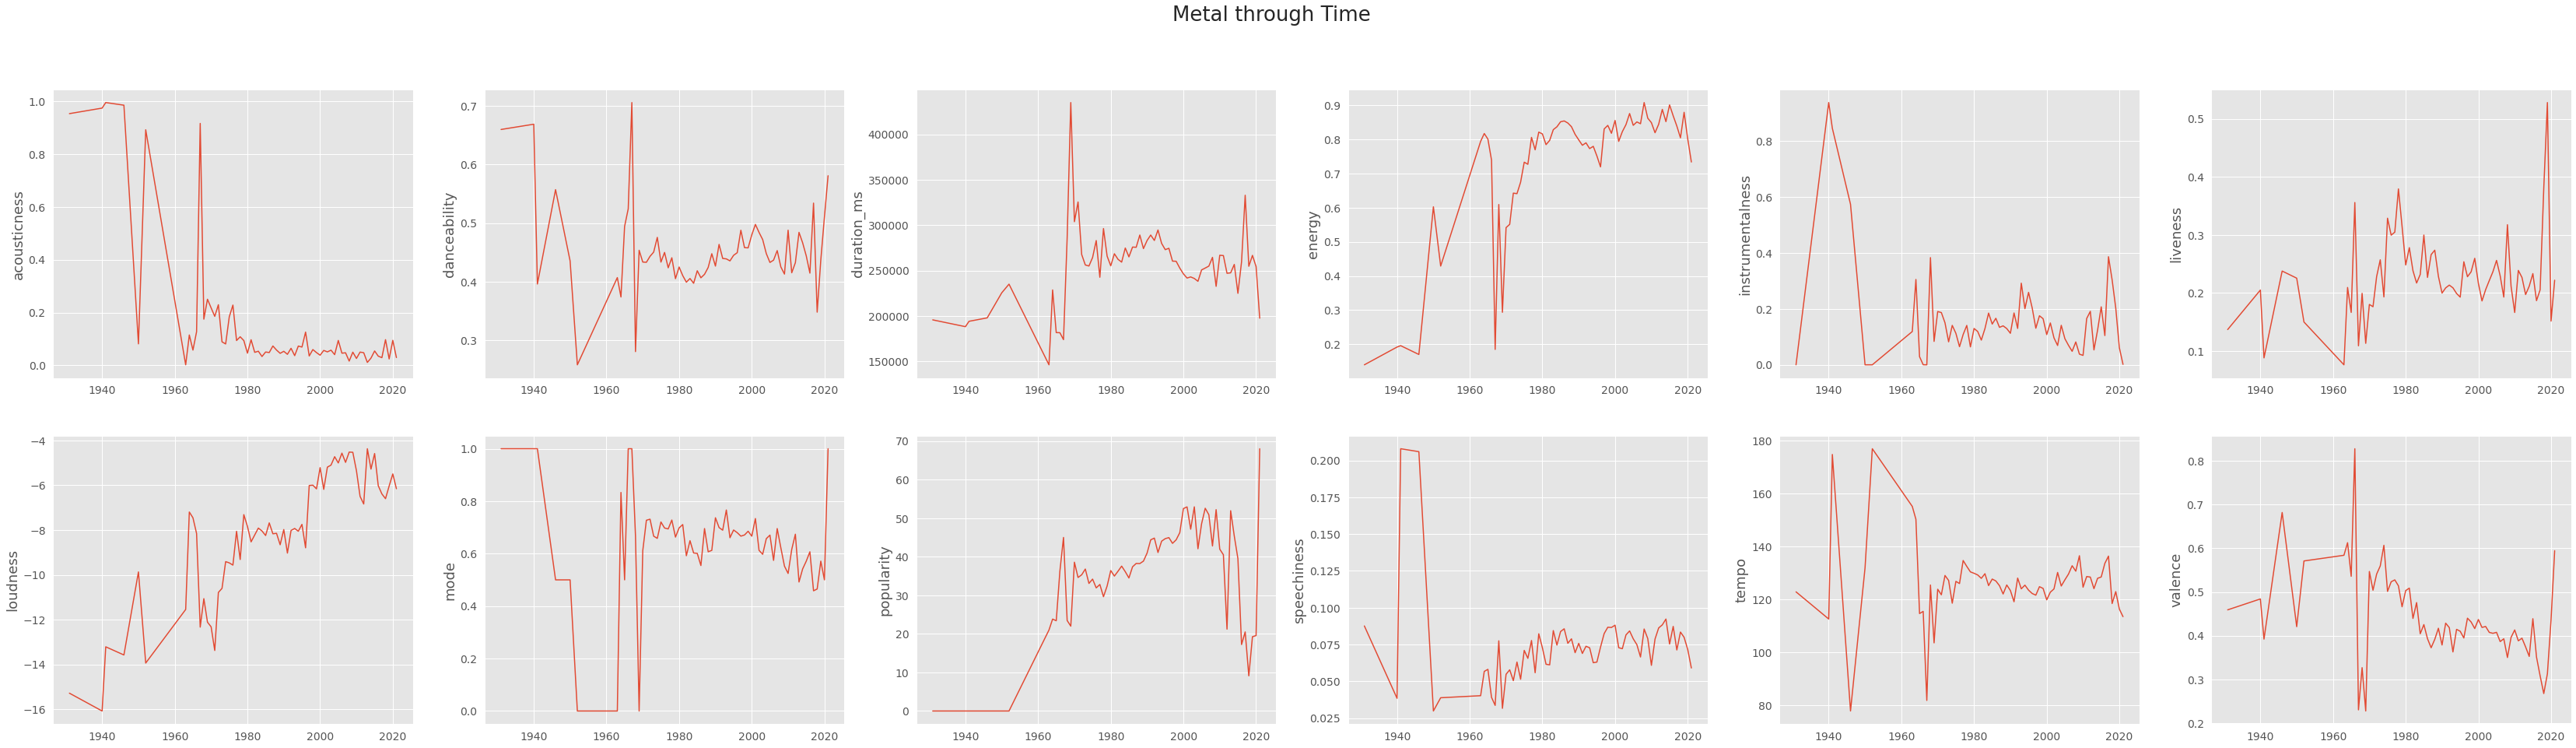

In [ ]:
metal = pd.DataFrame(df_cont[df_cont["genres"] == "metal"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Metal through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(metal["year"],metal[metal.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(metal.columns[i],fontsize = 18)
  
fig.show()

### **Blues over time**
The interesting changes of blues over time are about: <br>


1.   Acousticness: According to data, acousticness of blues songs has been decreased after 1960~. <br>
2.   Popularity: Most popular blues songs was created between 1960-2010. Very new blues songs and very old blues songs are not liked that much.
3.   Duration of blues songs: Duration of blues songs are mostly increasing over time.
4.   Energy: Energy of blues songs is mostly increasing over time.

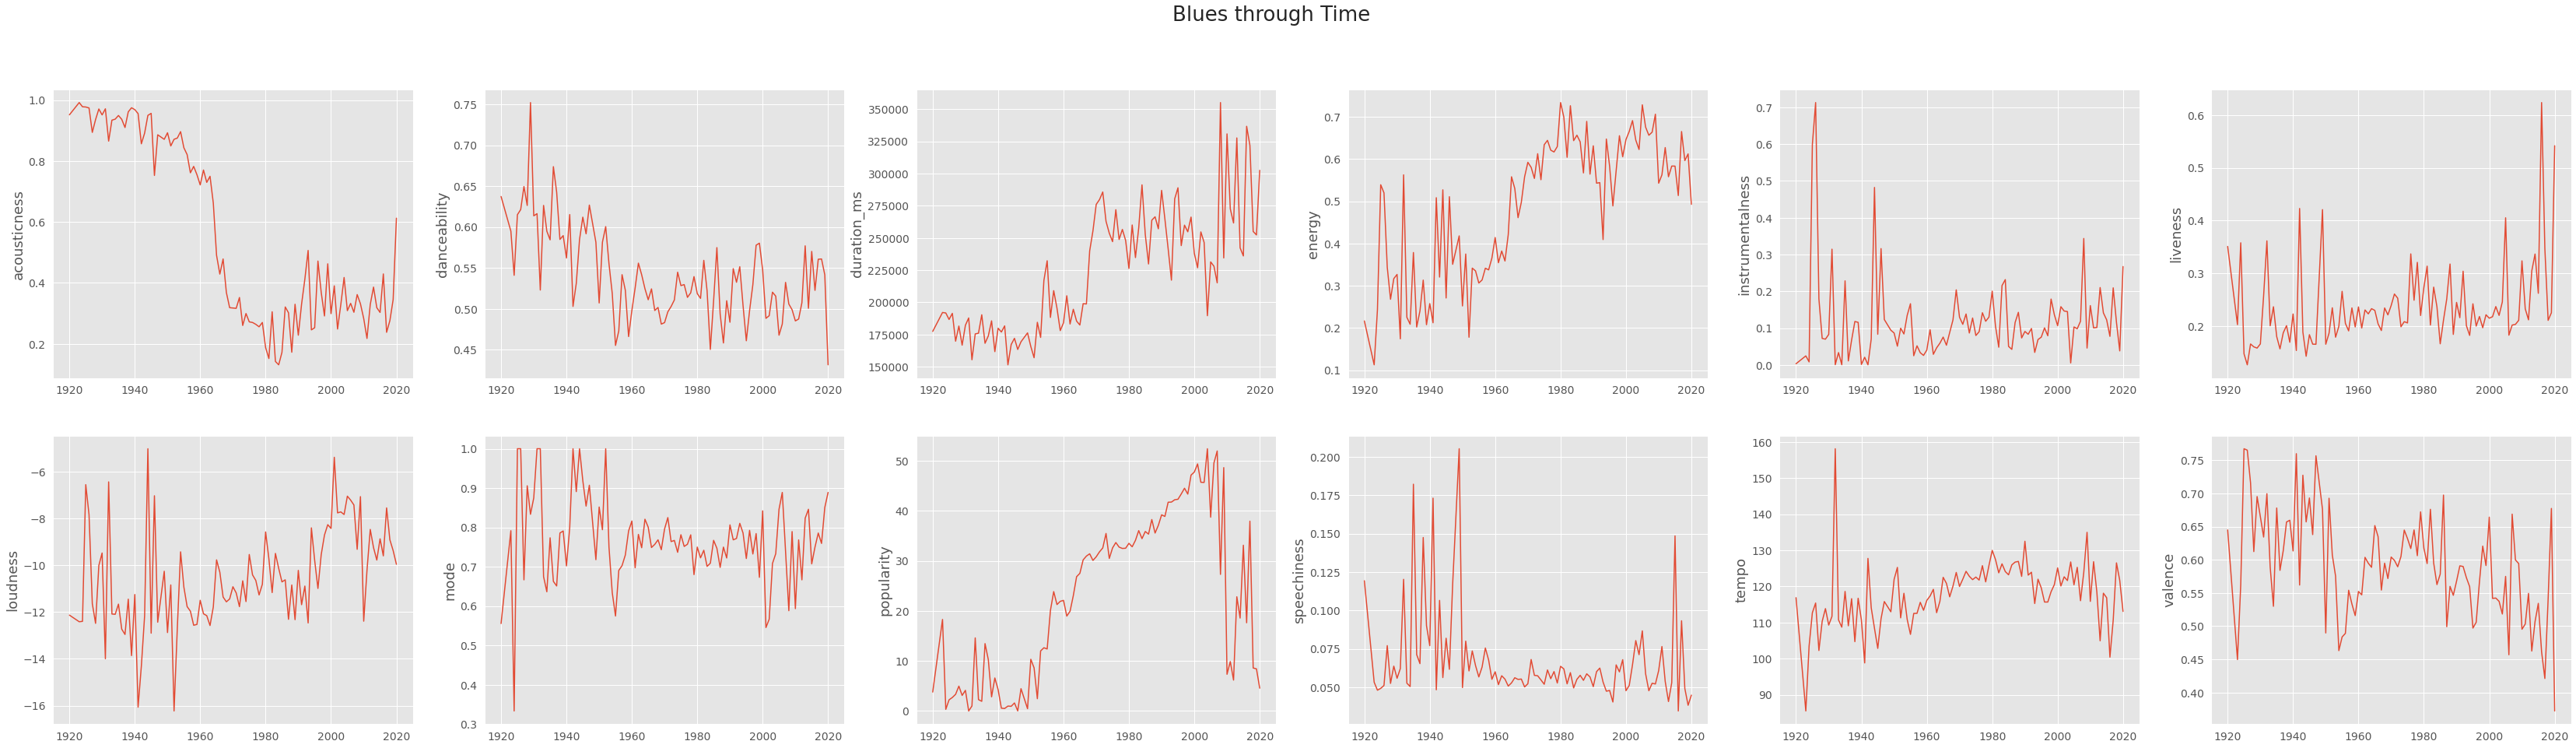

In [ ]:
blues = pd.DataFrame(df_cont[df_cont["genres"] == "blues"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Blues through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(blues["year"],blues[blues.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(blues.columns[i],fontsize = 18)

fig.show()

### **Rock over time**
The interesting changes of rock over time are about: <br>


1.   Acousticness: According to data, acousticness of rock songs has been decreased after 1960~. <br>
2.   Popularity: When we look at the chart, we can observe that popular rock songs were produced after 1950.

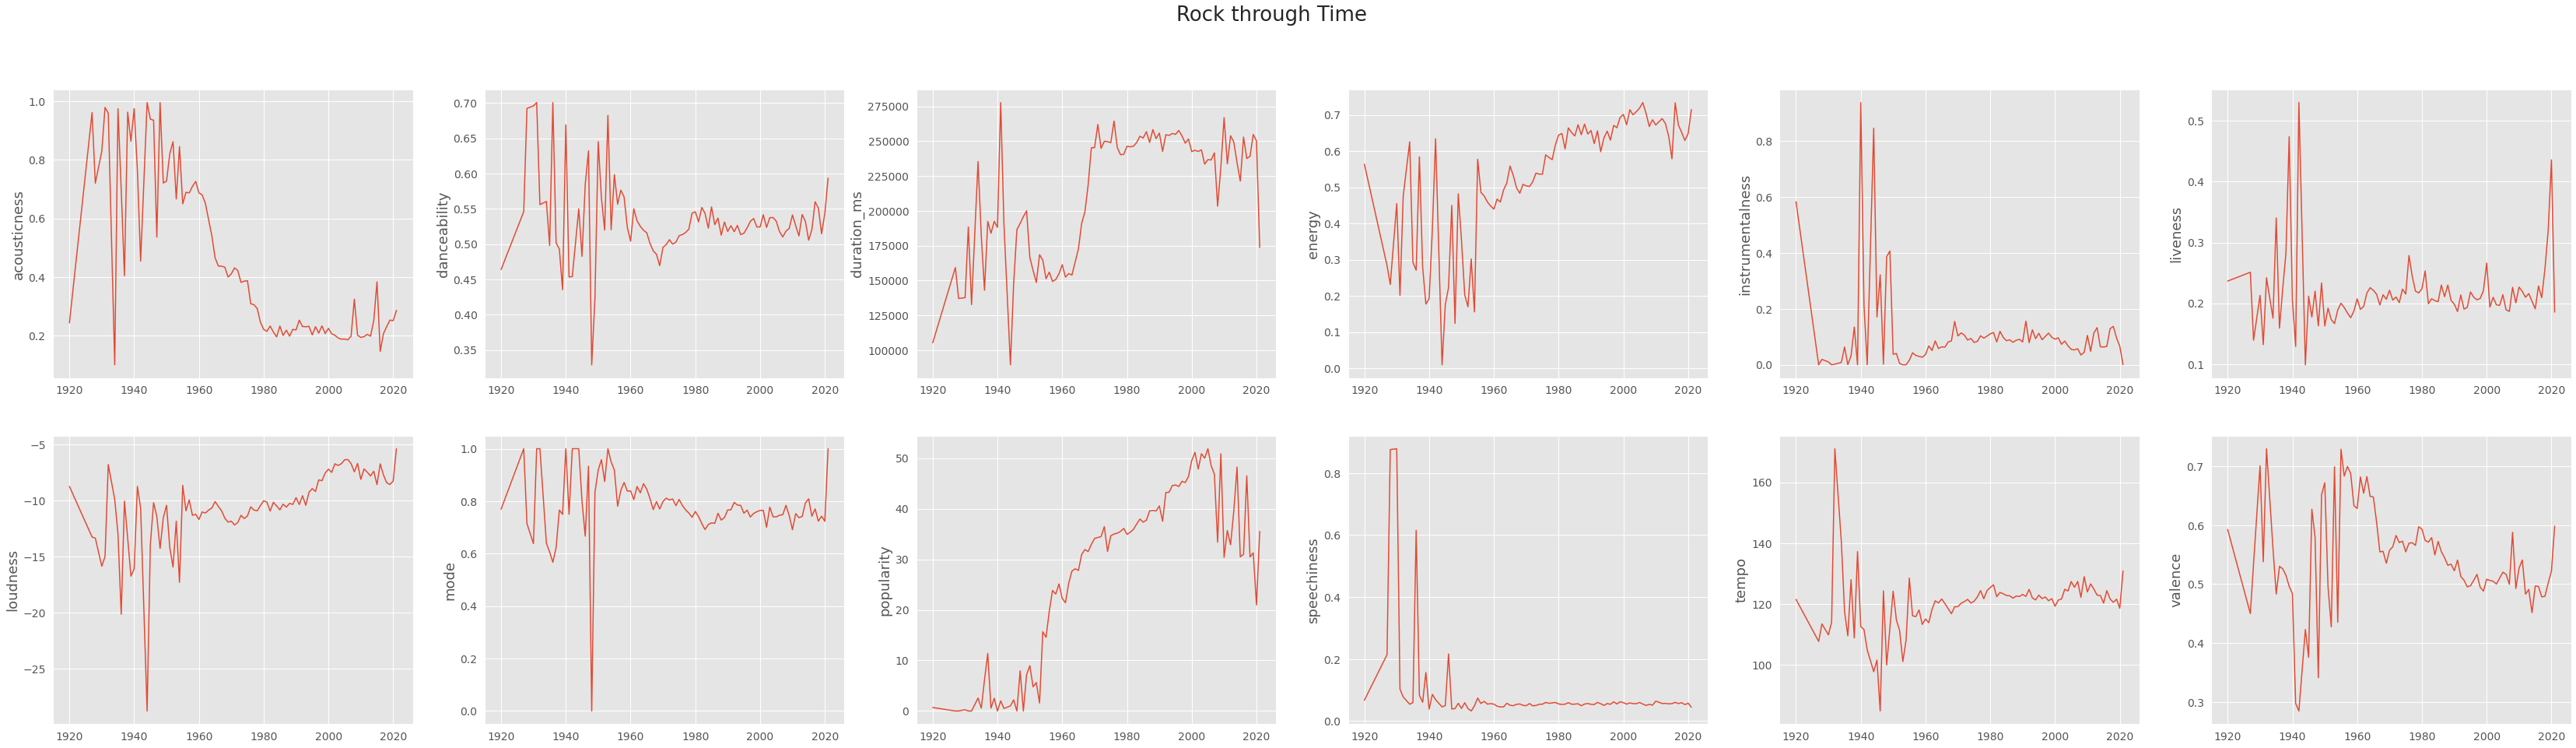

In [ ]:
rock = pd.DataFrame(df_cont[df_cont["genres"] == "rock"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Rock through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(rock["year"],rock[rock.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(rock.columns[i],fontsize = 18)
  
fig.show()

### **Hip-Hop over time**
The interesting changes of hip-hop over time are about: <br>


1.   Loudness: When we examine the songs of the hiphop genre, we can say that the loudness levels of these songs have increased over the years after 2000. <br>
2.   Popularity: We can say that the popularity of newly produced hip-hop songs has increased.

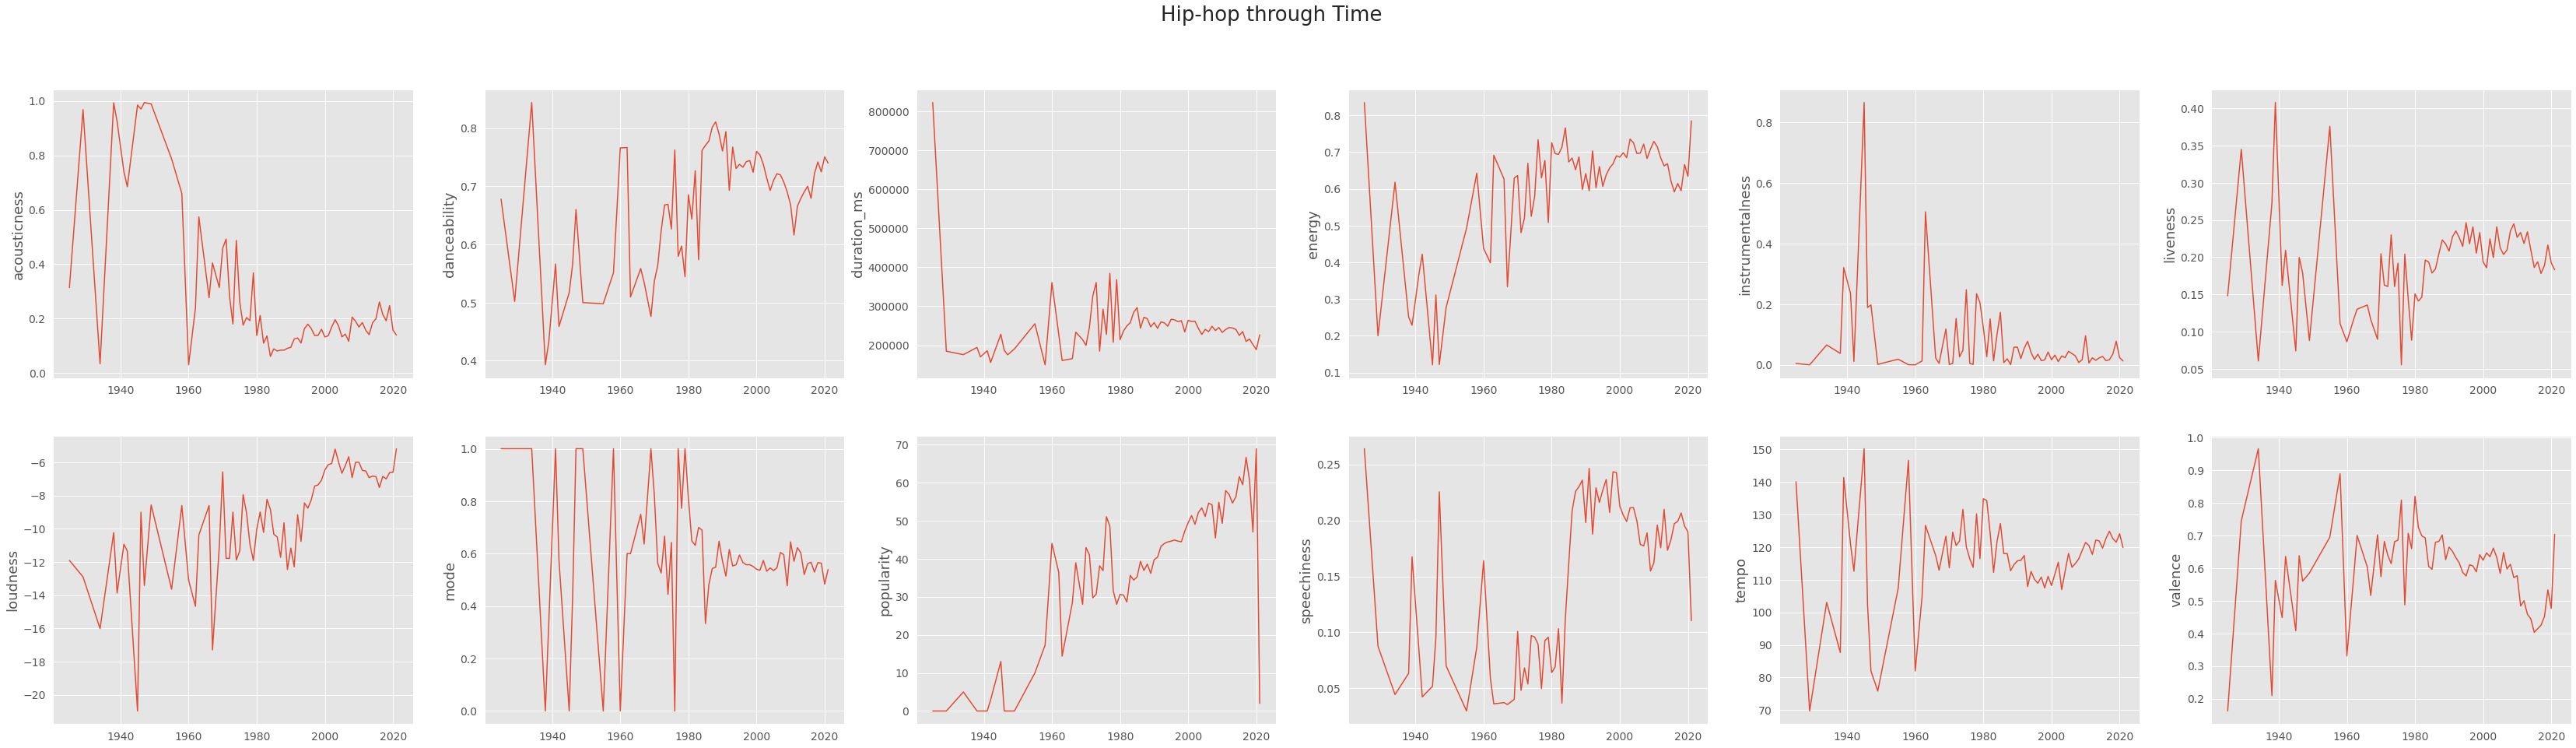

In [ ]:
hiphop = pd.DataFrame(df_cont[df_cont["genres"] == "hip hop"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Hip-hop through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(hiphop["year"],hiphop[hiphop.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(hiphop.columns[i],fontsize = 18)
  
fig.show()

### **Jazz over time**
The interesting changes of jazz over time are about: <br>


1.   Loudness: According to data, loudness of jazz songs has been slightly increased over time. <br>
2.   Popularity: Most popular jazz songs was created between 1960-2010. Very old and very new jazz songs are not very popular.

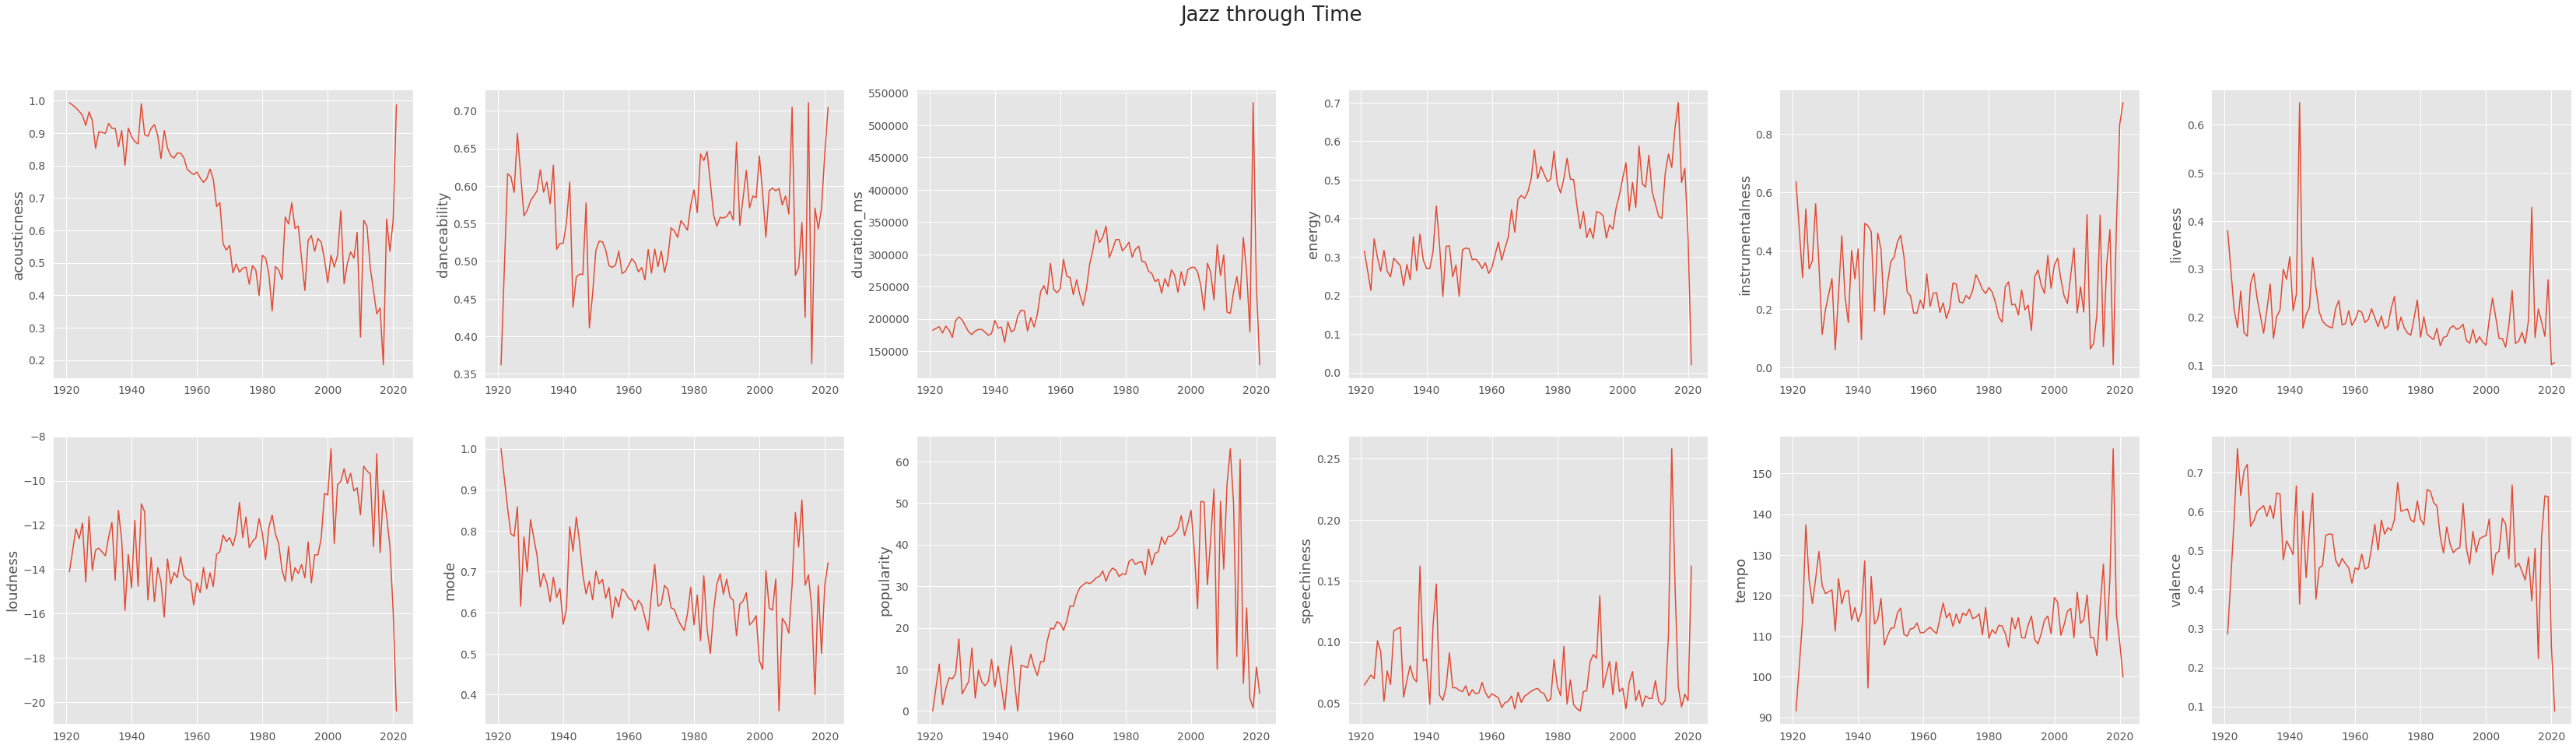

In [ ]:
jazz = pd.DataFrame(df_cont[df_cont["genres"] == "jazz"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Jazz through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(jazz["year"],jazz[jazz.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(jazz.columns[i],fontsize = 18)
  
fig.show()

### **Classical over time**
The interesting changes of classical over time are about: <br>


1.   Tempo: There has been an increase in the tempo of calssical songs produced after 1960. <br>
2.   Popularity: Most popular classical songs was created between 1960-2010. Especially old classical songs are not popular at all.

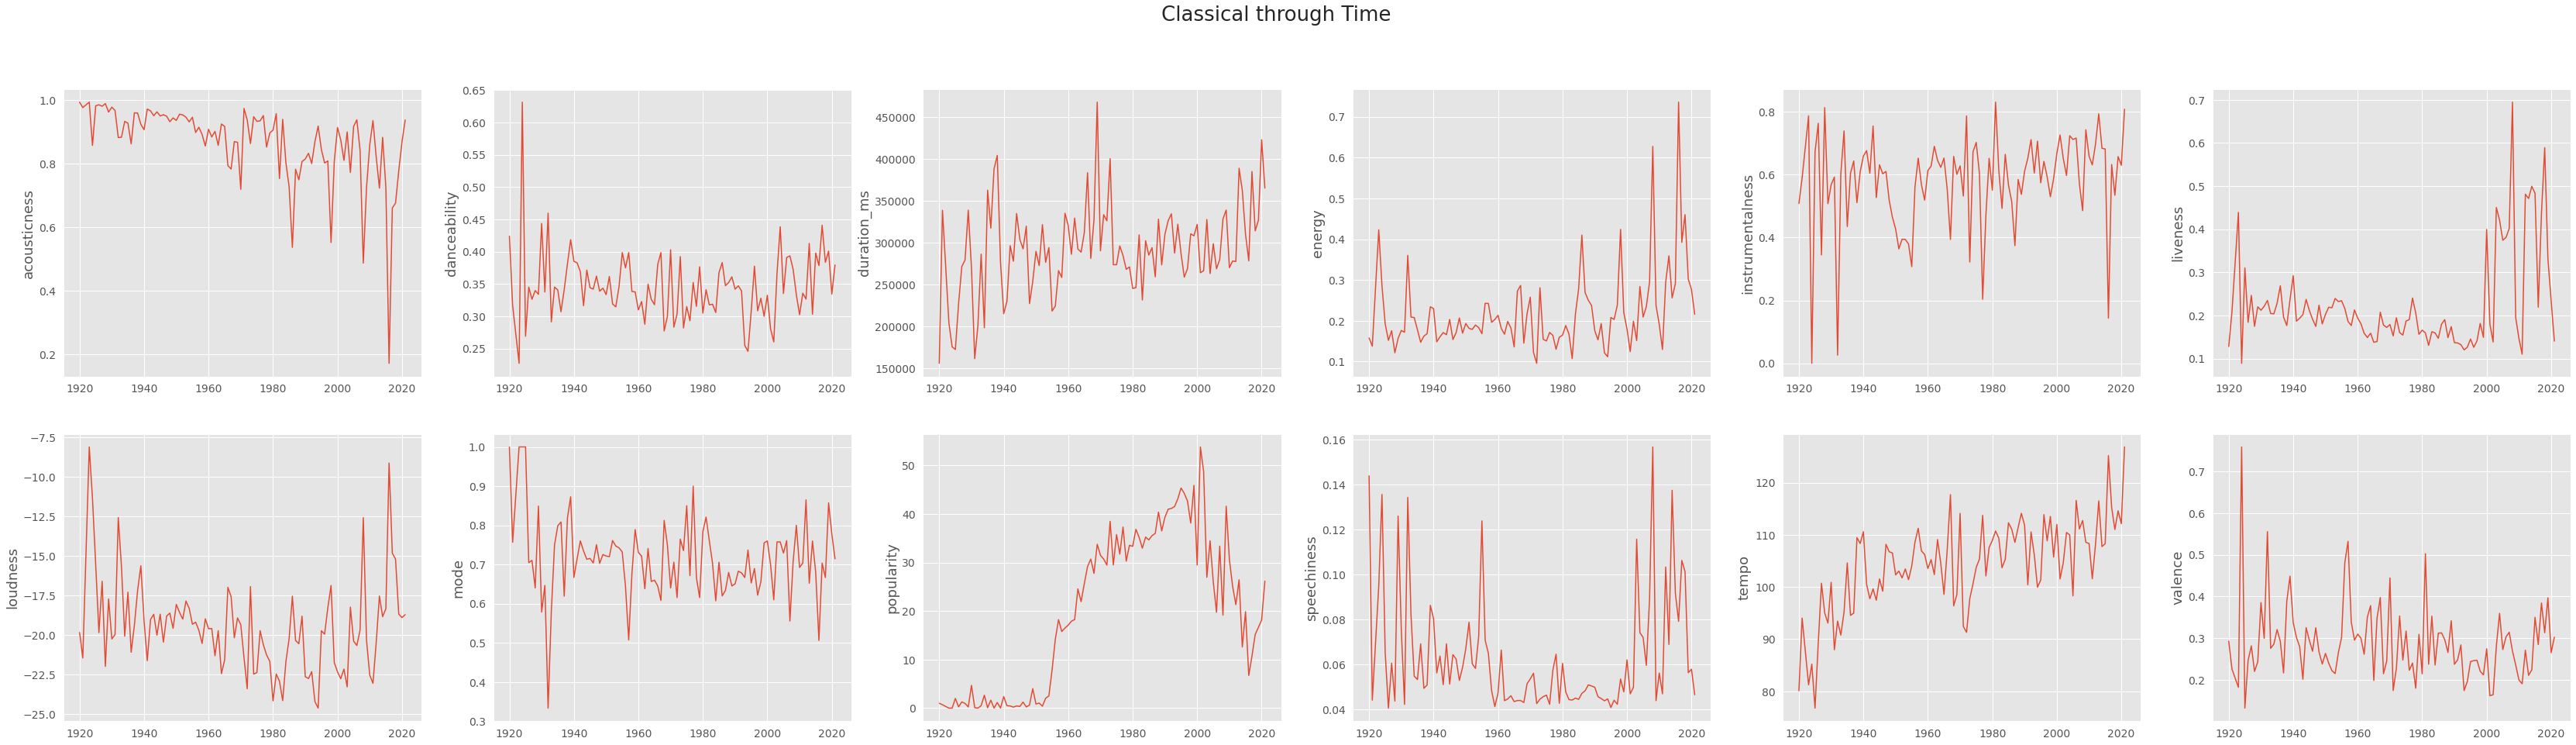

In [ ]:
classical = pd.DataFrame(df_cont[df_cont["genres"] == "classical"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Classical through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(classical["year"],classical[classical.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(classical.columns[i],fontsize = 18)
  
fig.show()

### **Funk over time**
The interesting changes of funk over time are about: <br>


1.   Acousticness: According to data, acousticness of funk songs has been decreased after 1950~. <br>
2.   Popularity: Most popular blues songs was created between 1960-2010. 
3.   Energy: Energy of funk songs are mostly increasing over time.
4.   Danceability: The danceability of funk songs has increased significantly over time.
5.   Loudness: The loudness of funk songs has increased significantly after 1960.

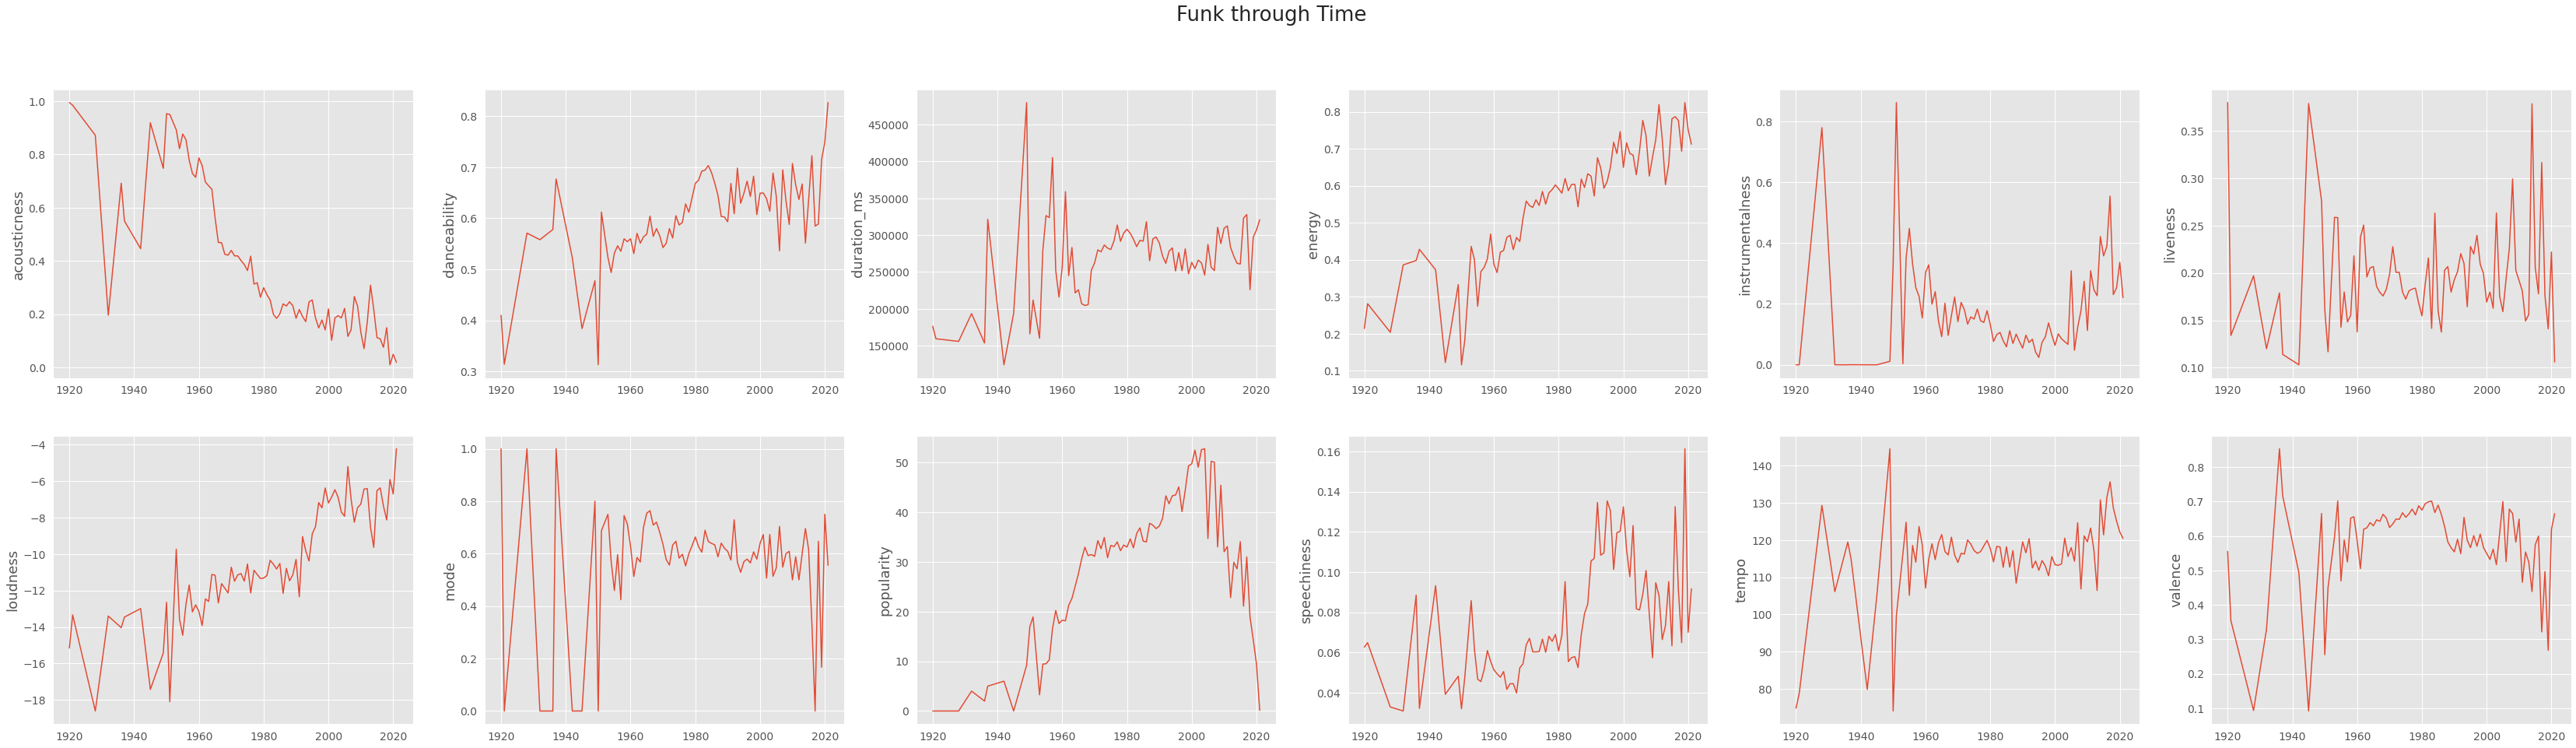

In [ ]:
funk = pd.DataFrame(df_cont[df_cont["genres"] == "funk"].groupby(by = "year").mean()).drop(columns = ["index","explicit","key"]).reset_index()
fig = plt.figure(figsize = (58,15))
plt.suptitle("Funk through Time",fontsize =26)
for i in range(1,13):
  ax = fig.add_subplot(2,6 , i)
  ax.plot(funk["year"],funk[funk.columns[i]])
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  ax.set_ylabel(funk.columns[i],fontsize = 18)
  
fig.show()

# **Hypothesis Testing for Popularity**

In [ ]:
import scipy.stats
from scipy import stats
from scipy import special

%matplotlib inline

## **Creating categories for Anova and Chi-square tests** <br>
Since we wanted to use every test in our hypothesis testing part, we had to categorize every value we used. We divided every variable into 5 equally-divided parts and categorized them.

In [ ]:
def loudnessanova(data):
  if 3.85 >= data > -8.92:
    return "Very high loudness" 
  elif -8.92 >= data > -21.69:
    return "High loudness"
  elif -21.69 >= data > -34.46:
    return "Mediumly loud"
  elif -34.46 >= data > -47.23:
    return "Low loudness"
  else:
    return "Quiet"
def danceabilityanova(data):
  if 0 <= data < 0.2:
    return "Least danceable" 
  elif 0.2 <= data < 0.4:
    return "Less danceable"
  elif 0.4 <= data < 0.6:
    return "Mid danceable"
  elif 0.6 <= data < 0.8:
    return "More danceable"
  else:
    return "Most danceable"

def livenessanova(data):
  if 1 >= data > 0.8:
    return "Very high liveness" 
  elif 0.8>= data > 0.6:
    return "High liveness"
  elif 0.6 >= data >0.4:
    return "Mediumly lived"
  elif 0.4 >= data > 0.2:
    return "Low liveness"
  else:
    return "Very low liveness"

def tempoanova(data):
  if 0 <= data < 49:
    return "very little paced" 
  elif 49 <= data < 98:
    return "slow paced"
  elif 98 <= data < 147:
    return "mid paced"
  elif 147 <= data < 196:
    return "very paced"
  else:
    return "most paced"

def valenceanova(data):
  if 0 <= data < 0.2:
    return "Least valence" 
  elif 0.2 <= data < 0.4:
    return "Less valence"
  elif 0.4 <= data < 0.6:
    return "Mid valence"
  elif 0.6 <= data < 0.8:
    return "More valence"
  else:
    return "Most valence"

def speechinessanova(data):
  if 0 <= data < 0.2:
    return "Least words" 
  elif 0.2 <= data < 0.4:
    return "Less words"
  elif 0.4 <= data < 0.6:
    return "Mid words"
  elif 0.6 <= data < 0.8:
    return "More words"
  else:
    return "Most words"


def energyanova(data):
  if 0 <= data < 0.2:
    return "Least energetic" 
  elif 0.2 <= data < 0.4:
    return "Less energetic"
  elif 0.4 <= data < 0.6:
    return "Mid energetic"
  elif 0.6 <= data < 0.8:
    return "More energetic"
  else:
    return "Most energetic"


def acousticnessanova(data):
  if 0 <= data < 0.2:
    return "Least acoustic" 
  elif 0.2 <= data < 0.4:
    return "Less acoustic"
  elif 0.4 <= data < 0.6:
    return "Mid acoustic"
  elif 0.6 <= data < 0.8:
    return "More acoustic"
  else:
    return "Most acoustic"

anovaParser = data_file.copy()
anovaParser["loudness"] = anovaParser["loudness"].apply(loudnessanova)
anovaParser["acousticness"] = anovaParser["acousticness"].apply(acousticnessanova)
anovaParser["energy"] = anovaParser["energy"].apply(energyanova)
anovaParser["valence"] = anovaParser["valence"].apply(valenceanova)
anovaParser["speechiness"] = anovaParser["speechiness"].apply(speechinessanova)
anovaParser["tempo"] = anovaParser["tempo"].apply(tempoanova)
anovaParser["liveness"] = anovaParser["liveness"].apply(livenessanova)
anovaParser["danceability"] = anovaParser["danceability"].apply(danceabilityanova)

chiParser = anovaParser.copy()

def popularity(data):
  if 100 >= data > 80:
    return "Very Popular"
  elif 80 >= data > 60:
    return "Popular"
  elif 60 >= data > 40:
    return "Mediumly Popular"
  elif 40 >= data > 20:
    return "Low popularity"
  else:
    return "Not popular"
chiParser["popularity"] = chiParser["popularity"].apply(popularity)

## **Hypothesis for Loudness and analysis of the hypothesis**

Since we want to use Loudness in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of loudness with popularity. That is why we are going to test if popularity depends on loudness or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on loudness.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on loudness.

We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and loudness are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and loudness are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.3371, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.35, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.24, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between loudness and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Loudness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["loudness"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["loudness"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["loudness"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  0.337194109288641 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  0.35008003256624043 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  0.24782144191372946 
	P value: 0.0


### **T-Test of effect of loudness to popularity** <br>

Since we already said that loudness and popularity are linearly correlated, we need to check loudness affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Loudness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Loudness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that loudness affects popularity. <br> <br>

Also, t-test statistics shows that if loudness increases, popularity decreases since it is negative.








In [ ]:
## T-TEST
stats.ttest_ind(data_file["loudness"],data_file["popularity"])

Ttest_indResult(statistic=-691.8541196962159, pvalue=0.0)

### **2 Parted T-Test of effect: Loudness and Popularity** <br>
We already used T-test and decided that loudness affects popularity. However, we wanted to see that if we divide loudness to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary loudness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary loudness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary loudness affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that loud songs have more popularity than not loud songs, when we divide into two groups. <br>
However, it has different results than normal t-test. We can say that it is dangerous to conclude greater & less popularity in this partition. One should see the difference between partitioning and using numerical values.



In [ ]:
## 2 - piece T-Test
def loudnotLoud(data):
  if 3.85 >= data > -28.075:
    return "Loud" 
  else:
    return "Not loud"


loudNotLoud = data_file.copy()
loudNotLoud["loudness"] = data_file["loudness"].apply(loudnotLoud)

stats.ttest_ind( loudNotLoud[loudNotLoud["loudness"] == "Loud"]["popularity"],loudNotLoud[loudNotLoud["loudness"] == "Not loud"]["popularity"], equal_var=False)

Ttest_indResult(statistic=15.918644213366324, pvalue=6.516844288801301e-54)

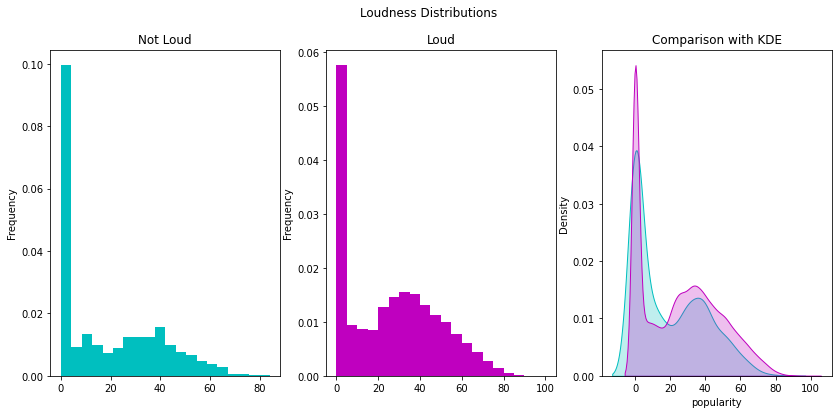

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
notL = loudNotLoud[loudNotLoud["loudness"] == "Not loud"]["popularity"]
isL = loudNotLoud[loudNotLoud["loudness"] == "Loud"]["popularity"]
notL.plot(kind="hist", ax=ax[0], bins=20, label="Not Loud", color="c", density=True)
ax[0].set_title("Not Loud")

isL.plot(kind="hist", ax=ax[1], bins=20, label="Loud", color="m", density=True)
ax[1].set_title("Loud")

sn.kdeplot(notL, shade=True, label="Not Loud", ax=ax[2], color="c")
sn.kdeplot(isL, shade=True, label="Loud", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Loudness Distributions")
plt.show()

### **ANOVA Test for Loudness and Popularity** <br>
We wanted to also see that if we parse the loudness into 5 parts, if loudness will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized loudness into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized loudness into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of loudness affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that Loudness affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["loudness"] == "Very high loudness"]["popularity"],anovaParser[anovaParser["loudness"] == "High loudness"]["popularity"], anovaParser[anovaParser["loudness"] == "Mediumly loud"]["popularity"], anovaParser[anovaParser["loudness"] == "Low loudness"]["popularity"],anovaParser[anovaParser["loudness"] == "Quiet"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)

F value: 4675.70377976234 
P value: 0.0


### **Chi Square test for Loudness and Popularity**
Until now, we tested loudness & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for loudness & popularity relationship, in which popularity uses same partition logic with ANOVA's loudness. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized loudness and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized loudness and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of loudness-popularity categories.


In [ ]:
# Crosstab of categorized loudness-popularity
crosstab_loudness = pd.crosstab(chiParser["loudness"], chiParser["popularity"])
crosstab_loudness

popularity          Low popularity  Mediumly Popular  ...  Popular  Very Popular
loudness                                              ...                       
High loudness                33405             15611  ...     2927            74
Low loudness                   103                86  ...       15             0
Mediumly loud                 1964               797  ...      121             1
Quiet                            1                 0  ...        2             0
Very high loudness           15805             18936  ...     8526           399

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized loudness and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, loudness and popularity will be dependent. <br>


In [ ]:
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_loudness)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 19141.514296259164 
P value:  0.0


### **All tests' results for Loudness and Popularity relationship**
Except linear correlation tests, we concluded that loudness affects popularity, they are dependent. The effection way may be differ when we categorize, for example all numerical T-Test show that if loudness increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Danceability and analysis of the hypothesis**

Since we want to use danceability in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of danceability with popularity. That is why we are going to test if popularity depends on Danceability or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on danceability.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on danceability
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and danceability are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and danceability are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.1237, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.10, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.6914, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between danceability and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Loudness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["danceability"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["danceability"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["danceability"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  0.12374580245907983 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  0.1000338255890125 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  0.0691437474714262 
	P value: 0.0


### **T-Test of effect of danceability to popularity** <br>

Since we already said that danceability and popularity are linearly correlated, we need to check danceability affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: danceability does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: danceability affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that danceability affects popularity. <br> <br>

Also, t-test statistics shows that if danceability increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["danceability"],data_file["popularity"])

Ttest_indResult(statistic=-480.2801526505774, pvalue=0.0)

### **2 Parted T-Test of effect: danceability and Popularity** <br>
We already used T-test and decided that danceability affects popularity. However, we wanted to see that if we divide danceability to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary danceability does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary danceability affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary danceability affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that danceable songs have more popularity than not danceable songs, when we divide into two groups. <br>
However, it has different results than normal t-test. We can say that it is dangerous to conclude greater & less popularity in this partition. One should see the difference between partitioning and using numerical values.



In [ ]:
# 2 Parted T-test
def danceable_or_not(data):
  if 0.0 <= data < 0.5:
    return "Not Danceable" 
  else:
    return "Danceable"

loudNotLoud["danceability"] = data_file["danceability"].apply(danceable_or_not)

stats.ttest_ind( loudNotLoud[loudNotLoud["danceability"] == "Danceable"]["popularity"],loudNotLoud[loudNotLoud["danceability"] == "Not Danceable"]["popularity"], equal_var=False)

Ttest_indResult(statistic=42.429954355913004, pvalue=0.0)

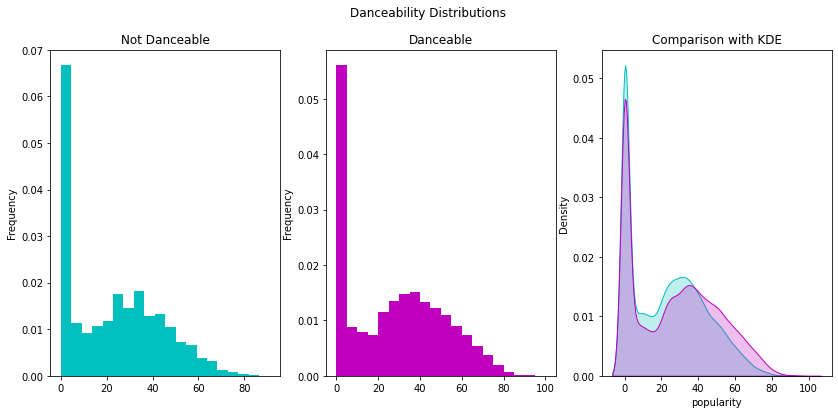

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
notD = loudNotLoud[loudNotLoud["danceability"] == "Not Danceable"]["popularity"]
isD = loudNotLoud[loudNotLoud["danceability"] == "Danceable"]["popularity"]
notD.plot(kind="hist", ax=ax[0], bins=20, label="Not Danceable", color="c", density=True)
ax[0].set_title("Not Danceable")

isD.plot(kind="hist", ax=ax[1], bins=20, label="Danceable", color="m", density=True)
ax[1].set_title("Danceable")

sn.kdeplot(notD, shade=True, label="Not Danceable", ax=ax[2], color="c")
sn.kdeplot(isD, shade=True, label="Danceable", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Danceability Distributions")
plt.show()

### **ANOVA Test for danceability and Popularity** <br>
We wanted to also see that if we parse the danceability into 5 parts, if danceability will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized danceability into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized danceability into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of danceability affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that danceability affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["danceability"] == "Most danceable"]["popularity"],anovaParser[anovaParser["danceability"] == "More danceable"]["popularity"], anovaParser[anovaParser["danceability"] == "Mid danceable"]["popularity"], anovaParser[anovaParser["danceability"] == "Less danceable"]["popularity"],anovaParser[anovaParser["danceability"] == "Least danceable"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 734.3473076453662 
P value: 0.0


### **Chi Square test for Danceability and Popularity**
Until now, we tested danceability & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for danceability & popularity relationship, in which popularity uses same partition logic with ANOVA's danceability. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized danceability and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized danceability and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of danceability-popularity categories.


In [ ]:
# Crosstab of categorized danceability-popularity
crosstab_danceability = pd.crosstab(chiParser["danceability"], chiParser["popularity"])
crosstab_danceability

popularity       Low popularity  Mediumly Popular  ...  Popular  Very Popular
danceability                                       ...                       
Least danceable            1762               861  ...      153             1
Less danceable            10721              5484  ...     1005            25
Mid danceable             20935             13638  ...     3984            92
More danceable            15390             12583  ...     4998           258
Most danceable             2470              2864  ...     1451            98

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized danceability and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, danceability and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_danceability)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 4422.185962965145 
P value:  0.0


### **All tests' results for Danceability and Popularity relationship**
Except linear correlation tests, we concluded that danceability affects popularity, they are dependent. The effection way may be differ when we categorize, for example all numerical T-Test show that if danceability increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Liveness and analysis of the hypothesis**

Since we want to use liveness in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of liveness with popularity. That is why we are going to test if popularity depends on liveness or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on liveness.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on liveness
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and liveness are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and liveness are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.078959, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.1070, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.07266, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between liveness and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Loudness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["liveness"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["liveness"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["liveness"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  -0.07895911703464657 
	P value:  3.6046633291861957e-239 
Spearmanr linear correlation analysis: 
	Correlation:  -0.1070010969392933 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  -0.07266190285900881 
	P value: 0.0


### **T-Test of effect of liveness to popularity** <br>

Since we already said that liveness and popularity are linearly correlated, we need to check liveness affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: liveness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: liveness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that liveness affects popularity. <br> <br>

Also, t-test statistics shows that if liveness increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["liveness"],data_file["popularity"])

Ttest_indResult(statistic=-486.4962249400403, pvalue=0.0)

### **2 Parted T-Test of effect: liveness and Popularity** <br>
We already used T-test and decided that liveness affects popularity. However, we wanted to see that if we divide liveness to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary liveness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary liveness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary liveness affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high liveness songs have more popularity than low liveness songs, when we divide into two groups. <br>
However, it has different results than normal t-test. We can say that it is dangerous to conclude greater & less popularity in this partition. One should see the difference between partitioning and using numerical values.



In [ ]:
## 2 Partition T-Test
def liveness_(data):
  if 0.0 <= data < 0.5:
    return "Low Liveness" 
  else:
    return "High Liveness"



loudNotLoud["liveness"] = data_file["liveness"].apply(liveness_)

stats.ttest_ind( loudNotLoud[loudNotLoud["liveness"] == "Low Liveness"]["popularity"],loudNotLoud[loudNotLoud["liveness"] == "High Liveness"]["popularity"], equal_var=False)

Ttest_indResult(statistic=21.38342237144687, pvalue=4.4629914514272034e-100)

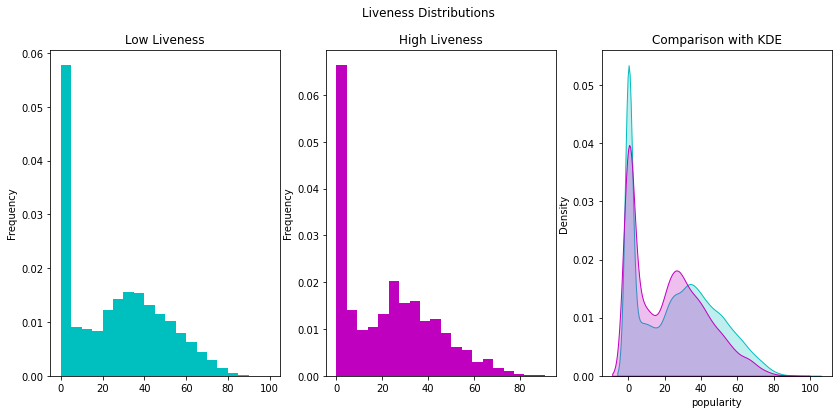

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
notliv = loudNotLoud[loudNotLoud["liveness"] == "Low Liveness"]["popularity"]
isliv= loudNotLoud[loudNotLoud["liveness"] == "High Liveness"]["popularity"]
notliv.plot(kind="hist", ax=ax[0], bins=20, label="Low Liveness", color="c", density=True)
ax[0].set_title("Low Liveness")

isliv.plot(kind="hist", ax=ax[1], bins=20, label="High Liveness", color="m", density=True)
ax[1].set_title("High Liveness")

sn.kdeplot(notliv, shade=True, label="Low Liveness", ax=ax[2], color="c")
sn.kdeplot(isliv, shade=True, label="High Liveness", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Liveness Distributions")
plt.show()

### **ANOVA Test for liveness and Popularity** <br>
We wanted to also see that if we parse the liveness into 5 parts, if liveness will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized liveness into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized liveness into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of liveness affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that liveness affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["liveness"] == "Very high liveness"]["popularity"],anovaParser[anovaParser["liveness"] == "High liveness"]["popularity"], anovaParser[anovaParser["liveness"] == "Mediumly lived"]["popularity"], anovaParser[anovaParser["liveness"] == "Low liveness"]["popularity"],anovaParser[anovaParser["liveness"] == "Very low liveness"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 228.88521976451662 
P value: 2.356209638078536e-196


### **Chi Square test for Liveness and Popularity**
Until now, we tested liveness & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for liveness & popularity relationship, in which popularity uses same partition logic with ANOVA's liveness. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized liveness and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized liveness and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of liveness-popularity categories.


In [ ]:
# Crosstab of categorized liveness-popularity
crosstab_liveness = pd.crosstab(chiParser["liveness"], chiParser["popularity"])
crosstab_liveness

popularity          Low popularity  Mediumly Popular  ...  Popular  Very Popular
liveness                                              ...                       
High liveness                 1817               925  ...      244            10
Low liveness                 11282              8083  ...     2486            88
Mediumly lived                2411              1567  ...      458            14
Very high liveness            1623               518  ...       89             0
Very low liveness            34145             24337  ...     8314           362

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized liveness and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, liveness and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_liveness)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 1296.3410043376173 
P value:  3.0706494179892882e-266


### **All tests' results for Liveness and Popularity relationship**
Except linear correlation tests, we concluded that liveness affects popularity, they are dependent. The effection way may be differ when we categorize, for example all numerical T-Test show that if liveness increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Tempo and analysis of the hypothesis**

Since we want to use tempo in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of tempo with popularity. That is why we are going to test if popularity depends on tempo or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on tempo.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on tempo
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and tempo are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and tempo are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.094984, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.093907, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.064417, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between tempo and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Loudness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["tempo"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["tempo"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["tempo"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  0.0949845772687947 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  0.0939074175331141 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  0.06441788887781306 
	P value: 0.0


### **T-Test of effect of tempo to popularity** <br>

Since we already said that tempo and popularity are linearly correlated, we need to check tempo affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: tempo does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: tempo affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that tempo affects popularity. <br> <br>

Also, t-test statistics shows that if tempo increases, popularity increases since it is positive.








In [ ]:
## T-Test
stats.ttest_ind(data_file["tempo"],data_file["popularity"])

Ttest_indResult(statistic=1021.4169939672798, pvalue=0.0)

### **2 Parted T-Test of effect: tempo and Popularity** <br>
We already used T-test and decided that tempo affects popularity. However, we wanted to see that if we divide tempo to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary tempo does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary tempo affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary tempo affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high tempo songs have more popularity than low tempo songs, when we divide into two groups. <br>




In [ ]:
## 2 - Partition T-Test
def tempo_(data):
  if 0.0 <= data < 122:
    return "Slow Paced" 
  else:
    return "Very Paced"

loudNotLoud["tempo"] = data_file["tempo"].apply(tempo_)

stats.ttest_ind( loudNotLoud[loudNotLoud["tempo"] == "Very Paced"]["popularity"],loudNotLoud[loudNotLoud["tempo"] == "Slow Paced"]["popularity"], equal_var=False)

Ttest_indResult(statistic=17.831158964725752, pvalue=4.763501219412283e-71)

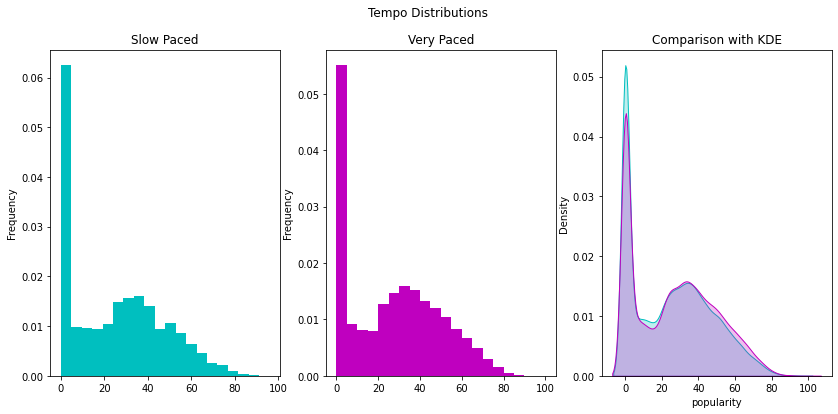

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
nott = loudNotLoud[loudNotLoud["tempo"] == "Slow Paced"]["popularity"]
ist = loudNotLoud[loudNotLoud["tempo"] == "Very Paced"]["popularity"]
nott.plot(kind="hist", ax=ax[0], bins=20, label="Slow Paced", color="c", density=True)
ax[0].set_title("Slow Paced")

ist.plot(kind="hist", ax=ax[1], bins=20, label="Very Paced", color="m", density=True)
ax[1].set_title("Very Paced")

sn.kdeplot(nott, shade=True, label="Slow Paced", ax=ax[2], color="c")
sn.kdeplot(ist, shade=True, label="Very Paced", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions")
plt.show()

### **ANOVA Test for Tempo and Popularity** <br>
We wanted to also see that if we parse the tempo into 5 parts, if tempo will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized tempo into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized tempo into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of tempo affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that tempo affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["tempo"] == "very little paced"]["popularity"],anovaParser[anovaParser["tempo"] == "slow paced"]["popularity"], anovaParser[anovaParser["tempo"] == "mid paced"]["popularity"], anovaParser[anovaParser["tempo"] == "very paced"]["popularity"],anovaParser[anovaParser["tempo"] == "most paced"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 380.82450536437767 
P value: 0.0


### **Chi Square test for Tempo and Popularity**
Until now, we tested tempo & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for tempo & popularity relationship, in which popularity uses same partition logic with ANOVA's tempo. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized tempo and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized tempo and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of tempo-popularity categories.


In [ ]:
# Crosstab of categorized liveness-popularity
crosstab_tempo = pd.crosstab(chiParser["tempo"], chiParser["popularity"])
crosstab_tempo

popularity         Low popularity  Mediumly Popular  ...  Popular  Very Popular
tempo                                                ...                       
mid paced                   29036             19144  ...     6303           269
most paced                    586               383  ...      104             2
slow paced                  13908              9763  ...     2997           125
very little paced              48                28  ...       27             1
very paced                   7700              6112  ...     2160            77

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized tempo and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, tempo and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_tempo)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 1707.8592580896777 
P value:  0.0


### **All tests' results for Tempo and Popularity relationship**
Except linear correlation tests, we concluded that tempo affects popularity, they are dependent.if Tempo increases popularity increases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Valence and analysis of the hypothesis**


Since we want to use valence in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of valence with popularity. That is why we are going to test if popularity depends on valence or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on valence.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on valence
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and valence are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and valence are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.06347, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.06503, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.04435, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between valence and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Loudness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["valence"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["valence"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["valence"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  0.06347111097004504 
	P value:  4.1392790441262084e-155 
Spearmanr linear correlation analysis: 
	Correlation:  0.06503622862665505 
	P value: 9.088823586765384e-163 
Kendalltau linear correlation analysis: 
	Correlation:  0.04435131429564469 
	P value: 4.8742361412829185e-161


### **T-Test of effect of valence to popularity** <br>

Since we already said that valence and popularity are linearly correlated, we need to check valence affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: valence does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: valence affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that valence affects popularity. <br> <br>

Also, t-test statistics shows that if valence increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["valence"],data_file["popularity"])

Ttest_indResult(statistic=-480.49398100993295, pvalue=0.0)

### **2 Parted T-Test of effect: valence and Popularity** <br>
We already used T-test and decided that valence affects popularity. However, we wanted to see that if we divide valence to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary valence does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary valence affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary valence affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high valence songs have less popularity than low valence songs, when we divide into two groups. <br>




In [ ]:
def valence_(data):
  if 0.0 <= data < 0.5:
    return "Low Valence" 
  else:
    return "High Valence"

loudNotLoud["valence"] = data_file["valence"].apply(valence_)

stats.ttest_ind( loudNotLoud[loudNotLoud["valence"] == "Low Valence"]["popularity"],loudNotLoud[loudNotLoud["valence"] == "High Valence"]["popularity"], equal_var=False)

Ttest_indResult(statistic=-13.391412222107675, pvalue=7.126592370377599e-41)

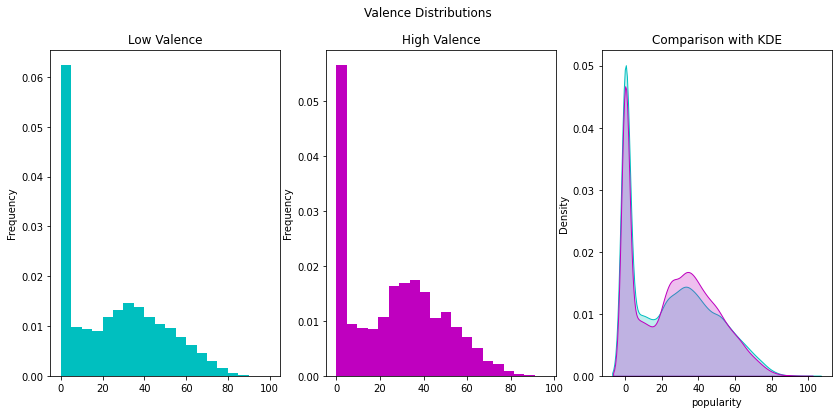

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
notv = loudNotLoud[loudNotLoud["valence"] == "Low Valence"]["popularity"]
isv = loudNotLoud[loudNotLoud["valence"] == "High Valence"]["popularity"]
notv.plot(kind="hist", ax=ax[0], bins=20, label="Low Valence", color="c", density=True)
ax[0].set_title("Low Valence")

isv.plot(kind="hist", ax=ax[1], bins=20, label="High Valence", color="m", density=True)
ax[1].set_title("High Valence")

sn.kdeplot(notv, shade=True, label="Low Valence", ax=ax[2], color="c")
sn.kdeplot(isv, shade=True, label="Danceable", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Valence Distributions")
plt.show()

### **ANOVA Test for Valence and Popularity** <br>
We wanted to also see that if we parse the valence into 5 parts, if valence will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized valence into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized valence into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of valence affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that valence affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["valence"] == "Most valence"]["popularity"],anovaParser[anovaParser["valence"] == "More valence"]["popularity"], anovaParser[anovaParser["valence"] == "Mid valence"]["popularity"], anovaParser[anovaParser["valence"] == "Less valence"]["popularity"],anovaParser[anovaParser["valence"] == "Least valence"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 273.28050321426224 
P value: 1.2828303444786427e-234


### **Chi Square test for Valence and Popularity**
Until now, we tested valence & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for valence & popularity relationship, in which popularity uses same partition logic with ANOVA's valence. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized valence and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized valence and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of valence-popularity categories.


In [ ]:
# Crosstab of categorized valence-popularity
crosstab_valence = pd.crosstab(chiParser["valence"], chiParser["popularity"])
crosstab_valence

popularity     Low popularity  Mediumly Popular  ...  Popular  Very Popular
valence                                          ...                       
Least valence            6502              4156  ...     1355            56
Less valence             9622              7287  ...     2738           116
Mid valence             11445              8185  ...     3084           132
More valence            12193              8362  ...     2633           116
Most valence            11516              7440  ...     1781            54

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized valence and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, valence and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_valence)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 2060.3125290870335 
P value:  0.0


### **All tests' results for Valence and Popularity relationship**
Except linear correlation tests, we concluded that valence affects popularity, they are dependent. The effection way may be differ when we categorize, for example all numerical T-Test show that if valence increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Speechiness and analysis of the hypothesis**


Since we want to use speechiness in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of speechiness with popularity. That is why we are going to test if popularity depends on speechiness or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on speechiness.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on speechiness
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and speechiness are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and speechiness are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.19532, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.17706, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.12359, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between speechiness and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Speechiness Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["speechiness"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["speechiness"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["speechiness"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  -0.1953289019648629 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  -0.17706151678603904 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  -0.12358731212234769 
	P value: 0.0


### **T-Test of effect of speechiness to popularity** <br>

Since we already said that speechiness and popularity are linearly correlated, we need to check speechiness affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: speechiness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: speechiness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that speechiness affects popularity. <br> <br>

Also, t-test statistics shows that if speechiness increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["speechiness"],data_file["popularity"])

Ttest_indResult(statistic=-488.5080334666895, pvalue=0.0)

### **2 Parted T-Test of effect: speechiness and Popularity** <br>
We already used T-test and decided that speechiness affects popularity. However, we wanted to see that if we divide speechiness to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary speechiness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary speechiness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary speechiness affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high speechiness songs have less popularity than low speechiness songs, when we divide into two groups. <br>




In [ ]:
def speechiness_(data):
  if 0.0 <= data < 0.5:
    return "Few Words" 
  else:
    return "Many Words"

loudNotLoud["speechiness"] = data_file["speechiness"].apply(speechiness_)

stats.ttest_ind( loudNotLoud[loudNotLoud["speechiness"] == "Many Words"]["popularity"],loudNotLoud[loudNotLoud["speechiness"] == "Few Words"]["popularity"], equal_var=False)

Ttest_indResult(statistic=-163.79249431586027, pvalue=0.0)

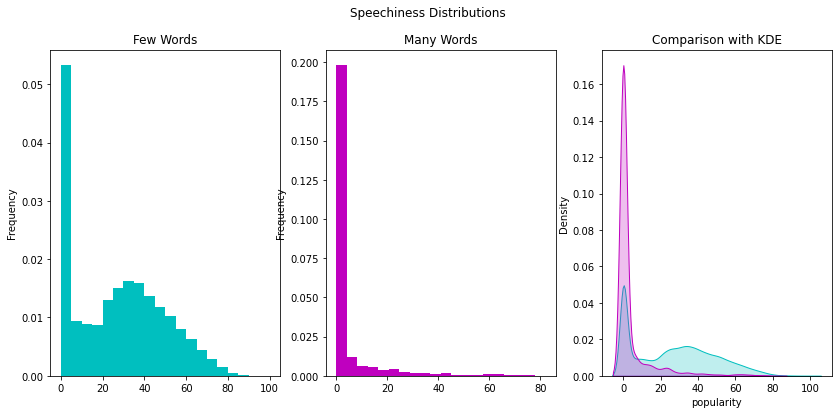

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
notw = loudNotLoud[loudNotLoud["speechiness"] == "Few Words"]["popularity"]
isw = loudNotLoud[loudNotLoud["speechiness"] == "Many Words"]["popularity"]
notw.plot(kind="hist", ax=ax[0], bins=20, label="Few Words", color="c", density=True)
ax[0].set_title("Few Words")

isw.plot(kind="hist", ax=ax[1], bins=20, label="Many Words", color="m", density=True)
ax[1].set_title("Many Words")

sn.kdeplot(notw, shade=True, label="Not Danceable", ax=ax[2], color="c")
sn.kdeplot(isw, shade=True, label="Danceable", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Speechiness Distributions")
plt.show()

### **ANOVA Test for Speechiness and Popularity** <br>
We wanted to also see that if we parse the speechiness into 5 parts, if speechiness will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized speechiness into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized speechiness into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of speechiness affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that speechiness affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["speechiness"] == "Least words"]["popularity"],anovaParser[anovaParser["speechiness"] == "Less words"]["popularity"], anovaParser[anovaParser["speechiness"] == "Mid words"]["popularity"], anovaParser[anovaParser["speechiness"] == "More words"]["popularity"],anovaParser[anovaParser["speechiness"] == "Most words"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 2175.667621437684 
P value: 0.0


### **Chi Square test for Speechiness and Popularity**
Until now, we tested speechiness & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for speechiness & popularity relationship, in which popularity uses same partition logic with ANOVA's speechiness. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized speechiness and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized speechiness and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of speechiness-popularity categories.


In [ ]:
# Crosstab of categorized speechiness-popularity
crosstab_speechiness = pd.crosstab(chiParser["speechiness"], chiParser["popularity"])
crosstab_speechiness

popularity   Low popularity  Mediumly Popular  ...  Popular  Very Popular
speechiness                                    ...                       
Least words           48747             32702  ...    10114           393
Less words             1911              2335  ...     1233            75
Mid words               356               331  ...      224             6
More words               54                30  ...       17             0
Most words              210                32  ...        3             0

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized speechiness and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, speechiness and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_speechiness)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 9384.588875735722 
P value:  0.0


### **All tests' results for Speechiness and Popularity relationship**
Except linear correlation tests, we concluded that speechiness affects popularity, they are dependent. T-Test show that if speechiness increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Energy and analysis of the hypothesis**


Since we want to use energy in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of energy with popularity. That is why we are going to test if popularity depends on energy or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on energy.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on energy
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and energy are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and energy are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.32893, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.33971, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is 0.23519, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between energy and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Energy Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["energy"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["energy"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["energy"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  0.32893861604082075 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  0.33971002582528853 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  0.2351980917013557 
	P value: 0.0


### **T-Test of effect of energy to popularity** <br>

Since we already said that energy and popularity are linearly correlated, we need to check energy affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: energy does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: energy affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that energy affects popularity. <br> <br>

Also, t-test statistics shows that if energy increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["energy"],data_file["popularity"])

Ttest_indResult(statistic=-481.2899858990866, pvalue=0.0)

### **2 Parted T-Test of effect: energy and Popularity** <br>
We already used T-test and decided that energy affects popularity. However, we wanted to see that if we divide energy to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary energy does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary energy affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary energy affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high energy songs have more popularity than low energy songs, when we divide into two groups. <br>
However, it has different results than normal t-test. We can say that it is dangerous to conclude greater & less popularity in this partition. One should see the difference between partitioning and using numerical values.



In [ ]:
## 2 - Partition T-Test
def energetic_or_not(data):
  if 0.0 <= data < 0.5:
    return "Not Energetic" 
  else:
    return "Energetic"

loudNotLoud["energy"] = data_file["energy"].apply(energetic_or_not)

stats.ttest_ind( loudNotLoud[loudNotLoud["energy"] == "Energetic"]["popularity"],loudNotLoud[loudNotLoud["energy"] == "Not Energetic"]["popularity"], equal_var=False)

Ttest_indResult(statistic=138.84981807620207, pvalue=0.0)

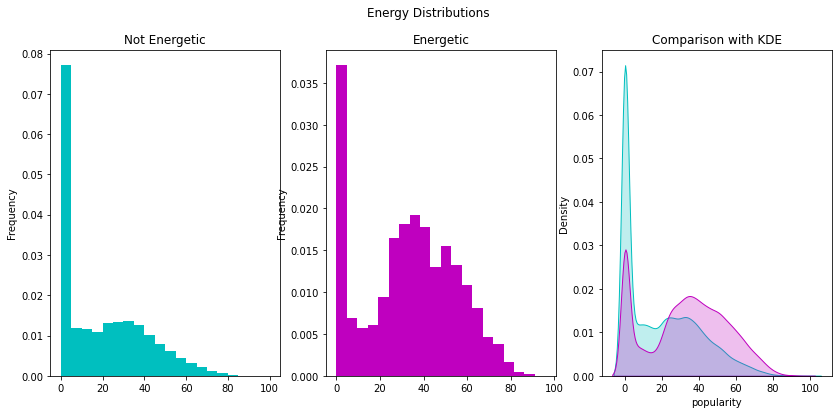

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
note = loudNotLoud[loudNotLoud["energy"] == "Not Energetic"]["popularity"]
ise = loudNotLoud[loudNotLoud["energy"] == "Energetic"]["popularity"]
note.plot(kind="hist", ax=ax[0], bins=20, label="Not Energetic", color="c", density=True)
ax[0].set_title("Not Energetic")

ise.plot(kind="hist", ax=ax[1], bins=20, label="Energetic", color="m", density=True)
ax[1].set_title("Energetic")

sn.kdeplot(note, shade=True, label="Not Energetic", ax=ax[2], color="c")
sn.kdeplot(ise, shade=True, label="Energetic", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
plt.show()

### **ANOVA Test for Energy and Popularity** <br>
We wanted to also see that if we parse the energy into 5 parts, if energy will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized energy into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized energy into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of energy affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that energy affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["energy"] == "Least energetic"]["popularity"],anovaParser[anovaParser["energy"] == "Less energetic"]["popularity"], anovaParser[anovaParser["energy"] == "Mid energetic"]["popularity"], anovaParser[anovaParser["energy"] == "More energetic"]["popularity"],anovaParser[anovaParser["energy"] == "Most energetic"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)


F value: 6477.599940334141 
P value: 0.0


### **Chi Square test for Energy and Popularity**
Until now, we tested energy & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for energy & popularity relationship, in which popularity uses same partition logic with ANOVA's energy. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized energy and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized energy and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of energy-popularity categories.


In [ ]:
# Crosstab of categorized energy-popularity
crosstab_energy = pd.crosstab(chiParser["energy"], chiParser["popularity"])
crosstab_energy

popularity       Low popularity  Mediumly Popular  ...  Popular  Very Popular
energy                                             ...                       
Least energetic            6932              2867  ...      438             9
Less energetic            11254              5593  ...     1277            47
Mid energetic             12801              8712  ...     3141           162
More energetic            11119              9660  ...     4010           191
Most energetic             9172              8598  ...     2725            65

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized energy and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, energy and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_energy)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 22767.92520217302 
P value:  0.0


### **All tests' results for Energy and Popularity relationship**
Except linear correlation tests, we concluded that energy affects popularity, they are dependent. The effection way may be differ when we categorize, for example all numerical T-Test show that if energy increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

## **Hypothesis for Acousticness and analysis of the hypothesis**


Since we want to use acousticness in our machine learning system as a "predictor", we should seek for the "effectiveness" and "dependency" of acousticness with popularity. That is why we are going to test if popularity depends on acousticness or not.

**Null Hypothesis ($\large{H_0}$)**: Popularity does not depend on acousticness.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity depends on acousticness
We will do 5 tests for these hypothesis testing part: Linear Correlation Analysis, T-Test, T-Test for Binary Variable, Anova, Chi-Square Test

### **Linear Correlation Analysis** <br>
We have done 3 different linear correlation tests, pearson, spearman, kendalltau linear correlation tests. <br> <br>
However, we wanted to make sub-hypothesis for these tests: <br>
**Null Hypothesis ($\large{H_0}$)**: Popularity and acousticness are not strongly linearly correlated.

**Alternative Hypothesis ($\large{H_A}$)**: Popularity and acousticness are  strongly linearly correlated. <br> <br>

**Pearson Test:** Pearson test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.39674, the linear correlation is not very high according to pearson test. <br> <br>
**Spearman Test:** Spearman test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.39794, the linear correlation is not very high according to spearman test. <br> <br>
**Kendalltau Test:** Kendalltau test resulted as a significant test, since p value is very low (p < 0.0001). Then the result of the test shows very significant results. However, since correlation coefficient is -0.28848, the linear correlation is not very high according to kendalltau test. <br> <br>

All these 3 tests show that there is no strong linear correlation between acousticness and popularity. Therefore, we have to investigate more to reject null hypothesis. <br>

In [ ]:
# Energy Linear Correlation Analysis
t1 = scipy.stats.pearsonr(data_file["acousticness"], data_file["popularity"])
t2 = scipy.stats.spearmanr(data_file["acousticness"], data_file["popularity"])
t3 = scipy.stats.kendalltau(data_file["acousticness"], data_file["popularity"])

print("Pearsonr linear correlation analysis: \n\tCorrelation: ", t1[0], "\n\tP value: ", t1[1], "\nSpearmanr linear correlation analysis: \n\tCorrelation: ", t2[0],"\n\tP value:", t2[1], "\nKendalltau linear correlation analysis: \n\tCorrelation: ",t3[0],"\n\tP value:" ,t3[1])

Pearsonr linear correlation analysis: 
	Correlation:  -0.39674405084944286 
	P value:  0.0 
Spearmanr linear correlation analysis: 
	Correlation:  -0.39794425205688067 
	P value: 0.0 
Kendalltau linear correlation analysis: 
	Correlation:  -0.28848246039414466 
	P value: 0.0


### **T-Test of effect of acousticness to popularity** <br>

Since we already said that acousticness and popularity are linearly correlated, we need to check acousticness affect to popularity? <br> <br>
**Null Hypothesis ($\large{H_0}$)**: acousticness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: acousticness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two-tailed test result, the difference between means is important, since p value is very low (p < 0.0001). So we reject null hypothesis in significance level 0.0001%, which is very high. <br> <br>

Therefore, according to two tailed T test, we concluded that acousticness affects popularity. <br> <br>

Also, t-test statistics shows that if acousticness increases, popularity decreases since it is negative.








In [ ]:
## T-Test
stats.ttest_ind(data_file["acousticness"],data_file["popularity"])

Ttest_indResult(statistic=-480.93966823848183, pvalue=0.0)

### **2 Parted T-Test of effect: acousticness and Popularity** <br>
We already used T-test and decided that acousticness affects popularity. However, we wanted to see that if we divide acousticness to two equal groups, is it going to affect popularity again. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Binary acousticness does not affect to popularity
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Binary acousticness affects to popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

According to two tailed T-test's p value, which is very low again (p < 0.0001), we concluded that binary acousticness affects popularity on significance level 0.001%. Therefore, we reject the null hypothesis. <br> <br>
Also, T test statistic shows that high acousticness songs have less popularity than low acousticness songs, when we divide into two groups. <br>




In [ ]:
def acoustic_or_not(data):
  if 0.0 <= data < 0.5:
    return "Not Acoustic" 
  else:
    return "Acoustic"

loudNotLoud["acousticness"] = data_file["acousticness"].apply(acoustic_or_not)

stats.ttest_ind( loudNotLoud[loudNotLoud["acousticness"] == "Acoustic"]["popularity"],loudNotLoud[loudNotLoud["acousticness"] == "Not Acoustic"]["popularity"], equal_var=False)

Ttest_indResult(statistic=-159.00836949577632, pvalue=0.0)

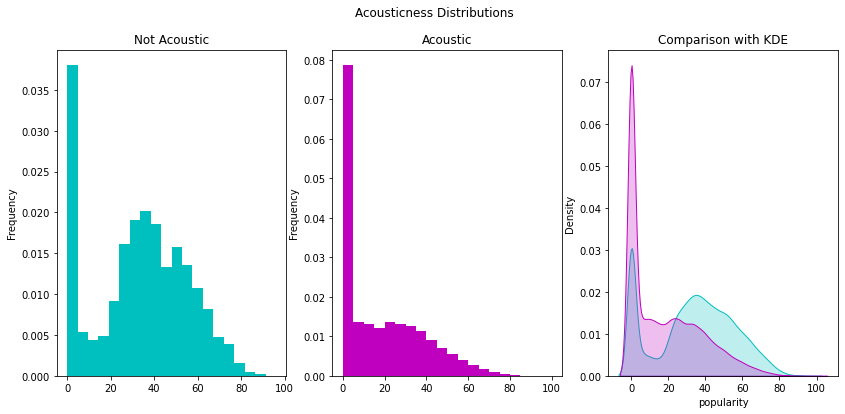

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to char
nota = loudNotLoud[loudNotLoud["acousticness"] == "Not Acoustic"]["popularity"]
isa = loudNotLoud[loudNotLoud["acousticness"] == "Acoustic"]["popularity"]
nota.plot(kind="hist", ax=ax[0], bins=20, label="Not Acoustic", color="c", density=True)
ax[0].set_title("Not Acoustic")

isa.plot(kind="hist", ax=ax[1], bins=20, label="Acoustic", color="m", density=True)
ax[1].set_title("Acoustic")

sn.kdeplot(nota, shade=True, label="Not Acoustic", ax=ax[2], color="c")
sn.kdeplot(isa, shade=True, label="Acoustic", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Acousticness Distributions")
plt.show()

### **ANOVA Test for Acousticness and Popularity** <br>
We wanted to also see that if we parse the acousticness into 5 parts, if acousticness will affect popularity or not. We already parsed every variable into 5 equal parts, so we will do just Anova Test here. <br> <br>

**Null Hypothesis ($\large{H_0}$)**: Categorized acousticness into 5 categories has same population mean with popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Categorized acousticness into 5 does not have same population mean with popularity. 
- $\large H_A: \mu_d  != 0$
<br> <br>

We tested that if being in different category of acousticness affects to popularity category. According to anova test, since p value is very low (p < 0.001), we can conclude that acousticness affects popularity, and reject null hypothesis. Also, since F value is high, we can say that it it a significant test.


In [ ]:
## Anova Test
fvalue, pvalue = stats.f_oneway(anovaParser[anovaParser["acousticness"] == "Least acoustic"]["popularity"],anovaParser[anovaParser["acousticness"] == "Less acoustic"]["popularity"], anovaParser[anovaParser["acousticness"] == "Mid acoustic"]["popularity"], anovaParser[anovaParser["acousticness"] == "More acoustic"]["popularity"],anovaParser[anovaParser["acousticness"] == "Most acoustic"]["popularity"])
print("F value:", fvalue, "\nP value:", pvalue)

F value: 9324.848867612316 
P value: 0.0


### **Chi Square test for Acousticness and Popularity**
Until now, we tested acousticness & popularity relationship with numerical popularity values. However, it is always good to see with categorical values for us. That is why we decided to run chi-square test for acousticness & popularity relationship, in which popularity uses same partition logic with ANOVA's acousticness. <br> <br>
**Null Hypothesis ($\large{H_0}$)**: Categorized acousticness and categorized popularity are independent. <br> <br>


**Alternative Hypothesis ($\large{H_A}$)**: Categorized acousticness and categorized popularity are dependent. 

<br> <br>
We wanted to show how we categorized and crosstab of acousticness-popularity categories.


In [ ]:
# Crosstab of categorized acousticness-popularity
crosstab_acousticness= pd.crosstab(chiParser["acousticness"], chiParser["popularity"])
crosstab_acousticness

popularity      Low popularity  Mediumly Popular  ...  Popular  Very Popular
acousticness                                      ...                       
Least acoustic           18671             17312  ...     6569           264
Less acoustic             7075              5309  ...     1909            86
Mid acoustic              6541              4162  ...     1211            51
More acoustic             7906              4173  ...     1023            37
Most acoustic            11085              4474  ...      879            36

[5 rows x 5 columns]

#### **Test Results** <br>
Since p value is very low (p <0.001) we can reject the null hypothesis, which is categorized acousticness and categorized popularity are independent. Therefore, we can state that if we categorize into 5 parts, acousticness and popularity will be dependent. <br>


In [ ]:
# Chi square test
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_acousticness)
print("Chi_test_stat:", chi2_test_stat, "\nP value: ", p_value)

Chi_test_stat: 33211.468037808976 
P value:  0.0


### **All tests' results for Acousticness and Popularity relationship**
Except linear correlation tests, we concluded that acousticness affects popularity, they are dependent. T-Test show that if acousticness increase popularity decreases. However, for the future usage we decided ways of effects. Therefore, in overall, we can easily reject Null Hypothesis.

# **Hypothesis Testing for Decades** <br>
From now on, the discussion topic will be checking if significant differences exist between eras. <br> <br>
Therefore, our hypothesis' will be in the form of: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between ....'s and ....'s in terms of (features).
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between ....'s and ....'s in terms of (features).
- $\large H_A: \mu_d  != 0$
<br> <br>
A significant note is that we are going to make more than 1 hypothesis test in every step ((n * (n-1)) / 2), and show p values which is under significance level 5%. Above of 5% will be shown as "X" in the output, since there is no significant result in these outputs.<br>
Another thing is we will analyze difference in ascending order. Which means once we analyzed  1920, we will not analyze it again since we use two tailed t-test, the implications can be transposed.<br>
Note that we accept decades as 0->9, which means when we say 1970's, we say 1970-1979 era. 
<br>
Then, we need to introduce new data set that is merged version of decades and genres data set:



In [ ]:
decadesGenres = df_cont.drop(columns=["name","key","artists_y", "artists","index"]).copy()
def toDecades(data):
  return int(data / 10) *10 
decadesGenres["year"] = decadesGenres["year"].apply(toDecades)
decadesGenres.head()

acousticness  danceability  duration_ms  ...  valence  year  genres
0         0.991         0.598       168333  ...    0.634  1920   blues
1         0.993         0.647       163827  ...    0.689  1920   blues
2         0.992         0.782       195200  ...    0.487  1920   blues
3         0.995         0.482       198000  ...    0.461  1920   blues
4         0.992         0.574       189800  ...    0.764  1920   blues

[5 rows x 16 columns]

This is a spesific printing function for better formatting of crosstabbed p values:


In [ ]:
## printing algorithm of crosstabbed p values
def crosstabPrint(dtod):
  print("\t\t",end = "\t")
  for val in range(1920,2021,10):
    print("\t", val, end = "")
  print()
  for key in dtod.keys():
    print("-"*120)
    print("\t T Test Statistic:", end ="")
    for val in range(1920,2021,10):
      if val in dtod[key]:
        idx = dtod[key].index(val)
        print("\t{:.2f}".format(dtod[key][idx+1]), end= "")
      else:
        print("\t","X", end ="")
    print()
    print(key, end = "" )
    print()
    print("\t P value:\t", end = "")
    for val in range(1920,2021,10):
      if val in dtod[key]:
        idx = dtod[key].index(val)
        print("\t{:.2f}".format(dtod[key][idx+2]), end= "")
      else:
        print("\t","X", end ="")
    print()


For all decades, we aimed to find significant differences between features.

In [ ]:
## finds and prints significant differences between  decades for spesific feature
def overAllDecade(decadesGenres, variable):
  allDecades = range(1920, 2021, 10)
  columns = decadesGenres.columns
  dtod = {} # result dictionary
  # pair the decades
  for firstDecade in range(len(allDecades)): 
    for secondDecade in range(firstDecade+1, len(allDecades)):
      # find decade's value
      firstTt = decadesGenres[decadesGenres["year"] == allDecades[firstDecade]]
      firstTt = pd.DataFrame(firstTt[variable])
      secondTt = pd.DataFrame(decadesGenres[decadesGenres["year"] == allDecades[secondDecade]])
      secondTt = pd.DataFrame(secondTt[variable])
      ttestVal, pVal = stats.ttest_ind(firstTt,secondTt) # T-Test
      if pVal <= 0.05: # if below the 5% significance level
        # add it
        if allDecades[firstDecade] in dtod: 
          dtod[allDecades[firstDecade]].append(allDecades[secondDecade])
          dtod[allDecades[firstDecade]].append(ttestVal[0])
          dtod[allDecades[firstDecade]].append(pVal[0])
        else:
          dtod[allDecades[firstDecade]] = [allDecades[secondDecade], ttestVal[0],pVal[0]]
  crosstabPrint(dtod) ## print


For all decades, we aimed to find significant differences between features with respect to genres. To be safe, we accept the sample size as bigger than 30, lower than 30 sample-sized features will not be covered, unfortunately.

In [ ]:
# finds and prints significant differences between decades for spesific feature and spesific genre
def decadeComperator(decadesGenres, genre, variable):
  allDecades = range(1920, 2021, 10)
  columns = decadesGenres.columns
  dtod = {}
  # pair decades
  for firstDecade in range(len(allDecades)):
    for secondDecade in range(firstDecade+1, len(allDecades)):
      firstTt = decadesGenres[decadesGenres["year"] == allDecades[firstDecade]]
      firstTt = firstTt[firstTt["genres"] == genre]
      firstTt = pd.DataFrame(firstTt[variable])
      secondTt = pd.DataFrame(decadesGenres[decadesGenres["year"] == allDecades[secondDecade]])
      secondTt = pd.DataFrame(secondTt[secondTt["genres"] == genre][variable])

      if secondTt[variable].count() > 30 and firstTt[variable].count() > 30: # sample size check
        ttestVal, pVal = stats.ttest_ind(firstTt,secondTt) # T-Test
        if pVal <= 0.05: # significance level check
          # add it
          if allDecades[firstDecade] in dtod:
            dtod[allDecades[firstDecade]].append(allDecades[secondDecade])
            dtod[allDecades[firstDecade]].append(ttestVal[0])
            dtod[allDecades[firstDecade]].append(pVal[0])
          else:
            dtod[allDecades[firstDecade]] = [allDecades[secondDecade], ttestVal[0],pVal[0]]
  crosstabPrint(dtod) # print

## **Overall Changes in Decades** <br>
This part corresponds to the not genre spesific hypothesis testing part. Then, our hypothesis will be in form of: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of (features).
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of (features).
- $\large H_A: \mu_d  != 0$
<br> <br>


### ***Hypothesis test of Popularity for different eras***<br>
Our first feature check significant differences is popularity. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the popularity of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of popularity.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of popularity.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>
We analyzed every decade pair 1 by 1. <br> <br>







**Results of tests:** <br>
<li>For 1920's, there is significant difference exist between every decade we considered, since p values are lower than 0.05 (5% significance level). Which means 1920's popularity is significantly different than other decades, which implies that we reject null hypothesis, and accept alternative hypothesis in significance level 5% (Actually we can do it for even 0.0001%), since p values are lower than 0.05. The direction of difference is generally negative except 1920-1940 case. In other words, 1920's songs are significantly less popular than other decades songs, except 1940's, in this case 1920's songs significantly more popular than 1940's. <br> <br>
<li>For 1930's, similar as 1920's, there is significant difference exist between every decade, therefore we reject the null hypothesis, since p values are lower than 0.05, in 5% significance level. The direction of difference is generally negative, except 1940's. Which means 1930's songs are significantly less popular than next decades, except 1940. <br><br>
<li>For 1940's, every next decade is significantly more popular than 1940's, since p values are lower than 0.05 and T values are negative. We already stated that 1920's and 1930's are more popular than 1940's, so we accepted all alternative hypothesis's, and with looking at T-Test's, we can state that 1940's songs are least popular songs.<br><br>
<li> For 1950's, every next decade is significantly more popular than 1950's, since p values are lower than 0.05 and T values are negative. So we reject null hypothesis and accept alternative hypothesis. <br> <br>
<li>For 1960's, since p value is low, every next decade is significantly different in terms of popularity from 1960's. Also since T value is negative, 1960's are less popular than next decades. <br><br>
<li>For 1970's, since p value is low, in significance level 5% we reject null hypothesis for every next decade. Then, there is significant difference between 1970's and next decades. Since T-values are negative, we can state that 1970's songs are less popular than next decades. <br><br>
<li>For 1980's, since p-values are lower than we can state in 5% significance level that there is significant difference between 1980's and next decades in terms of popularity. Therefore, we reject the null hypothesis. Also, since T-Test Statistics are negative, we can state that 1980's songs are less popular than next decade's songs. <br> <br>
<li>For 1990's, differently we cannot state that there is significant difference exists between 1990's and 2010's in terms of popularity since p > 0.05. However, we can state that there is significant difference exist between 1990's-2000's and 1990's-2020's. So we reject the null hypothesis for these pairs. Also we can say that 1990's songs are less popular than 2000's, but more popular than 2020's songs, according to T-Test Statistics. <br> <br>
<li>For 2000's, we can state that there is significant difference exist with next decades in terms of popularity, since p < 0.0001, in significance level 5%, even for 0.0001%. We reject the null hypothesis for them. Since T-Test statistics are positive, 2000's songs are more popular than 2010's- 2020's.<br> <br>
<li>For 2010's, since p value < 0.0001, we can state that 2010's are significantly different from 2020's in terms of popularity, we reject the null hypothesis. T-statistic > 0, then 2010's are more popular. <br> <br>

This part was insight of p-values and T-Test statistic usage. From now on, we will not do that much detailed explanations for the sake of simplicity.

In [ ]:
overAllDecade(decadesGenres, "popularity")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-10.59	3.21	-32.60	-76.02	-109.92	-121.28	-146.15	-100.86	-58.04	-35.74
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	21.76	-35.90	-100.71	-149.26	-165.84	-201.67	-142.12	-82.56	-48.02
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-71.93	-165.21	-236.76	-260.30	-311.43	-218.24	-127.99	-76.42
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------

### ***Hypothesis test of Danceability for different eras***<br>
Our first feature check significant differences is danceability. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the danceability of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of danceability.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of danceability.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference in terms of danceability between 1920's-1950's and 1930's-1970's since p > 0.05. So we do not reject null hypothesis for them, except these, we reject null hypothesis for every pair. <br> 
We again see that 1940's danceability is significantly lower. Except 1930's, and 1940's pair, danceability increases through decades.



In [ ]:
overAllDecade(decadesGenres, "danceability")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-10.36	12.15	 X	-8.09	-12.89	-17.22	-19.74	-22.24	-25.60	-31.81
1920
	 P value:		 X	0.00	0.00	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	33.08	17.11	8.53	 X	-7.42	-11.45	-14.35	-18.56	-26.58
1930
	 P value:		 X	 X	0.00	0.00	0.00	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-26.37	-43.08	-52.84	-59.31	-63.72	-65.82	-72.89	-60.46
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
-------------------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Liveness for different eras***<br>
Our first feature check significant differences is liveness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920-1990's, 1930's-1970's,1930's-2000's,1930's-2010's, 1940's-1980's, 1940's-2000's, 1940's-2010's, 1950's-1980's, 1950's-1990's, 1960's-1980's, 1970's-2010's, 2000's-2010's in terms of liveness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing liveness, but 2020's have highest peek since every T value is negative. <br>
For other implications look at the table.



In [ ]:
overAllDecade(decadesGenres, "liveness") 

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-4.58	-3.68	-2.27	-2.79	-4.54	-2.71	 X	-3.70	-4.40	-8.36
1920
	 P value:		 X	0.00	0.00	0.02	0.01	0.00	0.01	 X	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	3.97	3.34	 X	2.86	5.09	 X	 X	-6.75
1930
	 P value:		 X	 X	 X	0.00	0.00	 X	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.89	2.07	-2.65	 X	4.42	 X	 X	-9.11
1940
	 P value:		 X	 X	 X	0.00	0.04	0.01	 X	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-6.89	 X	 X	-3

### ***Hypothesis test of Tempo for different eras***<br>
Our first feature check significant differences is tempo. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference between 1920's-1940's, 1930's-1950's, 1970's-2020's, 1980's-2000's, 1980's-2010's, 1990's-2020's in terms of tempo, since p value > 0.05.<br>
For other pairs we accept alternative hypothesis. Since 1920's every pair is negative -except 1940's- 1920 has lowest tempo. For many pairs, we may see that smaller decades has lower tempo (just a generalization).




In [ ]:
overAllDecade(decadesGenres, "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-5.92	 X	-7.26	-15.06	-21.11	-23.82	-18.80	-20.69	-22.63	-15.73
1920
	 P value:		 X	0.00	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	7.19	 X	-11.64	-20.04	-23.72	-17.24	-20.03	-22.11	-12.66
1930
	 P value:		 X	 X	0.00	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-11.20	-26.62	-38.42	-43.26	-34.00	-36.11	-39.16	-20.16
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
----------------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Valence for different eras***<br>
Our first feature check significant differences is valence. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1930's-2020's, 1950's-2010's, 1960's-1980's, 1990's-2020's, 2000's-2020's, their p > 0.05. Then we do not reject null hypothesis for them. Which means, there is no significant difference in terms of valence in that pairs. <br>
Except these pairs, we reject null hypothesis. The interesting point is 1970's has highest significant valence mean according to T-Test statistics.<br>
Other implications can be seen in the crosstab.





In [ ]:
overAllDecade(decadesGenres, "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-12.77	2.68	-7.50	-23.07	-26.19	-22.36	-17.10	-17.98	-8.83	-12.72
1920
	 P value:		 X	0.00	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	22.22	9.03	-12.39	-16.38	-11.56	-2.80	-4.08	10.02	 X
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.01	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-19.32	-50.51	-57.14	-49.62	-38.88	-38.05	-21.70	-20.17
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
----------------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Speechiness for different eras***<br>
Our first feature check significant differences is speechiness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that, 1920's-1990's, 1920's-2000's, 1930's-2020's have p value > 0.05. So we cannot reject null hypothesis for them. We can say that there is no significant difference in terms of speechiness for these pairs. <br>
Other implications can be seen, however we can see that 1930's have highest speechiness, -excluding 2020-, or 2020's have highest speechiness, -excluding 1930's- according to T-Test statistics.





In [ ]:
overAllDecade(decadesGenres, "speechiness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-5.52	5.36	8.02	20.57	17.37	14.94	 X	 X	-4.54	-6.04
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	 X	 X	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	16.90	23.59	40.43	38.49	35.46	15.24	11.88	7.43	 X
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	3.84	23.47	17.16	13.36	-11.63	-14.71	-19.84	-18.56
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statisti

### ***Hypothesis test of Energy for different eras***<br>
Our first feature check significant differences is energy. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
There is always significant difference between eras in terms of energy except 1990's-1990's, since every pair's p value is lower than 0.05 (in 5% significance level). <br>
According to T test statistics, 1920's have lowest energy, since every T-Test statistic is negative, then 1940's is lowest, 1950's, 1960's, 1970's...





In [ ]:
overAllDecade(decadesGenres, "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-10.91	-4.20	-16.71	-41.44	-58.73	-66.23	-68.68	-86.19	-81.03	-67.38
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	10.46	-9.17	-47.77	-74.45	-87.03	-89.89	-112.63	-104.82	-75.59
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-25.38	-78.19	-115.25	-132.17	-135.92	-163.91	-153.72	-98.20
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------------------------------------------------

### ***Hypothesis test of Acousticness for different eras***<br>
Our first feature check significant differences is acousticness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1980's-2020's and 1990's-2020's have no significant difference in terms of acousticness since p > 0.05 for them. We do not reject null hypothesis for them. <br>
For others, we accept alternative hypothesis. Which means for other pairs there is significant difference in terms of acousticness, since p < 0.05 (in 5% significance level). T test statistics states that 1920's has highest acousticness and generally next decades have lower acousticness except some decades. <br>
Other implications can be seen below. 




In [ ]:
overAllDecade(decadesGenres, "acousticness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	11.15	7.22	24.84	49.07	76.46	95.10	94.80	102.45	98.84	90.37
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-10.11	19.90	63.39	105.12	132.67	132.23	141.20	136.42	110.12
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	40.28	98.61	158.13	197.72	196.95	209.84	202.94	162.88
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------------------------------------------------------------------

## **Change of Pop through Decades**

### ***Hypothesis test of Loudness of Pop Songs for different eras*** 

Our first feature check significant differences is loudness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the loudness of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of loudness for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of loudness for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1960's-1970's, 2000's-2020's, 2010's-2020's in terms of loudness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing loudness, but 2020's have highest peek since every T value is negative. <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-2.45	-6.50	-7.49	-9.99	-9.32	-9.34	-14.58	-22.07	-22.38	-21.76
1920
	 P value:		 X	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-7.07	-9.87	-16.23	-14.75	-15.77	-27.40	-44.02	-44.96	-36.67
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-5.05	-16.59	-14.23	-17.53	-38.00	-67.06	-69.16	-47.75
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
---------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Liveness of Pop Songs for different eras*** 

Our next feature check significant differences is liveness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1930's-2020's, 1950's-2000's, 1950's-2010's, 1970's-1980's, 1970's-1990's, 1970's-2000's, 2000's-2010's in terms of liveness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing liveness, but 1970's liveness value is lower than previous years . <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "liveness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	2.51	5.39	4.74	6.46	7.50	7.39	6.02	5.47	 X
1930
	 P value:		 X	 X	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	4.44	3.83	7.11	9.15	8.89	6.32	5.44	-3.80
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	2.80	4.69	4.31	 X	 X	-7.94
1950
	 P value:		 X	 X	 X	 X	 X	0.01	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	4.76	7.45	7.03	3.54	

### ***Hypothesis test of Tempo of Pop Songs for different eras*** 


Our next feature check significant differences is tempo for pop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1930's, 1920's-1940's, 1920's-1950's, 1980's-2000's, 1980's-2010's, 1980's-2020's, 1990's-2020's, 2000's-2010's, 2000's-2020's, 2010's-2020's. in terms of tempo, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing tempo, but 1980's tempo value is higher than previous years . <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-2.53	-3.20	-4.25	-3.37	-3.74	-3.92	-3.66
1920
	 P value:		 X	 X	 X	 X	0.01	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-3.95	-6.76	-8.43	-11.29	-9.05	-9.98	-10.50	-9.02
1930
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-4.93	-10.42	-12.99	-18.88	-15.27	-16.85	-17.81	-12.01
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Stat

### ***Hypothesis test of Valence of Pop Songs for different eras*** 


Our next feature check significant differences is valence for pop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1930's-2010's, 1940's-1990's, 1940's-2000's, 1950's-1970's, 1950's-1970's, 1960's-1980's, 1990's-2000's in terms of valence, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing valence, but 1960's valence value is higher than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-5.34	-7.43	-7.42	-8.55	-7.71	-8.59	-7.00	-7.49	-5.11	-6.65
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-4.95	-6.56	-8.69	-6.64	-9.00	-4.76	-5.24	 X	-3.09
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-3.64	-7.18	-3.28	-7.99	 X	 X	14.35	2.86
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	 X	 X	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic

### ***Hypothesis test of Speechiness of Pop Songs for different eras***  


Our next feature check significant differences is speechiness for pop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1930's, 1920's-1940's, 1920's-1950's, 1920's-2000's, 1920's-2010's, 1920's-2020's, 1930's-1940's, 1930's-1950's, 1930's-2000's, 1930's-2010's, 1930's-2020's, 1940's-2000's, 1940's-2010's, 1960's-1980's, 1970's-1980's in terms of speechiness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing speechiness, but 1960's speechiness value is higher than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "speechiness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	7.90	9.08	9.92	3.60	 X	 X	 X
1920
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	13.40	13.61	15.71	5.42	 X	 X	 X
1930
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.80	22.30	20.59	24.70	9.93	 X	 X	-3.46
1940
	 P value:		 X	 X	 X	0.01	0.00	0.00	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	19.31	17.33	20.98	6.61	-2.10	-5.78	-6.54
1

### ***Hypothesis test of Energy of Pop Songs for different eras*** 


Our next feature check significant differences is energy for pop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1930's, 1920's-1940's, 1930's-1940's in terms of energy, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing energy, but 2020's energy value is higher than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-2.51	-6.67	-7.88	-10.24	-10.89	-14.16	-12.94	-14.24
1920
	 P value:		 X	 X	 X	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-5.18	-16.46	-19.72	-26.25	-27.96	-36.31	-33.30	-33.85
1930
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-10.14	-34.06	-40.32	-55.12	-58.71	-74.42	-69.57	-59.14
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
----------------------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Acousticness of Pop Songs for different eras***


Our next feature check significant differences is acousticness for pop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the songs of 1920's, 1930's, .... in spotify for pop songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness for pop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness for pop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1930's-1940's, in terms of acousticness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing acousticness, but 2020's acousticness value is lower than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "pop", "acousticness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-3.94	-6.90	-2.19	4.82	8.03	12.09	12.55	13.81	12.99	14.78
1920
	 P value:		 X	0.00	0.00	0.03	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	6.09	21.80	29.59	41.36	42.56	46.07	43.69	47.11
1930
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	15.07	49.17	65.64	91.62	94.31	101.43	96.89	97.90
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test 

## **Change of Metal through Decades**


### ***Hypothesis test of Loudness of Metal Songs for different eras*** 
Our first feature check significant differences is loudness for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the loudness of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of loudness for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of loudness for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's-1940's-1950's have no significance difference between next decades since p > 0.05. Also, 1960's-1970's, and pairs with 2020's have no significant difference in terms of loudness of metal songs since p > 0.05. Then we do not reject null hypothesis for these pairs. <br>
For others, we accept alternative hypothesis, since p < 0.05, in 5% significance level we say that loudness of metal songs are different. <br>
T-Test statistics shows that 2000's have highest loudness between that pairs.<br>
For other implications, look to table.


In [ ]:
decadeComperator(decadesGenres, "metal", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.37	-3.65	-11.18	-7.22	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.02	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-9.82	-14.59	-36.52	-21.53	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-5.92	-31.48	-16.07	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	-26.47	-12.29	 X
1990
	 P value:

### ***Hypothesis test of Liveness of Metal Songs for different eras*** 
Our first feature check significant differences is liveness for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that, 1960's-1970's, 1970's-1980's, 1970's-1990's, 1970's-2000's, 1970's-2010's, 1980's-1990's, 1980's-2000's have p value less than 0.05. We reject the null hypothesis for these pairs, we say that the pairs are significantly different in terms of livenes of metal songs. For comparables, 1970's have highes T-Test statistic, then it has highest liveness among them.


In [ ]:
decadeComperator(decadesGenres, "metal", "liveness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-2.12	 X	 X	 X	 X	 X
1960
	 P value:		 X	 X	 X	 X	 X	0.03	 X	 X	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	3.69	7.52	6.37	4.31	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	4.98	3.65	 X	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	 X	 X


### ***Hypothesis test of Tempo of Metal Songs for different eras*** 
Our first feature check significant differences is tempo for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
1970's-1990's,1980's-1990's,1990's-2000's,1990's-2010's pairs have p value less than 0.05, so we reject the null hypothesis for them. We state that for these pairs tempo of metal songs have significantly different tempo. <br>
For other pairs, since p > 0.05 there is no significance of differences. <br>
T-Test staatistics can be observed as: <br>
1970 > 1990, 1980 > 1990, 2000 > 1990, 2010 > 1990. <br>

In [ ]:
decadeComperator(decadesGenres, "metal", "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	3.65	 X	 X	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	2.96	 X	 X	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	-3.61	-3.42	 X
1990
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X	0.00	0.00	 X


### ***Hypothesis test of Valence of Metal Songs for different eras*** 
Our first feature check significant differences is valence for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We cannot reject null hypothesis for pairs that includes 1920's-1930's-1940's-1950's-1960's-2020's since their p value is bigger than 0.05. Also 1960's have p value less than 0.05 with just 2010's. So we can state that for these pairs there is no significant valence difference for metal songs in these eras. <br>
Other pairs, however, we can reject null hypothesis in significance level 5% since p < 0.05. Also one can see that 1970's have highest valence among comparables. <br>
For other implications, look at the table.



In [ ]:
decadeComperator(decadesGenres, "metal", "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	 X	2.95	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X	 X	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	11.06	12.76	13.03	13.90	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	1.99	2.70	5.56	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.05	0.01	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	 X	4.20	 X
1990
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X	 X	0.

### ***Hypothesis test of Speechiness of Metal Songs for different eras*** 
Our first feature check significant differences is speechiness for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1940's,1950's,2020's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1960's-1970's, it is similar. <br>
For others, we reject the null hypothesis and say there is significant difference of speechiness of metal songs since p < 0.05. We cannot compare 1960's-1970's but they have lowest speechiness among comparable ones. <br>
For other implications, look at the table.

In [ ]:
decadeComperator(decadesGenres, "metal", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.37	-3.65	-11.18	-7.22	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.02	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-9.82	-14.59	-36.52	-21.53	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-5.92	-31.48	-16.07	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	-26.47	-12.29	 X
1990
	 P value:

### ***Hypothesis test of Energy of Metal Songs for different eras*** 
Our first feature check significant differences is energy for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1940's,1950's,2020's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1960's-1970's, it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences. <br>
We can see that 1960's-1970's have lowest energy, even when they are not comparable according to T test statistics.



In [ ]:
decadeComperator(decadesGenres, "metal", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-6.25	-3.80	-6.85	-6.84	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-15.58	-8.61	-16.91	-14.27	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	7.46	-3.23	-3.47	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	-9.67	-8.05	 X
1990
	 P value:		 X	 

### ***Hypothesis test of Acousticness of Metal Songs for different eras*** 
Our first feature check significant differences is acousticness for metal songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the  metal songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness for metal songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness for metal songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1940's,1950's,2020's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1960's-1970's, 1980's-1990's, 1980's-2000's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of acousticness of metal songs. <br>
We can see that 1960's-1970's have highest acousticness, even when they are not comparable according to T test statistics.


In [ ]:
decadeComperator(decadesGenres, "metal", "acousticness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	4.61	3.46	4.23	4.71	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	14.65	12.11	13.40	11.90	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	 X	2.57	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X	 X	0.01	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	2.12	3.17	 X
1990
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X

## **Change of Rock through Decades**

### ***Hypothesis test of Loudness of Rock Songs for different eras*** 


Our first feature check significant differences is loudness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the loudness of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of loudness for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of loudness for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1940's, 1920's-1950's, 1920's-1970's, 1940's-1950's, 1940's-1960's, 1940's-1970's, 1950's-1960's, 1950's-1970's, 2010's-2020's in terms of loudness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing loudness, but 2000's have highest peek since every T value is negative. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	4.22	 X	 X	-2.27	 X	-3.26	-6.08	-12.63	-9.22	-8.49
1920
	 P value:		 X	0.00	 X	 X	0.02	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-5.61	-16.58	-21.78	-20.03	-23.25	-32.28	-48.72	-38.86	-20.57
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.89	-6.08	-13.58	-9.74	-8.27
1940
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	

### ***Hypothesis test of Liveness of Rock Songs for different eras*** 


Our next feature check significant differences is liveness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1950's, 1920's-1960's, 1920's-1980's, 1920's-1990's, 1920's-2000's, 1930's-1940's, 1930's-1960's, 1930's-1970's, 1930's-1980's, 1930's-2000's, 1930's-2010's, 1940's-1960's, 1940's-1970's, 1940's-1980's, 1940's-1990's, 1940's-2000's, 1940's-2010's, 1960's-2000's, 1970's-2010's, 1980's-2010's, 1980's-2010's, 1990's-2000's in terms of liveness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing liveness, but 2020's have highest peek since every T value is negative. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "liveness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-3.08	-2.57	 X	 X	-2.08	 X	 X	 X	-2.17	-5.51
1920
	 P value:		 X	0.00	0.01	 X	 X	0.04	 X	 X	 X	0.03	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	5.48	 X	 X	 X	2.33	 X	 X	-10.36
1930
	 P value:		 X	 X	 X	0.00	 X	 X	 X	0.02	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.47	 X	 X	 X	 X	 X	 X	-4.96
1940
	 P value:		 X	 X	 X	0.01	 X	 X	 X	 X	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-4.94	-6.43	-5.59	-3.59	-4.39	-6.46	-19.17
1950
	 P value

### ***Hypothesis test of Tempo of Rock Songs for different eras*** 


Our next feature check significant differences is tempo. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1950's, 1920's-1930's, 1920's-1940's, 1920's-1950's, 1920's-1960's, 1920's-1970's, 1920's-1990's, 1920's-2020's, 1930's-1940's, 1930's-1950's, 1950's-2020's, 1960's-2020's, 1970's-2020's, 1980's-2000's, 1980's-2010's, 1990's-2010's, 1990's-2020's, 2000's-2010's in terms of tempo, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing tempo, but 1980's have highest peek since every T value is negative. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.22	 X	-2.24	-2.07	 X
1920
	 P value:		 X	 X	 X	 X	 X	 X	0.03	 X	0.03	0.04	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-2.35	-4.47	-5.98	-4.94	-5.92	-5.44	-2.09
1930
	 P value:		 X	 X	 X	 X	0.02	0.00	0.00	0.00	0.00	0.00	0.04
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-2.80	-3.76	-4.49	-3.94	-4.39	-4.23	-2.97
1940
	 P value:		 X	 X	 X	 X	0.01	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-3.05	-6.61	-9.00	-7

### ***Hypothesis test of Valence of Rock Songs for different eras*** 



Our next feature check significant differences is valence. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1920's-1950's, 1920's-1930's, 1920's-1940's, 1920's-1960's, 1920's-1970's, 1920's-1990's, 1920's-2020's, 1930's-1940's, 1930's-1970's, 1930's-19800's, 1990's-2000's, 1990's-2020's, 2000's-2020's in terms of valence, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing valence, but 1950's have higher values than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-3.21	 X	 X	 X	 X	 X	 X	 X
1920
	 P value:		 X	 X	 X	0.00	 X	 X	 X	 X	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-7.26	-3.33	 X	 X	4.14	3.56	5.35	2.03
1930
	 P value:		 X	 X	 X	0.00	0.00	 X	 X	0.00	0.00	0.00	0.04
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-3.13	 X	 X	 X	 X	 X	2.49	 X
1940
	 P value:		 X	 X	 X	0.00	 X	 X	 X	 X	 X	0.01	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	7.35	11.65	12.51	19.39	17.76	20.48	7.87
1950
	 P value:		 X	 X	 X

### ***Hypothesis test of Speechiness of Rock Songs for different eras*** 



Our next feature check significant differences is speechiness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1940's-2010's, 1940's-2020's, 1950's-1970's, 1950's-1980's, 1950's-1990's, 1950's-2000's, 1950's-2010's, 1950's-2020's, 1960's-2020's, 1970's-1980's, 1970's-1990's, 1970's-2000's, 1970's-2020's... in terms of speechiness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing speechiness, but 1960's have lower values than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "speechiness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	4.29	12.96	45.04	70.27	76.57	81.17	71.20	70.39	58.63	25.06
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	7.20	29.46	64.98	79.40	78.64	65.86	52.77	48.63	14.52
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.22	3.16	2.75	3.03	2.52	3.03	 X	 X
1940
	 P value:		 X	 X	 X	0.03	0.00	0.01	0.00	0.01	0.00	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	

### ***Hypothesis test of Energy of Rock Songs for different eras***



Our next feature check significant differences is energy. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1980's-2020's, 1990's-2020's in terms of energy, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing energy, but 2000's have higher values than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-2.29	-2.22	-3.89	-6.45	-7.59	-10.47	-10.69	-13.56	-12.22	-11.88
1920
	 P value:		 X	0.02	0.03	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	-4.86	-11.53	-15.16	-23.15	-23.44	-30.13	-26.49	-18.49
1930
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-4.34	-5.91	-9.40	-9.56	-12.64	-11.06	-10.06
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
----------------------------------------------------------------------------------------------------------------------

### ***Hypothesis test of Acousticness of Rock Songs for different eras*** 



Our next feature check significant differences is acousticness. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the songs of 1920's, 1930's, .... in spotify for rock songs.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness for rock songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness for rock songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that there is no significant difference betweenn 1980's-2000's, 1930's-1940's, 1930's-1950's, 1940's-1950's in terms of acousticness, which means p > 0.05. We do not reject null hypothesis for these pairs. <br>
Except these, there is no straight pattern of increasing acousticness, but 2000's have lower values than previous years. <br>



In [ ]:
decadeComperator(decadesGenres, "rock", "acousticness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	-2.71	-2.82	-3.54	2.96	6.39	11.40	10.37	10.74	10.00	8.75
1920
	 P value:		 X	0.01	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	15.84	25.33	39.88	36.28	36.46	34.19	21.05
1930
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	7.33	11.40	17.92	16.42	16.88	15.84	13.85
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 

## **Change of Hiphop Through Decades**

### ***Hypothesis test of Loudness of Hip-hop Songs for different eras*** 
Our first feature check significant differences is loudness for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the loudness of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of loudness for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of loudness for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1940's-1960's,1940's-1980's, 1970's-1980's, 2000's-2020's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of loudness of hip-hop songs. <br>
We can see that between comparable ones, 1940's and 1950's have lowest loudness since T values are negatives, and 2020's has highest loudness, since T test statistics are "positive" for that.<br>



In [ ]:
decadeComperator(decadesGenres, "hip hop", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-2.66	 X	-7.43	-19.88	-16.69	-19.20
1940
	 P value:		 X	 X	 X	 X	 X	0.01	 X	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-2.85	-2.31	-6.40	-15.76	-13.40	-15.28
1960
	 P value:		 X	 X	 X	 X	 X	0.00	0.02	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-4.83	-17.50	-14.15	-16.49
1970
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-10.83	-30.8

### ***Hypothesis test of Liveness of Hip-Hop Songs for different eras*** 
Our first feature check significant differences is liveness for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's except the pair with 1950's it is similar. <br>
The p values that is shown as number, states that they are < 0.05, so we reject alternative hypothesis for them. So liveness of hip-hop songs are significantly different for them. <br>
T-Test statistic implications more pair-based in liveness of hip-hop, generalizations are not very possible or useful.

In [ ]:
decadeComperator(decadesGenres, "hip hop", "liveness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	4.75	 X	 X	 X	 X	 X	 X
1940
	 P value:		 X	 X	 X	 X	0.00	 X	 X	 X	 X	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.87	-4.00	-3.83	-3.59	-2.97
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-3.19	-2.73	-2.25	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.01	0.02	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-3.45	-2.41	 X	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X

### ***Hypothesis test of Tempo of Hip-Hop Songs for different eras*** 
Our first feature check significant differences is tempo for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1940's-1960's,1940's-1990's, 1940's-2000's,1970's-1980's,1970's-2010's, 1970's-2020's,1980's-2010's, 1980's-2020's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of tempo of hip-hop songs. <br>
We can see that between comparable ones, there exist no generalizations of T-Test statistics, so one can find smaller & higher values, but generalizations are not very possible.

In [ ]:
decadeComperator(decadesGenres, "hip hop", "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-2.43	-2.32	 X	 X	-3.20	-2.89
1940
	 P value:		 X	 X	 X	 X	 X	0.02	0.02	 X	 X	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	3.76	2.81	 X	 X
1970
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	5.48	3.64	 X	 X
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.00	 X	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	-2.65	-11.80	-7.27
1990
	 P value:		 X	 X	 X	 X	 X	 X	 X	

### ***Hypothesis test of Valence of Hip-hop Songs for different eras***
Our first feature check significant differences is valence for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1940's-1960's,1940's-1970's, 1940's-1990's,1940's-2000's,1940's-2020's,1960's-1970's,1960's-1990's, 1960's-2000's,1960's-2020's, 1990's-200's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of valence of hip-hop songs. <br>
We can see that between comparable ones, there exist no generalizations of T-Test statistics, so one can find smaller & higher values, but generalizations are not very possible, except saying that 2010's have lowest among comparables. 


In [ ]:
decadeComperator(decadesGenres, "hip hop", "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-2.69	 X	 X	6.59	 X
1940
	 P value:		 X	 X	 X	 X	 X	 X	0.01	 X	 X	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-3.14	 X	 X	3.91	 X
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	 X	 X	0.00	 X
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	2.03	 X	8.70	2.79
1970
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.04	 X	0.00	0.01
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	7.51	6.00	20.05	7.59
1980
	 P value:		 X	 X	 X	 X	 X	 X	 X	0.00	0.

### ***Hypothesis test of Speechiness of Hip-hop Songs for different eras*** 
Our first feature check significant differences is speechiness for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1940's-1960's,1980's-2010's, 2000's-2010's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of speechiness of hip-hop songs. <br>
We can see that between comparable ones, there exist no generalizations of T-Test statistics, so one can find smaller & higher values, but generalizations are not very possible, except saying that 1960's and 1940's have lowest among comparables. 


In [ ]:
decadeComperator(decadesGenres, "hip hop", "speechiness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-3.18	-9.39	-11.93	-10.73	-9.74	-8.54
1940
	 P value:		 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-3.23	-7.28	-9.02	-8.22	-7.47	-6.77
1960
	 P value:		 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-7.99	-11.28	-9.64	-8.69	-6.53
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	-6.49	-2

### ***Hypothesis test of Energy of Hip-hop Songs for different eras*** 
Our first feature check significant differences is energy for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1960's-1970's,1990's-2010's, 2000's-2020's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of energy of hip-hop songs. <br>
We can see that between comparable ones, there exist no generalizations of T-Test statistics, so one can find smaller & higher values, but generalizations are not very possible, except saying that 1940's, 1960's, 1970's have lowest among comparables. 

In [ ]:
decadeComperator(decadesGenres, "hip hop", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-4.39	-7.96	-13.70	-14.28	-19.53	-14.20	-17.55
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-4.90	-4.59	-7.65	-4.57	-6.94
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-4.56	-3.87	-8.19	-3.87	-7.09
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	2.81	-

### ***Hypothesis test of Acousticness of Hip-hop Songs for different eras*** 
Our first feature check significant differences is acousticness for hip-hop songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the  hip-hop songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness for hip-hop songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness for hip-hop songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
For the pairs that include 1920's,1930's,1950's have p value more than 0.05. So we cannot reject null hypothesis for them. Also for 1940's-1950's,1960's-1970's,1990's-2010's, 2000's-2020's it is similar. <br>
For others, we reject the null hypothesis in significance level 5% since p < 0.05. We state that there exist significance differences in terms of acousticness of hip-hop songs. <br>
We can see that between comparable ones, there exist no generalizations of T-Test statistics, so one can find smaller & higher values, but generalizations are not very possible, except saying that 1940's,1960's,1970's have lowest among comparables. 

In [ ]:
decadeComperator(decadesGenres, "hip hop", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-4.39	-7.96	-13.70	-14.28	-19.53	-14.20	-17.55
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-4.90	-4.59	-7.65	-4.57	-6.94
1960
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	-4.56	-3.87	-8.19	-3.87	-7.09
1970
	 P value:		 X	 X	 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	2.81	-

## **Change of Jazz Through Decades**

### ***Hypothesis test of Loudness of Jazz Songs for different eras*** 
Our first feature check significant differences is loudness for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the loudness of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of loudness for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of loudness for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's, 1920's-1980's,1920's-1990's,1930's-1980's,1930's-1990's,1980's-1990's, 2000's-2010's have p value > 0.05 which means we do not reject null hypothesis for them. There is no significant differences between loudness of jazz songs for these decades.
For others , we see that p < 0.01, we accept alternative hypothesis. <br>
Looking at T-Test statistics, we cannot see much genralizations. But it can be said among comparable ones, 1950's have lowest loudness.

In [ ]:
decadeComperator(decadesGenres, "jazz", "loudness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	3.94	6.05	4.88	-3.23	 X	 X	-7.68	-4.23	16.82
1920
	 P value:		 X	 X	0.00	0.00	0.00	0.00	 X	 X	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	4.59	8.50	6.71	-4.90	 X	 X	-9.64	-5.16	15.74
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	 X	 X	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.20	 X	-8.88	-3.58	-2.63	-11.62	-6.78	11.93
1940
	 P value:		 X	 X	 X	0.03	 X	0.00	0.00	0.01	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-2.65	

### ***Hypothesis test of Liveness of Jazz Songs for different eras*** 
Our first feature check significant differences is liveness for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the liveness of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of liveness for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of liveness for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's, 1920's-1950's,1920's-1960's,1920's-2000's,1920's-2010's,1930's-2000's, 1930's-2010's, 1950's-1960's, 1950's-1970's,1960's-1970's, 1950's-2000's, 1960's-2010's, 1970's-2000's,1970's-2010's,2000's-2010's have p value > 0.05 which means we do not reject null hypothesis for them. There is no significant differences between liveness of jazz songs for these decades.
For others , we see that p < 0.01, we accept alternative hypothesis. <br>
Looking at T-Test statistics, we cannot see much generalizations. But it can be said 1940's have highest liveness.

In [ ]:
decadeComperator(decadesGenres, "jazz", "liveness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-2.38	 X	 X	1.97	5.07	5.41	 X	 X	5.19
1920
	 P value:		 X	 X	0.02	 X	 X	0.05	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	-2.03	4.28	3.99	4.14	7.59	8.03	 X	 X	6.00
1930
	 P value:		 X	 X	0.04	0.00	0.00	0.00	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	6.37	6.06	5.88	8.88	9.39	3.06	2.46	6.29
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.01	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	5.26	5.53	 X	 X	4

### ***Hypothesis test of Tempo of Jazz Songs for different eras*** 
Our first feature check significant differences is tempo for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the tempo of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of tempo for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of tempo for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
Except 2020's pairs, 1940's-1980's-1990's-2000's have no significant differences with next decades. The X value interprets  p >0.05 so we do not reject null hypothesis for them. <br>
For others, we can state that there is significant difference of tempo of jazz songs. We accept null hypothesis <br>
1920's has highest tempo according to T-Test statistics. Other generalizations are not important, they important in pairwise.

In [ ]:
decadeComperator(decadesGenres, "jazz", "tempo")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	3.28	4.76	7.51	7.28	5.71	6.65	6.44	4.48	3.80	5.48
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	2.30	5.07	4.52	2.08	3.98	4.02	 X	 X	4.48
1930
	 P value:		 X	 X	0.02	0.00	0.00	0.04	0.00	0.00	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	 X	 X	 X	 X	 X	3.29
1940
	 P value:		 X	 X	 X	 X	 X	 X	 X	 X	 X	 X	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	 X	-3.89	 X	 X	 X	 X	3.34
1950
	 

### ***Hypothesis test of Valence of Jazz Songs for different eras*** 
Our first feature check significant differences is valence for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the valence of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of valence for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of valence for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1930's-1970's,1930's-1980's,1940's-1960's,1970's-1980's,1990's-2000's have p > 0.05. We cannot reject null hypothesis for them. <br>
For others we can state that here is significant difference of valence of Jazz songs. So we reject null hypothesis for them. <br>
Looking at T Test Statistics, we see general positive values, so more contemporary-more valence is generally true. <br>
Other implications can be seen. <br>

In [ ]:
decadeComperator(decadesGenres, "jazz", "valence")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	5.67	11.86	16.15	13.98	4.59	5.74	9.78	7.85	15.89	25.16
1920
	 P value:		 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	8.77	14.92	12.00	 X	 X	6.10	4.03	12.76	19.76
1930
	 P value:		 X	 X	0.00	0.00	0.00	 X	 X	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	2.00	 X	-9.58	-6.69	-2.71	-3.02	6.04	13.48
1940
	 P value:		 X	 X	 X	0.05	 X	0.00	0.00	0.01	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 

### ***Hypothesis test of Speechiness of Jazz Songs for different eras*** 
Our first feature check significant differences is speechiness for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the speechiness of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of speechiness for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of speechiness for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's, 1920's-1990's,1930's-1990's,1940's-1980's,1950's-1970's,1950's-1980's, 1950's-2000's, 1970's-1980's, 1970's-2000's, 1980's-2000's have p value > 0.05 which means we do not reject null hypothesis for them. There is no significant differences between speechiness of jazz songs for these decades. <br>
For others, we reject null hypothesis and say significant difference exist between these in terms of speechiness of jazz songs since p < 0.05. 
For others, there is no spesific generalizations, one can imply pair-wised comparisons below.

In [ ]:
decadeComperator(decadesGenres, "jazz", "speechiness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	4.32	7.91	12.13	8.31	5.37	 X	5.70	-3.08	-7.67
1920
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	 X	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	3.63	9.89	13.34	7.88	5.14	 X	4.28	-2.60	-5.23
1930
	 P value:		 X	 X	0.00	0.00	0.00	0.00	0.00	 X	0.00	0.01	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	3.06	6.85	3.00	 X	-4.13	1.99	-6.40	-10.73
1940
	 P value:		 X	 X	 X	0.00	0.00	0.00	 X	0.00	0.05	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	5.7

### ***Hypothesis test of Energy of Jazz Songs for different eras*** 
Our first feature check significant differences is energy for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the energy of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of energy for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of energy for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's, 1920's-1940's, 1920's-1950's, 1930's-1940's, 1930's-1950's, 1970's-2000's, 1970's-2010's and 2000's-2010's have p value more than 0.05. So we do  not reject null hypothesis for them. There is no significant difference in terms of energy of jazz songs in that decades. <br>
For others, we reject null hypothesis and acccept alternative hypothesis since p < 0.05. There is significant difference of energy of jazz songs between them. <br>
T-test Statistics shows that generally energy tends to decrease, however 2020's has highest energy. <br>
For further implications, please look at the table.

In [ ]:
decadeComperator(decadesGenres, "jazz", "energy")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-6.49	-21.49	-14.53	-9.72	-15.99	-14.76	13.09
1920
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-8.84	-29.76	-18.75	-12.55	-19.61	-17.00	12.24
1930
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-8.22	-26.26	-16.81	-11.38	-17.61	-15.34	10.85
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic

### ***Hypothesis test of Acousticness of Jazz Songs for different eras*** 
Our first feature check significant differences is acousticness for jazz songs. To be more clear, we used ttest_ind(LEFT_SIDED_DECADE,UP_SIDED_DECADE) form of T-Test. We tested the acousticness of the jazz songs of 1920's, 1930's, .... in spotify.<br>
Then our hypothesis test: <br>
**Null Hypothesis ($\large{H_0}$)**: There is no significant difference exist between {DECADE}'s and  {DECADE}'s in terms of acousticness for jazz songs.
- $\large H_0: \mu_d = 0$

**Alternative Hypothesis ($\large{H_A}$)**: Significant difference exist between  {DECADE}'s and  {DECADE}'s in terms of acousticness for jazz songs.
- $\large H_A: \mu_d  != 0$ <br> <br> </li>

**Results of Hypothesis Test:** <br>
We see that 1920's-1930's, 1920's-1930's,1920's-1950's,1930's-1940's,1930's-1950's,1940's-1950's, 1950's-2000's, 1970's-2000's, 1970's-2010's, 2000's-2010's have p value > 0.05 which means we do not reject null hypothesis for them. There is no significant differences between acousticness of jazz songs for these decades. <br>
For others, we reject null hypothesis and say significant difference exist between these in terms of acousticness of jazz songs since p < 0.05. 
For others, there is no spesific generalizations, one can imply pair-wised comparisons below. But see that except 2020's, acousticness is higher after 1950's. <br>

In [ ]:
decadeComperator(decadesGenres, "jazz", "acousticness")

				 1920	 1930	 1940	 1950	 1960	 1970	 1980	 1990	 2000	 2010	 2020
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-6.49	-21.49	-14.53	-9.72	-15.99	-14.76	13.09
1920
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-8.84	-29.76	-18.75	-12.55	-19.61	-17.00	12.24
1930
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic:	 X	 X	 X	 X	-8.22	-26.26	-16.81	-11.38	-17.61	-15.34	10.85
1940
	 P value:		 X	 X	 X	 X	0.00	0.00	0.00	0.00	0.00	0.00	0.00
------------------------------------------------------------------------------------------------------------------------
	 T Test Statistic

# **Machine Learning for Estimating Popularity**
We used 5 different algorithms to estimate popularity: <br>
<li>Linear Regression
<li>Lasso
<li>Decision Trees
<li>Random Forest 
<li>K-Nearest Neighbours <br>


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

## **Arranging and Splitting Data**
We used sample size as 80% training, 10% validation, 10% testing. However, in some pipes, we used cross-validation data, which is just done on training data.

In [ ]:
from sklearn.model_selection import train_test_split

We want to estimate popularities, which means our dependent variable will be popularity -y-. Then others will be our independent variables. <br> <br>
However, by insight we know that id-release_date does not matter in popularity, since we assume that everyday in a year is same -adverse of it has very low probability anyway-. Artists have affect on popularity of songs, however, it is hard to estimate and get artists 1 by 1, so we discard it for now. <br> <br>
Some song names may have higher popularity but we discard that as well.

In [ ]:
def artistToNumbers(data):
  ap = {}
  allMean = data["popularity"].mean()
  for artist in data["artists"].unique():
    artistDf = data[data["artists"] == artist]
    artistDf = artistDf["popularity"]
    if not artistDf.empty:
      if artistDf.shape[0] == 1:
        ap[artist]= allMean
      else:
        ap[artist] = artistDf.mean()
  data["artists"] = data["artists"].map(ap)
data = data_file.copy()
artistToNumbers(data)



In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns = ["popularity","id","name","release_date"], axis=1)
X_temp = X.columns
y = pd.DataFrame(data["popularity"])
y_temp = y.columns

sc_X= StandardScaler()
sc_y= StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(X))
X.columns = X_temp
y= pd.DataFrame(sc_y.fit_transform(y.values.reshape(-1,1)))
y.columns = y_temp

In [ ]:
# 80 Training - 20 Testing + Validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10 Testing 10 Validation
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

## **Linear Models**
Linear regression models are very basic models that depends on linear equalities. We do not expect to get very nice results, however, to the sake of "steps", we started from simplest one and we gone through complicated ones.

### **Linear Regression**
In linear regression, we aim to estimate popularity with single equation. <br>
Y = aX1 + bX2 +............ +nXn <br>
We used evaluation metric R^2 to compare success of linear regression models.<br> 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score

Here, with default parameters, linear regression model is created. X_train and y_train are "teachers" of this linear regression model, which will give a mean result without feature selection & hyper parameter tuning. However, since linear regressions needs some kind of normalization or standardization, we used MinMaxScaler to done this job. <br>

In [ ]:
linearModel = LinearRegression()
wrapped_model = TransformedTargetRegressor(regressor=linearModel, transformer=MinMaxScaler())  
wrapped_model.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=MinMaxScaler(copy=True,
                                                    feature_range=(0, 1)))

With simplest & no-process regression model, our coefficients are very small, but It can be seen that instrumentalness and speechiness are most effective ones. <br> <br>
Negative coefficient means if this independent variable increases, the popularity decreases. For positive, it is vice-versa.

In [ ]:
coeff_lin = pd.DataFrame(wrapped_model.regressor_.coef_,X.columns, columns=['Coefficient'])  
coeff_lin

Coefficient
acousticness        -0.003180
artists              0.161409
danceability        -0.000307
duration_ms          0.000132
energy              -0.010227
explicit             0.014997
instrumentalness    -0.013547
key                 -0.001068
liveness            -0.008003
loudness             0.000871
mode                -0.000328
speechiness         -0.006148
tempo               -0.001528
valence              0.006295
year                 0.027741

The success of simplest linear regression is R^2 = 0.37, which is very far away from the ideal. Then, it can be said that this algorithm needs to be improved.<br> <br>
Also, mean square, mean absolute, root mean squared error shows that this regression model has high error.

In [ ]:
y_pred = wrapped_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
## R^2 -- Variance^2
r2real = r2_score(y_val,y_pred)
print("R^2 value: ",r2real)
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2 value:  0.7091505073727362
Mean Squared Error: 0.2924859210050575
Mean Absolute Error: 0.3812927645750233
Root Mean Squared Error: 0.5408196751275396


### **Testing Features of Linear Regression**
In every algorithm, we start with backwise-stepping. We add every variable to regression, and then delete it one by one. If R^2 increases, we state that it may be better to delete this variable.

In [ ]:
deleteLin = []
for i in X_train.columns:
  X_train_temp = X_train.drop(columns= [i])
  X_val_temp = X_val.drop(columns= [i])
  linearModelTemp = LinearRegression()
  wrapped_model_temp = TransformedTargetRegressor(regressor=linearModel, transformer=MinMaxScaler())  
  wrapped_model_temp.fit(X_train_temp, y_train)
  y_pred_temp = wrapped_model_temp.predict(X_val_temp)
  r2_temp = r2_score(y_val,y_pred_temp)
  if r2_temp > r2real:
    deleteLin.append(i)

deleteLin shows that key, loudness, tempo decreases R^2 when all others are added to regression model.

In [ ]:
deleteLin

['duration_ms', 'key']

Create data without key, loudness


In [ ]:
X_train_temp = X_train.drop(columns= deleteLin)
X_val_temp = X_val.drop(columns= deleteLin)
X_test_temp = X_test.drop(columns= deleteLin)

Measure success of the model without key, loudness. <br>
Not much, but R^2 is increased without them.

In [ ]:
linearModel = LinearRegression()
wrapped_model_temp = TransformedTargetRegressor(regressor=linearModel, transformer=MinMaxScaler())  
wrapped_model_temp.fit(X_train_temp, y_train)

y_pred_temp = wrapped_model_temp.predict(X_val_temp)

mse = mean_squared_error(y_val, y_pred_temp)
mae = mean_absolute_error(y_val, y_pred_temp)
rmse = np.sqrt(mse)
## R^2 -- Variance^2
r2real = r2_score(y_val,y_pred_temp)
print("R^2 value: ",r2real)
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2 value:  0.7092029104104791
Mean Squared Error: 0.29243322312816156
Mean Absolute Error: 0.3812001517892266
Root Mean Squared Error: 0.5407709525558502


We may add these variables by forward stepping. Which means, maybe they were dependent to each other, which was affecting their performances. So we give 1 more chance to these variables.

In [ ]:
lastLin = []
for i in deleteLin:
  crr = deleteLin.copy()
  crr.remove(i)
  X_train_last = X_train.drop(columns = crr)
  X_val_last = X_val.drop(columns = crr)
  linearModelLast = LinearRegression()
  wrapped_model_last = TransformedTargetRegressor(regressor=linearModelLast, transformer=MinMaxScaler())  
  wrapped_model_last.fit(X_train_last, y_train)
  y_pred_last = wrapped_model_last.predict(X_val_last)
  r2_last = r2_score(y_val,y_pred_last)
  if r2_last > r2real:
    lastLin.append(i)

They did not increase R^2 when we add them back. Therefore, they will not be part of linear regression model anymore.

In [ ]:
lastLin

[]

Create last data set without them.

In [ ]:
X_train_lin_last = X_train.drop(columns= deleteLin)
X_val_lin_last = X_val.drop(columns= deleteLin)
X_test_lin_last= X_test.drop(columns= deleteLin)

### **Linear Regression Hyper Parameter Tuning**
It is already founded that some features are unimportant. However, we should decide how linear regression model will work. Hyper Parameters decide how they will work. In Linear regression, we will try two hyper parameters:
<li> n_jobs
<li> fit_intercept


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
linMod = LinearRegression()

n_jobs = [1,10,50,100,500,1000,10000]
fit_intercept = [True,False]
rmse_scorer = make_scorer(r2_score, greater_is_better=True)
param_grid = [{"n_jobs":n_jobs,
               "fit_intercept":fit_intercept
               }]
gsRandomLin = GridSearchCV(estimator=linMod, param_grid=param_grid, scoring=rmse_scorer, cv=10) # find best hyperparameter

In [ ]:
gsRandomLin.fit(X_train_lin_last,y_train) # with respect to our last data-set
y_pred_lin_last = gsRandomLin.predict(X_val_lin_last)

It can be seen that our best hyper parameter pair is: fit_intercept = True, n_jobs = 1. Then, we will use this combination to create linear regression model.

In [ ]:
gsRandomLin.best_params_

{'fit_intercept': False, 'n_jobs': 1}

### **Best Case of Linear Regression and Results**
We found best features and hyper-parameters, time to test them. This result will give "best of linear regression", which means we will use it when we compare to other regression models. <br> <br>
R^2 value is still small.

In [ ]:
bestLin = LinearRegression(fit_intercept= True , n_jobs = 1)
wrapped_model_bestLin = TransformedTargetRegressor(regressor=bestLin, transformer=MinMaxScaler())  
wrapped_model_bestLin.fit(X_train_lin_last, y_train)
y_pred_bestLin = wrapped_model_bestLin.predict(X_val_lin_last)

r2real = r2_score(y_val,y_pred_bestLin)
mse = mean_squared_error(y_val, y_pred_bestLin)
mae = mean_absolute_error(y_val, y_pred_bestLin)
rmse = np.sqrt(mse)
print("R^2 value: ",r2real)
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2 value:  0.7092029104104791
Mean Squared Error: 0.29243322312816156
Mean Absolute Error: 0.3812001517892266
Root Mean Squared Error: 0.5407709525558502


### **Lasso**
Lasso is also a linear regression model with different insight -more complicated equation-. However, that does not mean it will give better result than linear regression.

In [ ]:
from sklearn import linear_model

We start with normalizing & giving default parameters to lasso. Again, our train set is the same with linear regression's start set.

In [ ]:
reg_lasso = linear_model.Lasso(alpha=0.1, max_iter = 1000)
wrapp_lasso = TransformedTargetRegressor(regressor=reg_lasso, transformer=MinMaxScaler())  
wrapp_lasso.fit(X_train,y_train)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=Lasso(alpha=0.1, copy_X=True,
                                           fit_intercept=True, max_iter=1000,
                                           normalize=False, positive=False,
                                           precompute=False, random_state=None,
                                           selection='cyclic', tol=0.0001,
                                           warm_start=False),
                           transformer=MinMaxScaler(copy=True,
                                                    feature_range=(0, 1)))

Starting R^2 is very low, however, it has small increase than linear regression's start.

In [ ]:
reg_lasso =  linear_model.Lasso(alpha=0.08, max_iter = 1000)
reg_lasso.fit(X_train,y_train)
y_pred_lasso = reg_lasso.predict(X_val)

mse = mean_squared_error(y_val, y_pred_lasso)
mae = mean_absolute_error(y_val, y_pred_lasso)
rmse = np.sqrt(mse)
r2realLasso = r2_score(y_val,y_pred_lasso)
print("R^2:",r2realLasso)
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6888476049096807
Mean Squared Error: 0.31290305521540607
Mean Absolute Error: 0.38645694367527905
Root Mean Squared Error: 0.5593773817517169


Some coefficients are almost zero. Discarding them may not affect to algorithm, for the sake of simplicity of the equation, it may be good. <br> <br>
Again negative & positive signs have the same meaning.

In [ ]:
coeff_lasso = pd.DataFrame(reg_lasso.coef_,X.columns, columns=['Coefficient'])  
coeff_lasso

Coefficient
acousticness        -0.000000
artists              0.713414
danceability         0.000000
duration_ms         -0.000000
energy               0.000000
explicit             0.000000
instrumentalness    -0.001197
key                 -0.000000
liveness            -0.000000
loudness             0.000000
mode                -0.000000
speechiness         -0.000000
tempo                0.000000
valence              0.000000
year                 0.066112

### **Testing Features of Lasso**
We will try to discard some of the values of equation by backwise stepping. However, even the variable gives small increase to R^2, we will keep it, without looking to coefficients of the equation. One can decide if they want to use this algorithm.

In [ ]:
deleteLasso = []
for i in X_train.columns:
  X_train_temp = X_train.drop(columns= [i])
  X_val_temp = X_val.drop(columns= [i])
  lassoTemp = linear_model.Lasso()
  wrapped_model_temp = TransformedTargetRegressor(regressor=lassoTemp, transformer=MinMaxScaler())  
  wrapped_model_temp.fit(X_train_temp, y_train)
  y_pred_temp = wrapped_model_temp.predict(X_val_temp)
  r2_temp = r2_score(y_val,y_pred_temp)
  mse_temp = mean_squared_error(y_val, y_pred_temp)
  mae_temp = mean_absolute_error(y_val, y_pred_temp)
  if r2_temp >= r2realLasso or mse_temp <= mse or mae_temp <= mae :
    deleteLasso.append(i)

No features found that decreases R^2 or keeps same. So we do not discard any features.

In [ ]:
deleteLasso

[]

### **Lasso Hyper Parameter Tuning**
Lasso have many hyper-parameters, but for us, the most important ones were:
<li> max_iter: number of iterations (fitting line)
<li> alpha: changing constant
<li> tol: tolerance of Lasso
<br> We tested some common values for them, so the result will be close to ideal.

In [ ]:
lassoMod = linear_model.Lasso()
# Parameter deciding
max_iter = [1000,5000,10000]
alpha = [0.1,0.5,1,1.5,2]
tol = [0.0001,0.0005,0.001]
r2scorer = make_scorer(r2_score, greater_is_better=True)
param_grid = [{"max_iter":max_iter,
               "tol":tol,
               "alpha":alpha
               }]
gsRandomLasso = GridSearchCV(estimator=lassoMod, param_grid=param_grid, scoring=r2scorer, cv=10) # ideal finder

In [ ]:
gsRandomLasso.fit(X_train,y_train) # find ideal with respect to train set (cross validation is used here)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.1, 0.5, 1, 1.5, 2],
                          'max_iter': [1000, 5000, 10000],
                          'tol': [0.0001, 0.0005, 0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

We found that our best combination is: <br>
alpha = 0.1<br>
max_iter = 1000 <br>
tol = 0.0005 <br> 

In [ ]:
gsRandomLasso.best_params_

{'alpha': 0.1, 'max_iter': 1000, 'tol': 0.0005}

### **Best Case of Lasso and Results**
We did not discard any features to get best equation of lasso. Also, our best combination of hyper parameters are 
<br>alpha = 0.1<br>
max_iter = 1000 <br>
tol = 0.0005 <br> 
Then, we will use these and test the final version of lasso with test data, which will give us chance to compare with other algorithms. <br> <br>

R^2 is very low, even lower than linear regression. And MSE MAE RMSE is not low. It can be said that the algorithm is not successful one in this case.

In [ ]:
lassoBest= linear_model.Lasso(alpha = 0.1, max_iter = 1000, tol = 0.0001)
lassoBest_wrapped = TransformedTargetRegressor(regressor=lassoBest, transformer=MinMaxScaler())
lassoBest_wrapped.fit(X_train,y_train)
y_test_preds = lassoBest_wrapped.predict(X_test)

mse = mean_squared_error(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)
rmse = np.sqrt(mse)
r2realLasso = r2_score(y_test,y_test_preds)
print("R^2:",r2realLasso)
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.47473127861426423
Mean Squared Error: 0.5248875488601387
Mean Absolute Error: 0.6013145382167671
Root Mean Squared Error: 0.7244912344950343


## **Decision Trees**
Decision Trees are used as regressors here. The cost of decision trees may be very high, and also overfitting is a problem as well. Then we need to decide best depth and feature with our tests. MSE will be our parameter to decide the best decision tree.

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(X_train, y_train)

Simple 10 depth decision tree has R^2 0.79 -which is high- and also have low MSE and MAE.

In [ ]:
clf_pred = clf.predict(X_val)
mse = mean_squared_error(y_val, clf_pred)
mae = mean_absolute_error(y_val, clf_pred)
rmse = np.sqrt(mse)
print("R2 Score:",r2_score(y_val,clf_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2 Score: 0.7988573813750859
Mean Squared Error: 0.20227432246984178
Mean Absolute Error: 0.28017992849343804
Root Mean Squared Error: 0.4497491772864535


For the sake of visualness, we printed some of the bests of small decision trees. <br>
For the 1 depth decision tree, the best is decide if year is smaller than -0.752 or not!

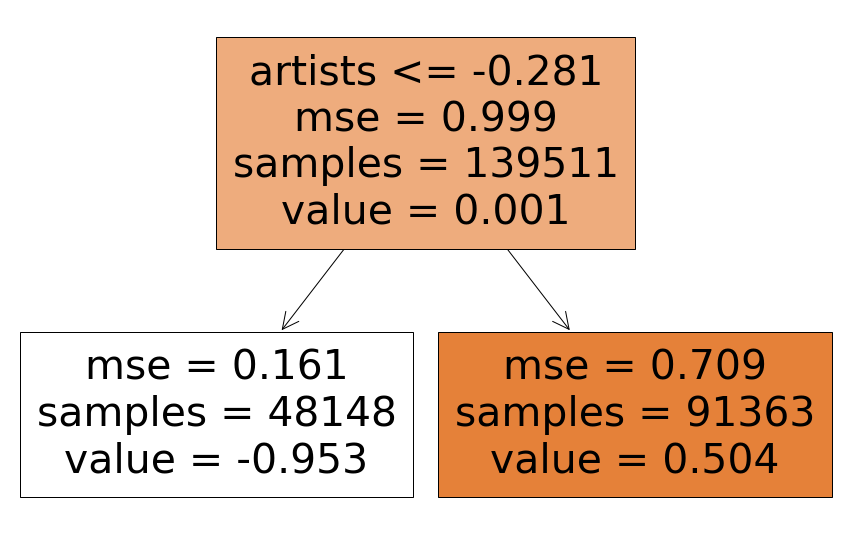

In [ ]:
clfOne = tree.DecisionTreeRegressor(max_depth=1)
clfOne = clfOne.fit(X_train, y_train)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clfOne, 
                   feature_names=X_train.columns,  
                   filled=True)

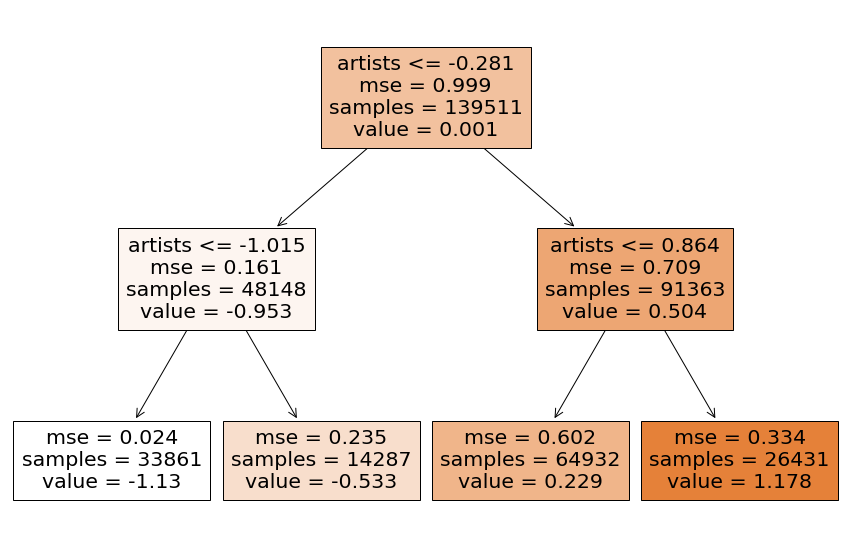

In [ ]:
clfTwo = tree.DecisionTreeRegressor(max_depth=2)
clfTwo = clfTwo.fit(X_train, y_train)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clfTwo, 
                   feature_names=X_train.columns,  
                   filled=True)

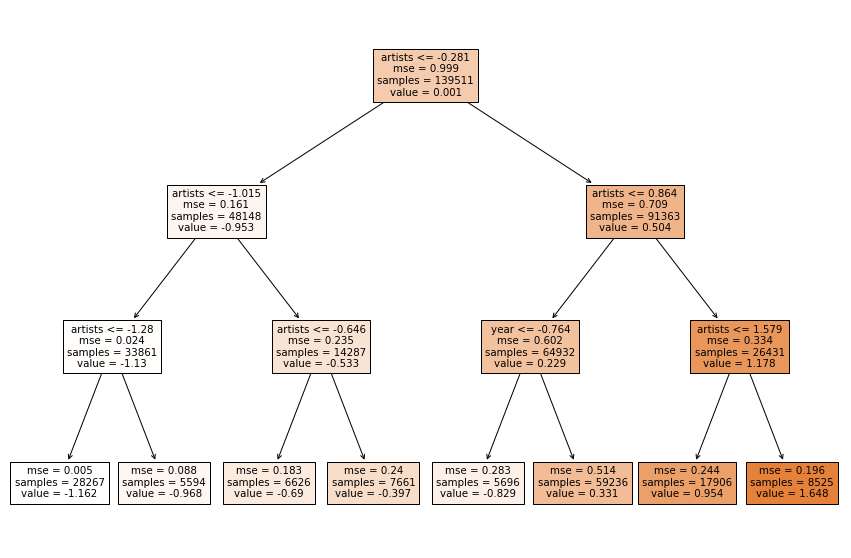

In [ ]:
clfThree = tree.DecisionTreeRegressor(max_depth=3)
clfThree = clfThree.fit(X_train, y_train)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clfThree, 
                   feature_names=X_train.columns,  
                   filled=True)

### **Feature Selection for Decision Tree**
We assume that for depth 10 and others the features will act pretty much same. <br>
We want to find features that has negative impact on our predictions. 

In [ ]:
deleteDec = []
for i in X_train.columns:
  X_train_temp = X_train.drop(columns = [i])
  X_val_temp = X_val.drop(columns = [i])
  
  clf_temp = tree.DecisionTreeRegressor(max_depth=10)
  clf_temp = clf_temp.fit(X_train_temp, y_train)
  clf_pred_temp = clf_temp.predict(X_val_temp)

  mset = mean_squared_error(y_val, clf_pred_temp)
  maet = mean_absolute_error(y_val, clf_pred_temp)
  rmset = np.sqrt(mse)
  if mset < mse:
    deleteDec.append(i)


We have done backwise-stepping and found that duration_ms, key, liveness,  speechiness are increasing our MSE. However, they may be affecting each other's performances.

In [ ]:
deleteDec

['duration_ms', 'key', 'liveness', 'speechiness']

Create data without them.

In [ ]:
X_train_temp = X_train.drop(columns = deleteDec)
X_val_temp = X_val.drop(columns = deleteDec)

When we delete all of them we see that Mean Squared Error is decreased and other measures are improved.

In [ ]:
clf_temp = tree.DecisionTreeRegressor(max_depth=10)
clf_temp = clf_temp.fit(X_train_temp, y_train)
clf_pred_temp = clf_temp.predict(X_val_temp)
mse = mean_squared_error(y_val, clf_pred_temp)
mae = mean_absolute_error(y_val, clf_pred_temp)
rmse = np.sqrt(mse)
print("R2 Score:",r2_score(y_val,clf_pred_temp))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2 Score: 0.7989280596491686
Mean Squared Error: 0.2022032465332692
Mean Absolute Error: 0.27951699685784576
Root Mean Squared Error: 0.4496701530380566


Try forward-stepping, add them 1 by 1 and try to observe if there is improvement.

In [ ]:
newDec = []
for i in deleteDec:
  withoi = deleteDec.copy()
  withoi.remove(i)
  X_train_last = X_train.drop(columns = withoi)
  X_val_last = X_val.drop(columns = withoi)
  
  clf_last = tree.DecisionTreeRegressor(max_depth=10)
  clf_last = clf_temp.fit(X_train_last, y_train)
  clf_pred_last = clf_temp.predict(X_val_last)

  mset = mean_squared_error(y_val, clf_pred_last)
  maet = mean_absolute_error(y_val, clf_pred_last)
  rmset = np.sqrt(mse)
  if mset < mse:
    newDec.append(i)


These variables are added back: 
<li> duration_ms
<li> liveness
<li> speechiness


In [ ]:
newDec

['duration_ms', 'liveness', 'speechiness']

In [ ]:
exc = deleteDec.copy()
for i in exc:
  if i in newDec:
    exc.remove(i)

In [ ]:
X_train_dt_best = X_train.drop(columns = exc)
X_val_dt_best = X_val.drop(columns = exc)
X_test_dt_best = X_test.drop(columns = exc)


So our last version of metrics are improved without key and mode.

In [ ]:
clf_feature = tree.DecisionTreeRegressor(max_depth=10)
clf_feature = clf_temp.fit(X_train_dt_best, y_train)

clf_pred_feature = clf_temp.predict(X_val_dt_best)

mse = mean_squared_error(y_val, clf_pred_feature)
mae = mean_absolute_error(y_val, clf_pred_feature)
rmse = np.sqrt(mse)
print("R2 Score:",r2_score(y_val,clf_pred_feature))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2 Score: 0.7993310850940081
Mean Squared Error: 0.20179795351605434
Mean Absolute Error: 0.27977824049006245
Root Mean Squared Error: 0.44921927108713217


### **Decision Tree Hyper Parameter Tuning**
We already find the ideal features. From now, we want to decide better hyper-parameters:
<li> depth of tree
<li> number of leafs

In [ ]:
pipe_tree = make_pipeline(tree.DecisionTreeRegressor())
# hyper parameter trials
depths = [2,5,10,25]
num_leafs = [1, 5, 10, 20, 50, 100]
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False) # scorer
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10) # decide best

In [ ]:
gs = gs.fit(X = X_train_dt_best, y = y_train) # test with data, cross validation, with eliminating features

We found that our optimal case is max_depth = 25 and min_samples_leaf = 100 in these options. However increasing max_depth may increase the performance of model as well.

In [ ]:
gs.best_params_

{'decisiontreeregressor__max_depth': 25,
 'decisiontreeregressor__min_samples_leaf': 100}

### **Testing the Best of Decision Tree**
Results of R^2 score, Mean Squared Error and Mean Absolute Error is more satisfying than other algorithms.

In [ ]:
clf_best = tree.DecisionTreeRegressor(max_depth=25,min_samples_leaf = 100)
clf_best = TransformedTargetRegressor(regressor=clf_best, transformer=MinMaxScaler())  
clf_best = clf_best.fit(X_train_dt_best,y_train)

In [ ]:
clf_best = gs.predict(X_test_dt_best)

mse = mean_squared_error(y_test, clf_best)
mae = mean_absolute_error(y_test, clf_best)
rmse = np.sqrt(mse)
print("R2 Score:",r2_score(y_test,clf_best))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2 Score: 0.7889653101589855
Mean Squared Error: 0.21088154798725425
Mean Absolute Error: 0.28646163951510717
Root Mean Squared Error: 0.4592184098958297


## **Random Forest**
Random Forest is an algorithm that makes decision with different trees. So after some point of waiting -depending on hyper parameter-, it should give better or equal estimations then decision tree algorithms. However, time is important factor here.

Since random forest is time consuming, we took 5% data to create general idea.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# To make random forest faster split data more
X_train_rf, X_remaining, y_train_rf, y_remaining = train_test_split(X, y, test_size=0.95, random_state=42)
X_train_rf, X_remaining, y_train_rf, y_remaining = train_test_split(X_train_rf, y_train_rf, test_size=0.6, random_state=42)
# 15 Testing 15 Validation
X_test_rf, X_val_rf, y_test_rf, y_val_rf = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
random_forest = RandomForestRegressor()
random_forest.fit(X_train_rf, np.ravel(y_train_rf))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Even data is smaller than others, the R^2 and MSE & AME & RMSE is good.

In [ ]:
random_forest_pred = random_forest.predict(X_val_rf)
mse = mean_squared_error(y_val_rf, random_forest_pred)
mae = mean_absolute_error(y_val_rf, random_forest_pred)
rmse = np.sqrt(mse)
print("R^2:",r2_score(y_val_rf,random_forest_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7617180155102788
Mean Squared Error: 0.23976361252198686
Mean Absolute Error: 0.31147370419483844
Root Mean Squared Error: 0.4896566271602855


### **Feature Selection for Random Forest**
However, we should select features that increases error rate by backwise stepping. If MSE increases, we selected those features.

In [ ]:
deleteRf = list()
for i in X_train_rf.columns:
  X_train_rf_temp = X_train_rf.drop(columns = [i])
  X_val_rf_temp = X_val_rf.drop(columns = [i])
  random_forest_temp = RandomForestRegressor()
  random_forest_temp.fit(X_train_rf_temp, np.ravel(y_train_rf))
  random_forest_pred_temp = random_forest_temp.predict(X_val_rf_temp)
  
  mseRfTemp = mean_squared_error(y_val_rf, random_forest_pred_temp)
  if mseRfTemp > mse:
    deleteRf.append(i)


These ['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year'] increased mse. So we delete them for now.

In [ ]:
deleteRf

['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year']

Creating data without ['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year']

In [ ]:
X_train_rf_temp = X_train_rf.drop(columns = deleteRf)
X_val_rf_temp = X_val_rf.drop(columns = deleteRf)

Estimating success of random forest without ['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year'], which gives very low success rate. So with forward stepping we should add some of them back.

In [ ]:
random_forest_temp = RandomForestRegressor()
random_forest_temp.fit(X_train_rf_temp, np.ravel(y_train_rf))

random_forest_pred = random_forest_temp.predict(X_val_rf_temp)
mse = mean_squared_error(y_val_rf, random_forest_pred)
mae = mean_absolute_error(y_val_rf, random_forest_pred)
rmse = np.sqrt(mse)
print("R^2: ", r2_score(y_val_rf,random_forest_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2:  0.18172106314471947
Mean Squared Error: 0.8233669631853183
Mean Absolute Error: 0.7416520187628659
Root Mean Squared Error: 0.9073957037507497


In [ ]:
newRf = []
for i in deleteRf:
  appRf = deleteRf.copy()
  appRf.remove(i)
  X_train_rf_last = X_train_rf.drop(columns = appRf)
  X_val_rf_last = X_val_rf.drop(columns = appRf)
  random_forest_last= RandomForestRegressor()
  random_forest_last.fit(X_train_rf_last, np.ravel(y_train_rf))
  random_forest_pred_last = random_forest_last.predict(X_val_rf_last)
  mseLast = mean_squared_error(y_val_rf, random_forest_pred_last)
  if mseLast < mse:
    newRf.append(i)

['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year'] will be added back. They may be affecting to each other but we ignore that part. So there is no parameter left to delete.

In [ ]:
newRf

['acousticness',
 'artists',
 'duration_ms',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'year']

In [ ]:
lastDeleteRf = list()
for i in deleteRf:
  if i not in newRf:
    lastDeleteRf.append(i)
lastDeleteRf

[]

In [ ]:
X_train_rf_best = X_train_rf.drop(columns = lastDeleteRf)
X_val_rf_best = X_val_rf.drop(columns = lastDeleteRf)
X_test_rf_best = X_val_rf.drop(columns = lastDeleteRf)

Without delete our success was:

In [ ]:
random_forest_feature = RandomForestRegressor()
random_forest_feature.fit(X_train_rf_best, np.ravel(y_train_rf))

random_forest_pred = random_forest_feature.predict(X_val_rf_best)
mse = mean_squared_error(y_val_rf, random_forest_pred)
mae = mean_absolute_error(y_val_rf, random_forest_pred)
rmse = np.sqrt(mse)
print("R^2:",r2_score(y_val_rf,random_forest_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7638034990938216
Mean Squared Error: 0.2376651614833307
Mean Absolute Error: 0.3111849885211026
Root Mean Squared Error: 0.48750913989722355


### **Random Forest Hyper Parameter Tuning**
We could not find any parameter to delete. We should do some improvements with hyper parameters:
<li> depth
<li> max leaf nodes
<li> min samples leaf

In [ ]:
pipe_tree_forest = make_pipeline(RandomForestRegressor())
depths = [2,5,10]
max_leaf_nodes = [5,10,20]
min_samples_leaf = [1,5,10]
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = [{'randomforestregressor__max_depth':depths,
               "randomforestregressor__max_leaf_nodes":max_leaf_nodes,
               "randomforestregressor__min_samples_leaf":min_samples_leaf
               }]
gsRandom = GridSearchCV(estimator=pipe_tree_forest, param_grid=param_grid, scoring=rmse_scorer, cv=10)

In [ ]:
gsRandomRes = gsRandom.fit(X = X_train_rf, y = np.ravel(y_train_rf))

It shows that our max hyper-parameters give best estimation.


In [ ]:
gsRandomRes.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_leaf_nodes': 20,
 'randomforestregressor__min_samples_leaf': 10}

Our success with {'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_leaf_nodes': 20,
 'randomforestregressor__min_samples_leaf': 10} is again similar.

In [ ]:
rf_pred = random_forest.predict(X_val_rf)
mse = mean_squared_error(y_val_rf, rf_pred)
mae = mean_absolute_error(y_val_rf, rf_pred)
rmse = np.sqrt(mse)
print("R^2:",r2_score(y_val_rf,rf_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7617180155102788
Mean Squared Error: 0.23976361252198686
Mean Absolute Error: 0.31147370419483844
Root Mean Squared Error: 0.4896566271602855


#### **Is more better?**
We did not tried with bigger numbers, so we want to try with bigger hyper parameters. So more is little bit better according to MSE.

In [ ]:
random_forest_better = RandomForestRegressor(max_depth=20, max_leaf_nodes = 100, min_samples_leaf = 10)
random_forest_better.fit(X_train_rf_best, np.ravel(y_train_rf))
pred_rf_val_better = random_forest_better.predict(X_val_rf_best)
mse = mean_squared_error(y_val_rf, pred_rf_val_better)
mae = mean_absolute_error(y_val_rf, pred_rf_val_better)
rmse = np.sqrt(mse)
print("R^2:",r2_score(y_val_rf,pred_rf_val_better))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7621425917852787
Mean Squared Error: 0.23933639624836428
Mean Absolute Error: 0.31080649496886054
Root Mean Squared Error: 0.48922019198757966


### **Best Case Random Forest**
We found optimal hyper-parameters and features. Lets try it on test data.

In [ ]:
rf_best_case = RandomForestRegressor(max_depth = 20, max_leaf_nodes = 100, min_samples_leaf = 10)
X_train_rf_full = X_train.drop(columns = lastDeleteRf)
X_test_rf_full = X_test.drop(columns = lastDeleteRf)
rf_best_case.fit(X_train_rf_full,np.ravel(y_train))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

We found most successful algorithm we tried so far. MSE & MAE & RMSE is acceptable and R2 score is high.

In [ ]:
rf_pred_best = rf_best_case.predict(X_test_rf_full)
mse = mean_squared_error(y_test, rf_pred_best)
mae = mean_absolute_error(y_test, rf_pred_best)
rmse = np.sqrt(mse)
print("R2 Score: ", r2_score(y_test,rf_pred_best))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2 Score:  0.799932322418453
Mean Squared Error: 0.19992249417570296
Mean Absolute Error: 0.2886194480269498
Root Mean Squared Error: 0.4471269329571894


## **K-Nearest Neighbours**
To be sure, we normalized with MinMaxScaler, which we already did. K-nearest neighbour algorithm is not actually very good for this case but we tried it anyways.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
nbrs = KNeighborsRegressor(n_neighbors=10)
wrapped_knn = TransformedTargetRegressor(regressor=nbrs, transformer=MinMaxScaler())  
wrapped_knn.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=KNeighborsRegressor(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=10, p=2,
                                                         weights='uniform'),
                           transformer=MinMaxScaler(copy=True,
                                                    feature_range=(0, 1)))

As it can be seen, since error rate is high, the algorithm is not successful. Lets try to improve it.

In [ ]:
knn_pred = wrapped_knn.regressor_.predict(X_val)
mse = mean_squared_error(y_val, knn_pred)
mae = mean_absolute_error(y_val, knn_pred)
rmse = np.sqrt(mse)
print("R^2: ",r2_score(y_val,knn_pred))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2:  0.22423176862087024
Mean Squared Error: 0.7801329945318938
Mean Absolute Error: 0.7568481416599357
Root Mean Squared Error: 0.8832513767506359


In [ ]:
# 80 Training - 20 Testing + Validation
X_train_knn, X_remaining, y_train_knn, y_remaining = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
# 10 Testing 10 Validation
X_test_knn, X_val_knn, y_test_knn, y_val_knn = train_test_split(X_remaining, y_remaining, test_size=0.05, random_state=42)

### **K-Neighbors Feature Selection**
Again backwise stepping is used first. If MSE is increased, we deleted that feature.

In [ ]:
toDelete = []
for everyCol in X_train.columns:
  X_train_temp = X_train_knn.drop(columns = [everyCol])
  X_val_temp = X_val_knn.drop(columns = [everyCol])
  nbrs_temp = KNeighborsRegressor(n_neighbors=10)
  nbrs_temp.fit(X_train_temp, y_train_knn)

  knn_pred = nbrs_temp.predict(X_val_temp)
  mse_temp = mean_squared_error(y_val_knn, knn_pred)
  mae_temp = mean_absolute_error(y_val_knn, knn_pred)
  if mse_temp > mse and mae_temp > mae:
    toDelete.append(everyCol)

There is no features detected that we should delete.

In [ ]:
toDelete

[]

In [ ]:
X_train_KNN = X_train_knn.drop(columns = toDelete)
X_val_KNN = X_val_knn.drop(columns = toDelete)

We see that R^2 is very high. But one should see that we used small sample.

In [ ]:
nbrs_feature = KNeighborsRegressor(n_neighbors=10)
nbrs_feature.fit(X_train_KNN, y_train_knn)

knn_pred_feature = nbrs_feature.predict(X_val_KNN)
mse = mean_squared_error(y_val_knn, knn_pred_feature)
mae = mean_absolute_error(y_val_knn, knn_pred_feature)
rmse = np.sqrt(mse)
print("R^2:",r2_score(y_val_knn,knn_pred_feature) )
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6922394973357884
Mean Squared Error: 0.30741303470352577
Mean Absolute Error: 0.3933826913371833
Root Mean Squared Error: 0.5544484058084447


### **KNN Hyper-Tuning**
We already decided features to give KNN. We want to find optimal hyper-parameters:
<li> N neighbors range
<li> leaf size

In [ ]:
pipe_knn = KNeighborsRegressor()
n_neighbors_range = [10,20,30]
leaf_size = [10,30,50]

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = [{"n_neighbors":n_neighbors_range,
               "leaf_size":leaf_size
               }]
gsRandom = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=rmse_scorer, cv=10)

In [ ]:
gsRandom.estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
gsRandom.fit(X = X_train_knn, y = y_train_knn)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'leaf_size': [10, 30, 50],
                          'n_neighbors': [10, 20, 30]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

We found that our best hyper parameters are n_neighbors = 10 and leaf_size = 10

In [ ]:
gsRandom.best_params_

{'leaf_size': 10, 'n_neighbors': 10}

### **Best Case of K-Nearest Neigbours and Results**
One can see that MSE & AME & RMSE is very high and R2 is very low. So it is an unsuccessful algorithm as we estimated.

In [ ]:
nbrs_best = KNeighborsRegressor(leaf_size=10,n_neighbors = 10)
wrapped_knn_best = TransformedTargetRegressor(regressor=nbrs_best, transformer=MinMaxScaler())  
wrapped_knn_best.fit(X_train, y_train)
wrapped_knn_best.predict(X_test)
knn_pred_best = wrapped_knn_best.regressor_.predict(X_test)
mse = mean_squared_error(y_test, knn_pred_best)
mae = mean_absolute_error(y_test, knn_pred_best)
rmse = np.sqrt(mse)
print("R2: ", r2_score(y_test,knn_pred_best))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

R2:  0.216318295105822
Mean Squared Error: 0.7831130094387724
Mean Absolute Error: 0.7584112394205248
Root Mean Squared Error: 0.884936726234578


# **Song Recommendation System**

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.neighbors import DistanceMetric
from tqdm import tqdm

## **RecommendSong Class and Its Usage**
RecommendSong class takes data_file in it's parameterized constructor and scales datas (standardizing & normalizing) to use in Nearest-Neighbours algorithms. <br> 
Popularity and year was not used as distance metric since we wanted to recommend "similar songs", not similar metrices. However, we decided to use popularity after deciding distance metric, as a "better song is recommended" idea. <br>

This class has 1 main function -recommendSongs- which calculates distances between input songs and data songs. Distance type may be differ so we did not hardcode the distance types. <br>
Distance-spesific functions are functions for the sake of simplicity, however one can use any distance name which is defined in DistanceMetric. <br>

In [ ]:
class RecommendSong():
  def __init__(self,data):
    self.data = data.copy()
    self.data = self.data.drop(columns = ["id","mode","key","duration_ms","release_date"])
    self.scaleData()
    self.lastSong = None
    self.data.head()
  def scaleData(self): # normalize data
    for everyCol in np.arange(0,len(self.data.columns)):
      if not (everyCol in [1,8]):
        maxCl = self.data.iloc[:,everyCol].max()
        minCl = self.data.iloc[:,everyCol].min()
        self.data.iloc[:,everyCol] = (self.data.iloc[:,everyCol] - minCl)/(maxCl - minCl)
  def head(self):
    return self.data.head()
  def recommendSongs(self, songName, amount,distanceType):
    # create average song
    sd = [0,"",0,0,0,0,0,0.0,"ortalama" ,0,0,0,0,0]
    self.data.loc[len(self.data.index)] = sd
    ourSong = self.data[self.data["name"].str.lower() == "ortalama"]
    ourSong = ourSong.head(1)
    ourSong = ourSong.values[0]
    for everyCol in np.arange(0,len(self.data.columns)):
      if not (everyCol in [1,8,13]):
        ourSong[everyCol] = 0
    # find average songs
    for i in songName:
      for everyCol in np.arange(0,len(self.data.columns)):
        if not (everyCol in [1,8,13]):
          crrSong = self.data[self.data["name"].str.lower() == i.lower()].head(1).values[0]
          ourSong[everyCol] = crrSong[everyCol]+ourSong[everyCol]
    processData = self.data[self.data["name"].str.lower() != "ortalama"].copy()
    for i in songName:
      processData = processData[processData["name"].str.lower() != i.lower()]
    for everyCol in np.arange(0,len(self.data.columns)):
      if not (everyCol in [1,8,13]):
        ourSong[everyCol] = ourSong[everyCol] / len(songName)
    self.lastSong = ourSong
    dist = DistanceMetric.get_metric(distanceType)
    distances = []
    # find similar songs
    for everySong in tqdm(processData.values):
      distance = 0
      for everyCol in np.arange(0,len(processData.columns)):
        if not (everyCol in [1,8,9,13]):
          distPair = dist.pairwise([[ourSong[everyCol]],[everySong[everyCol]]])
          distance += max(distPair[0])
      distances.append(distance)
    processData["distances"] = distances
    processData = processData.sort_values(by = ["distances"])
    processData = processData.head(amount*2)
    processData = processData.sort_values(by = ["popularity"], ascending = False)
    return processData[["artists","name"]][:amount]
  def oneByOne(self,songName,amount,distanceType):
    ourSong = self.data[self.data["name"].str.lower() == songName[0].lower()]
    ourSong = ourSong.head(1)
    ourSong = ourSong.values[0]
    processData = self.data[self.data["name"].str.lower() != songName[0].lower()].copy()
    
    self.lastSong = ourSong
    dist = DistanceMetric.get_metric(distanceType)
    distances = []
    # find similar songs
    for everySong in processData.values:
      distance = 0
      for everyCol in np.arange(0,len(processData.columns)):
        if not (everyCol in [1,8,9,13]):
          distPair = dist.pairwise([[ourSong[everyCol]],[everySong[everyCol]]])
          distance += max(distPair[0])
      distances.append(distance)
    processData["distances"] = distances
    processData = processData.sort_values(by = ["distances"])
    processData = processData.head(amount*2)
    processData = processData.sort_values(by = ["popularity"], ascending = False)
    return processData[["artists","name"]][:amount]
  def euclideanRecommendation(self,songName,amount):
    return self.recommendSongs(songName,amount,"euclidean")
  def manhattanRecommendation(self,songName,amount):
    return self.recommendSongs(songName,amount,"manhattan")
  def minkowskiRecommendation(self,songName,amount):
    return self.recommendSongs(songName,amount,"minkowski")
  def ls(self):
    return self.lastSong

recObject = RecommendSong(data_file)

In [ ]:
def takeInput():
  songs = []
  print("Welcome")
  amount = int(input("Enter amount of songs to recommend:"))
  print("PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)")
  while True:
    inp = input()
    if inp == "":
      break
    if data_file[data_file["name"].str.lower() == inp.lower()].empty:
      print("There is no such song!")
    else:
      songs.append(inp)
  return songs,amount

## **Euclidean Distance Recommendation**
This recommendation system uses Euclidean Distance formula to decide distance between average of input songs and other songs. Then, the used formula is:<br>
dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y)) <br>
We tried euclidean distance with two masterpieces:
Smells Like Teen Spirit and Come as You Are<br>
However, recommendations may anger the rock-lovers.

In [ ]:
songs,amount = takeInput()
recObject.euclideanRecommendation(songs,amount)

Welcome
Enter amount of songs to recommend:3
PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)
90210 (feat. Kacy Hill)
Jumpman



100%|██████████| 174387/174387 [00:30<00:00, 5743.23it/s]


artists                     name
58334              ['Ariana Grande']                    nasty
57704  ['Kendrick Lamar', 'Rihanna']  LOYALTY. FEAT. RIHANNA.
17342             ['T-Pain', 'Akon']   Bartender (feat. Akon)

## **Manhattan Distance Recommendation**
This recommendation system uses Manhattan Distance formula to decide distance between average of input songs and other songs. Then, the used formula is:<br>
dist(x, y) = sumOfAbsoluteDistances(x,y) <br>
The amount of input songs does not matter, if the songs are in the data set. The song's genres are not important to get successfull results.


In [ ]:
songs,amount = takeInput()
recObject.manhattanRecommendation(songs,amount)

Welcome
Enter amount of songs to recommend:9
PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)
Forget Her
Heaven
Please Forgive Me
Hallelujah
Wind of Change



100%|██████████| 174338/174338 [00:29<00:00, 5953.30it/s]


artists                   name
18106      ['Hunter Hayes']                 Wanted
92900   ['Young the Giant']       Mind Over Matter
125735      ['Saint Motel']              For Elise
33879            ['R.E.M.']         Find The River
15396       ['Luis Miguel']  Por Debajo De La Mesa
30926             ['Wings']       Live And Let Die
72393   ['Backstreet Boys']     I Need You Tonight
172117   ['Sara Bareilles']          Breathe Again
30647         ['Bob Dylan']                   Sara

## **Minkowski Distance Recommendation**
This recommendation system uses Minkowski Distance formula to decide distance between average of input songs and other songs. Then, the used formula is:<br>
dist(x, y) = (∑i=1n|Xi−Yi|p)1/p<br>
Here old-school hip-hop given as example, and the results are similar to old school hip-hop.


In [ ]:
songs,amount = takeInput()
recObject.minkowskiRecommendation(songs,amount)

Welcome
Enter amount of songs to recommend:4
PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)
Gangsta's Paradise
Still D.R.E.
California Love - Original Version



100%|██████████| 174383/174383 [00:28<00:00, 6081.33it/s]


artists                                    name
126393  ['Roddy Ricch', 'A Boogie Wit da Hoodie']  Tip Toe (feat. A Boogie Wit da Hoodie)
173059                           ['Jason Derulo']                                Get Ugly
142189               ['ZHU', 'Skrillex', 'THEY.']                          Working For It
35406                               ['Black Rob']                                   Whoa!

## **One-By-One Recommendation**
This recommendation system basis on 1 to X system. Therefore, for every input song, we give X amount of recommendations, independently. It is more reliable than before, but it costs more.

In [ ]:
songs = []
perSong = []
print("Welcome")
print("PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)")
while True:
  inp = input()
  if inp == "":
    break
  if data_file[data_file["name"].str.lower() == inp.lower()].empty:
    print("There is no such song!")
  else:
    songs.append(inp)
    inp2 = int(input("How many recommendations you want for this song? "))
    perSong.append(inp2)
for i in range(len(songs)):
  print("For the song", songs[i],":")
  print(recObject.oneByOne([songs[i]],perSong[i],"euclidean"))

Welcome
PLEASE ENTER SONGS WHICH YOU WANT TO USE IN RECOMMENDATION: (Empty input to quit)
Lonely Day
How many recommendations you want for this song? 2
Jailhouse Rock
How many recommendations you want for this song? 1
Welcome To The Jungle
How many recommendations you want for this song? 1

For the song Lonely Day :
                      artists         name
141493     ['Alabama Shakes']  I Found You
170727  ['Story Of The Year']    Sidewalks
For the song Jailhouse Rock :
                             artists           name
171617  ['Los Dareyes De La Sierra']  Adiós Mi Amor
For the song Welcome To The Jungle :
            artists                name
33636  ['Skid Row']  Slave to the Grind
